#Week 6 - Intro to Machine Learning & Linear Regression

####Author: *Abirami Sivakumar*

Parts of this notebook have been adapted from Prof. Fraida Fund's Intro to ML notes.


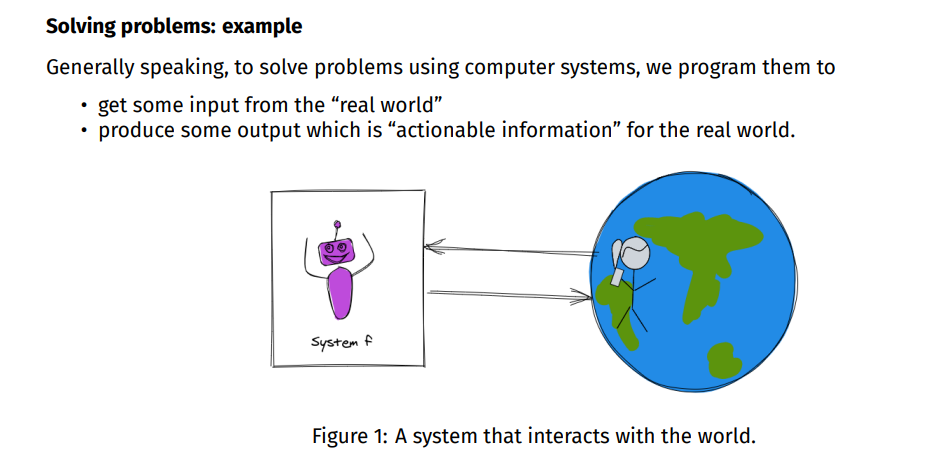

##Solving problems: example (2)

Suppose we want a system to help students decide whether to enroll in this course or not.

• Input: grades on previous coursework

• Actionable info: predicted DS course grade



Let
• 𝑥1= grade on previous probability coursework

• 𝑥2= grade on previous linear algebra coursework

• 𝑥3= grade on previous programming coursework
and

𝑦 is predicted DS course grade.

The “hat” indicates that this is an estimated value.

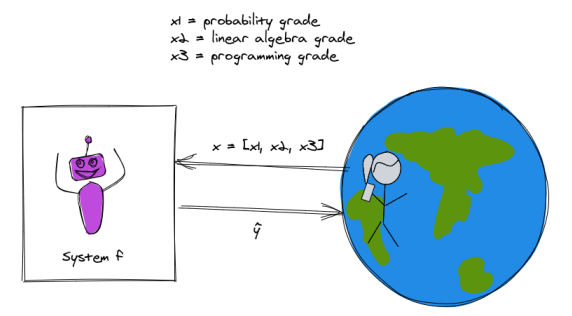

Let us suppose we calculate the grade this way :    
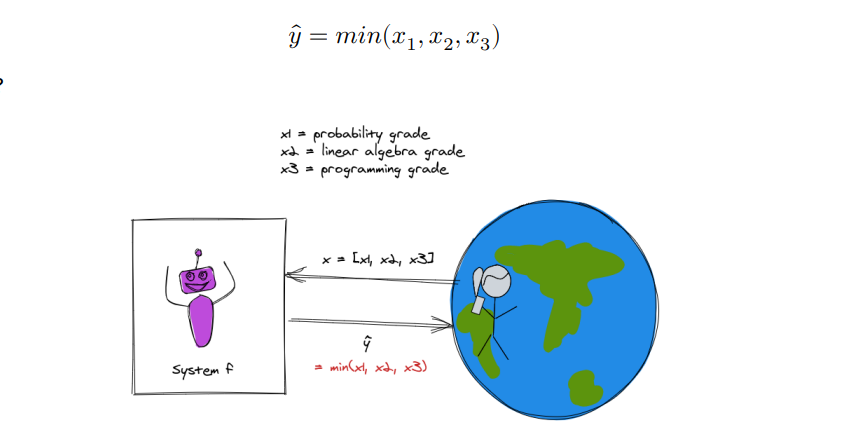

##Suppose we predict your grade as

$$
\hat{y} = w_1x_1 + w_2x_2 + w_3x_3 \quad \text{where} \quad w_1 = \frac{1}{4}, \quad w_2 = \frac{1}{4}, \quad w_3 = \frac{1}{2}.
$$

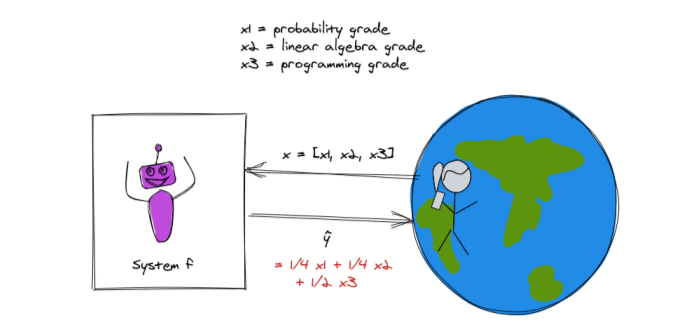

##“Rule-based” problem solving
1. Develop an algorithm that will produce the desired result for a given input.
2. Implement the algorithm.
3. Feed input to the implemented algorithm, which outputs a result.

##Vs


##Problem solving with machine learning
1. Collect and prepare data.
2. Build and train a model using the prepared data.
3. Use the model on new inputs to produce a result as output.
(“Rules” are inferred automatically from data!

##What are some benefits of predicting course grade using the data-driven approach?

• if the “rules” are complicated, may be difficult/error-prone to encode them as a computer program.

• it’s easy to update with more experience or if the “world” changes.

For example:

– if over time the quality of admitted students goes up and I give higher grades, the system that
predicts the mean of last semester’s scores will “track” with that.


– if I didn’t have many students with poor programming background the first semester, but I do
the second semester, I will be able to predict their performance better next time.

##What problems are “good” for ML, overall?

###Problems that may not be well suited to ML


• There is an accurate and simple algorithm that will produce the desired output.

• There is no “good” data available to train the model.

• The model can be “tricked”, with potentially severe consequences.

• Need to audit or explain the output.

• Expects human empathy, expert creativity.

###Problems that are often good candidates for ML
• There is “good” data available to train the model

• The thing we want to predict is measurable and observable

• Human expertise does not exist or is insufficient

• Humans cannot easily explain their expertise

• We will get more data during operation + can improve with experience

##Machine Learning Paradigms:


![Ml types](data:application/octet-stream;base64,iVBORw0KGgoAAAANSUhEUgAAAuUAAAEgCAYAAAAT9w1kAAAAAXNSR0IArs4c6QAAIABJREFUeF7snQVcVWkTxh9BQcFac+3ubrG7Abtz7e7u7kRdu7u7u7ELC7uxC1EJv28Gzt0Lgl7g9pnZH3vl3vPG/M8BnjNn3nmj/Pz58yfEhIAQEAJCQAgIASEgBISAEDAZgSgiyk3GXgYWAkJACAgBISAEhIAQEAJMQES5XAhCQAgIASEgBISAEBACQsDEBESUm/gEyPBCQAgIASEgBISAEBACQkBEuVwDQkAICAEhIASEgBAQAkLAxARElJv4BMjwQkAICAEhIASEgBAQAkJARLlcA0JACAgBISAEhIAQEAJCwMQERJSb+ATI8EJACAgBISAEhIAQEAJCQES5XANCQAgYnIC3tzfev3+Pd+/ewd/fHwkTJkTy5MkNPq4MIATCQ+DJkyd49eoVHBwckChRIsSPHz88zeVYISAEhECkCIgojxQ+aSwEhEBoBG7duoV169bBw+MaPDxu4PPnL6GCypkzBxxixACg7GFGr0Ffmn3NtN5TjuPP9L3vWZTAOfJL0L//eyNo/n96P4pW0z8dG8Y4v4wv15ihCdAeeu7u7r8MEy9ePNSpUwcNGjRAmjRpDD0N6V8ICAGVExBRrvILQNwXAvok8PTpU4wfPx7btm3TZ7fSlxAwOQEXFxf06dMHKVKkMPlcZAJCQAhYJwER5dZ5XsUrIWB0Anv37kWPHj3w5UvoUXGaUME8KZA/dwrkzZkMsRztIz1HP/8A0Jc/vfoFvfr/DPF94Pu+fv7w9/upOd4/ILDNf+3+64f71fQXyjH+AfgZQOP8RMDPnwgI+AmKttIrf/38yZ8rn4X2eeB70LnN9x9+OvGyt4uKKFEAG5soiBIl8Cvw34BN0PdRQnyvfK45Flrt6dig7/k4+u9P7YPGouNtbGwQLaoNbKPSqy1sbYO+t7VB1Kg2iMqvtoH/Dvrezs6W58rv0+fRlOO0jlfaU9/afdna6MQptIP8A37i1t1XuHPvNa54eOHmnRe/HDZ8+HA0b948wmNIQyEgBIRAWARElMu1IQSEQKQJLFmyBEOHDuV+4sV1wLsPXzV9Zs2UGLWq5YBLxWxIlCBmpMeSDoSAsQg8f/kJ+47cxoFjnjh+5oFm2Lp162LYsGFwdHQ01lRkHCEgBFRAQES5Ck6yuCgEDEng3LlzqF27Ng9RwiktLlx9Cm/vH4gTOzoGdiuLetVzG3J46VsIGIWA1+vPWLXpEqbNPc7j0ULlOXPmIEeOHEYZXwYRAkLA+gmIKLf+cyweCgGDEXjz5g0qV67MFSsypU+E23dfacT59NGuHDUXEwLWRGDhqrMYMWk/uxQnThzs3r0byZIlsyYXxRchIARMREBEuYnAy7BCwBoIDBkyBEuXLkWSv+Ph82dvfPH+jk4ti6J3x1LW4J74IARCJdB/1C6OmpNlyZIFW7ZsQfTo0YWWEBACQiBSBESURwqfNBYC6iaQPXt2fP78WQOhctnMmDOxlrqhiPdWT4AW3VZtuBCe99+wrwMGDEDbtm2t3m9xUAgIAcMSEFFuWL7SuxCwWgJU9rBz584a//5OFAsHN7ZFTD1UVbFaaOKY1RC4fP05XJsuZn/+/jsR3N3PWY1v4ogQEAKmISCi3DTcZVQhYPEEunXrhs2bN2v8mDG6OlwrZ7N4v8QBIaArgZbd1nFlFjJa9EnrK8SEgBAQAhElIKI8ouSknRBQOYHy5cvjzp07TCFT+oTYt66NyomI+2ojcO/hW5SpOYfddnV1xYwZM9SGQPwVAkJAjwRElOsRpnQlBNRCwM/PDxkyZEBAQAC7LFFytZx58TMkgbqtlsP94mOkTJEMx0+cEkBCQAgIgQgTEFEeYXTSUAiol8ClS5dQvXp1BuAQIxouH+4B2klSTAiojYB2icSLFy8ifvz4akMg/goBIaAnAiLK9QRSuhECaiJAtZnbtWvHLtPmQBOGVFWT++KrENAQePXmCwpUmM7fb9iwAQUKFBA6QkAICIEIERBRHiFs0kgIqJuAduWVRdPromzxDOoGIt6rmkCRqjPx7MVHzJ49G1Wryg2qqi8GcV4IRIKAiPJIwJOmQkCtBDZu3IgePXrAxiYKrh/rBUcHO7WiEL+FAFp0XYtDx+9i+PDhaN68uRARAkJACESIgIjyCGGTRkJA3QTWrVuH3r17I3vmv7FzVUt1wxDvVU9gvNthzF58Cp06deKfCzEhIASEQEQIiCiPCDVpIwRUTmDVqlXo378/GtbMg7GDqqichrivdgKrNl1C/1G7UK9ePUyYMEHtOMR/ISAEIkhARHkEwUkzIaBmAgsXLsSIESPQrF5+jOhbUc0oxHchgHXbrqD3sB2oUKEC5s+fL0SEgBAQAhEiIKI8QtikkRBQN4GZM2di4sSJaNmwIIb0Kq9uGOK96gls2H4VPYdu58orVIFFTAgIASEQEQIiyiNCTdoIAZUTmDRpEtzc3NCmaWEM7FZW5TTEfbUT2Lb3Bjr334wMGdLhwIFDasch/gsBIRBBAiLKIwhOmgkBNRMYNWoUP6bv+E8R9OlUWs0oxHchgP1H76BV9/VImDAezp+/JESEgBAQAhEiIKI8QtikkRBQN4HBgwdj2bJl6NK6GHq2L6luGOK96gmcOvcQDdquhKNjDNy4cUv1PASAEBACESMgojxi3KSVEFA1ASr7RmURe7Qrga5tiquahTgvBC5ffw7XpothZxcVnp73BIgQEAJCIEIERJRHCJs0EgLqJtC5c2fQrp6UukIpLGLmR+Dbdz+cOvsQCRM4IkeWJOY3QSuakef9NyhXey579OjRIyvyTFwRAkLAmARElBuTtowlBKyEQOvWrbFv3z4M6FoWbZsV1ptX/gE/sWL9BXz89A2tGheCQ4xo3LeffwBu3vFCwvgx8XeiWHobz5o7UvKcB/Uoh1aNCiFKFGv21rS+Pff6BKfKbjyJ+/fvw9bW1rQTktGFgBCwSAIiyi3ytMmkhYBpCTRp0gTHjh3D4J6Bgk9fRmK82+CtvGV5rw4l0allMRaTl649Q6MOqxA3dgwsmFIHWTMl1teQv+1nxvwTiBM7OtdjD8uevfjIG8fEjGmPsQOr8PHmYHsO3cLgcXsxabgzSjqlNYcpRXgO5spYcejT52/IUXIyf3v79m1Ej24e10CEgUtDISAETEJARLlJsMugQsCyCdSpUwdnz57F8D4V0Lx+Ab05c//RW3Tou5mj4vlyJYfbmOpIliQOjp95gMYdVvE4E4ZURb3qufU25u86IlF+/dZLTBpWDbFjhS60KHWh84AtPOfWTQqhT8fSsLMzbaSUnjhMnn0Ep84+wtRRLkiTMp5ReBlqEHNkrO1rQMBPpMk/ht/y8PBAzJgxDYVC+hUCQsCKCYgot+KTK64JAUMRcHZ2xtWrV/Uuys9ffopa/yzVTHvZrAYc5V2w0h0jJx/g9/Udnf+TKKeovdvY6kiRLG6Yh77/6INtezxw5sJj9GxfAunTJDAUep36ffLsAzr338JPFGhzp+j2UXVqZ84HmRvjkKyyFp8Ib+8fuHTpEuLFs+ybIHO+DmRuQsCaCYgot+azK74JAQMRoO3E6TG9vgXyll3X0XXQVs2sO7Qogub182PgmD1cC9oQovyL93fc8nzNfWfOkBAxHe0146/ceBHT5h7Houl1LWqxpJJPPn2UK6pXyW6gq0D3bl+//QJ66nDw+F14f/2BXFmToFqFrKheObvJnyro7sXvj8xVego+fPTB6dOnkTRpUn11K/0IASGgIgIiylV0ssVVIaAvAsWLF8fjx4/Rv2sZtGvmpJdulZSLWYtOoXD+VLh28wVyZP4bxQqnxaRZRzRjhHUj8Pb9V+zYdwMnzz5E4oQxkS51fDhXzIb4fzmEOj9aPEo3AVPmHAPlLJNRqsyYgZVRqkg6/p4+Hz3tYLhFOVU+ueX5CqlS/IW/4sQApeX0Hr4D7z74YMZo118E/s+fgXnz9ETgyKl7SJwwFhpUz43GdfJpFrvqCtnX1x/jZhzGhStPw5W6Ep45hIc1HUs593sP3/7FhYqlM6Fv59L4/OW7zqyUTqjN3QdvkCl9ImbkfvEx+o3ahUQJYmLKcGc+l9pG59vz3mt4f/X95eZLV7a/Oy57iUnsx/79+5ExY0Z9dCl9CAEhoDICIspVdsLFXSGgDwL58+fH69ev0atjKXRuWVQfXcLr9Wd0GbgVlHoxrHcFbNh+NZiQoxxzEppU7YXytqNGtdGMe/HqMwwYs5vzutOmjo/kSeLgq88PJE0cG1R9hERuSIG2csNFjJ95GNGi2qJquSygiPmB457IkiER3MbW4LZK5H7jombInzs5R3nnL3fHgWOeqF8jNxrVyssLUUmMHT9zHyWc0nKk/cZtL7TqsR7VKmRBi/oFMGT8Xuw7Ehjpr1ElO0YPqAxHBzv+nsTiwhVnMX3Bcf4+Y9qEePD4HUdd6YaHFrxGi6Z7jrqSupIzWxIM6FZWp9SV8MwhvKwVhsSGzivdLNFNy95DtzF78Sm+gfJ88AbOFbP+llVIxpRW1KLrWozoWxFFC6ZGr6E7cOn6M2ZIT1jo2rS1iQK62bh8/RmmzjmGo6fv8+dx48TAvMm1UShvSr1cu9RJ1mIT+frYunUrcuc2zpoHvU1eOhICQsAsCIgoN4vTIJMQApZFIHv27Pj8+TO6ty2Bbm31s3kQVQtp22sjKHo6dmBlbNp1HaOmBOaR58meDO1bOGHq3OPIlikxCzFF1GpHSPt0LIU8OZIhSpQomDbvGKeeNK2bj4W5vd1/edXUplO/zYgfzxGDe5RDkQKp8f2HH0ZM2s+RaqXCiyIoF0ytw3MYMmEvdu6/yXNydLTDvEm1UaxQGii58HMn1UKlMpk5Mk4LVtOmige7aLbYd/QOypfMiNt3X+PtO29N5J0E47J15/nmoHDeVOjRvgSyZfobz19+RLdBW0FPD5TFrrpeIWu3XMbwyfsxbaQrKpT6c8Q2PHMIL2slar9trwdG9qvIbLSNFkjeuOOFXsN2/JFVSMbK93Rz9OrNF9DNQoWSGXHy3EMum0nckv4dB9v33cDgcXvg6+ePGpWzo1C+VLj38A2fc7pObtx++dsnKrpyz1xkAny++WLNmjVwctLP0yNdx5bjhIAQsA4CIsqt4zyKF0LAqATSp08PX19fjpJTRDKy9tXHF0PG78H6bVe59nmrJoXw7r03+ozYyeURO7cqhnquudBr+A7YR7PF9DHVOS2ESihSWsjjZx8wZkBl5M2ZjKeivE8pEySeV85uyGKdTEmTWbL2PMYOqAKXStk0NbzfvPXGi1efkCVjYkS1tdFEykf2q4QzFx6xYG/ZsCAL+LlLz2gEP0XGqWQj7XBKJSKVEo608I+sU8ui6PhPUWzedQ0DRu+GIt5ver7imwNKw/inYUHUdc2FGNGjgXLZ6YvSaMJTZlHx++17b0wfVR3JkwZP4QjtPOk6B2obXtYUEacbHcpxDysvX1dWynEKYxLbxE65QerbqTQa1MjDN2NrtlzB4ul1ESumPd8cUclC+rxqhSx8XsmUJzOUJjVzTA2UKZ4+UpdxhsLj8OOHPxYuXIhy5cpFqi9pLASEgDoJiChX53kXr4VApAhkyJABP3784PQKyiuPrJ069xBdB27lsoMzx1ZnUUx26+4rnDn/CBVKZ0K8uA4s8ChaO3t8TWRKnxAkKNv33og6LrnQrrmTJl1hy+7rHGlWjNJMlCokughFpZ32wlMS9yTsGtXOixcvP3F1E9uoUTjV5ds3XxZ/eXMk43Gu33ypqSJTs2oOjtRTbrsS3aW8+BYNCmLa3GNYuOosi2/KhaeUFcVyZUvK1W2UmwldGJPA/KfrOuTPnYJLR5Io/Z3RDYquc4gIa6qY0pXKRXq+ClOUa1fcCYsV3egoTx8UxnsO3tIsClZueii3XPvpxl9xHPg8ZE6fCLMn1OTUGTJK11m/9QrnoFNazfjBVZH079i6IA7zmHQFxnK/bm5ucHFxiVRf0lgICAF1EhBRrs7zLl4LgUgRyJEjBz59+oTWjQux4IyMUZRYyQemiHiXVsXCrMihlEZUqoooQjFjuoSYOLQabG2jYM2Wy3BbcBKZMyRC2yaFsXrzJc7n7telDNcRt7WxwcyFJzBp9lG4VsrGqTCUYxyaaYtybeGnRPYPnbjHEdkE8Ry5Vjnll5NIp9x3iuLSzcX4wVVAApvs4ZP3/H6RgqnQqmEhdB+yjSPjdAzZyXOP8NLrE8+dov7alWB0YawIXFrkSDdLJPapD8qv/+HrD0oXefr8A6dtkFD97P0dXQZs0WkOEWFNeeAkyq/f9mJOCgdtX5SI9+9Y0RoCimxrM9688zomzDzMoppy9FMGlaxUIup0A0UVXpRFpjR2uRIZeGjK/z976Qn/m84/Lail/PPIGNUpJ77jx49H/fr1I9OVtBUCQkClBESUq/TEi9tCIDIEChQogFevXvHGQRTNjYwpwpdqe08aXo1zt8MyEp1NO69GraDoM+VDU/ScUj20jYRa/y5luE63tuin+fbpVApUEWTgmN04dvo+V+mgfO+yxdMja8bEiBs3hibFgSrBkPBzKpAKYwZU4bxnxSh3m9JrKCJNkXwSnyR2xw2ugvNBoly5EVBSJkikUhtv7++c9kOpLI4O0TBjTPVfFqNGhOnT5x/RddAWjsj/yUik9uxQAhNnHtVpDsoThvCwbtOkEItiWmA5aZgz6rjk/GVaiij/HStKVyLTZrxp53XMWnzylxQkqqRD4p1uOuipxQuvT1zj/uBxz1/GphuB2eNrIG2qwAh6ZCxV3tHcfNSoUaAdb8WEgBAQAuElIKI8vMTkeCEgBFCiRAk8evQITerkw6j+lSJFhEQUCdXihdOwyP/dRjfvPnxF90Hb4PXmi0ZMPff6xDWwdx+8hXh/OaCOc07e8VO7FCJFT4dO2IdHT9/zws7azjlZmC9adRYrNlwMljZCaSq5syVF++ZFQOkXwybuQ99OpVDXNbcm95wcpsWF3QdvQ7bMidGzfSksWX0O9x+/xZCe5bmiy4FjdzgyHLI0H90IrNx4Cf26lsb8Ze58Q0FR7TZNCsMmktFamhcJc3pacMXjeZjnhW4OPn7+htH9KmPH/hs6zyG8rAd2K4v3H3ywbtuVYGlJ2hOjPOw/sRrauzzftCxY7q5hTH0cOOqJEkXS8voCxehGbc3mS7h28yUGdCvDTwoogk0+B9CHzOgDeg/f+cui4YheyJQGlDZoR8/Ro0ejcePGEe1K2gkBIaBiAiLKVXzyxXUhEFECyuZBVPmC8nGNZaSpFq8+i+GT9nPVly6ti+ucdkD5viQAKe9Y2ygC7Hn/NS5de85C9vT5R7C3j4p+nUujXImMnPpBlV5CE8y0wNTHxxeUPkOpK+E17UWWbZoW5nQgqrNNIpJyqOlGY/eh20ibMh5H4MObzqLLfAwxB23WdM6+ffdFdPtoEWKkiw/hPUZJcaHqQZSvHpFzpz0mLfzNWHg8vyWiPLxnQ44XAkJAISCiXK4FISAEwk2gevXqvJ14rWo5MGWEcRe1kWC9fe81bKJEibAYDrfDBmygRPHDimxTvnv75k5/fIoQmSmawxwiM//wtqVqMLRzrD6qrtDYVN0lR8nJPI1x48ahQYMGwaZUo0YNrlZE+ebZsmUL73TleCEgBFRCQES5Sk60uCkE9EmgXr16OHPmDKqVz4JZ42vqs2tV9kULR6nKzOGTd3kxaNzY0ZEza1IUyJOCF33+LqVHX8DMYQ768uVP/VDK0KJV5zRVfP50/J8+p1SmAhWm82Fjx45Fw4YNgzXp0KEDdu7ciRQpUmDatGmgzbfEhIAQEAIhCYgol2tCCAiBcBNo1qwZjhw5whv90M6IYkLAXAkoT1Yo75w2FVLq1Hvc8uKUoCSJI1cKkfymNKbizrMYweTJk1G79q8/E9WqVcO1a9eQIEECTJ8+HcWKFTNXZDIvISAETERARLmJwMuwQsCSCbRt2xZ79uzhDVcWT69nya7I3K2cAKWqtOq+nhfczplYi2uVDxq7B7SWQJda7rrg8bz/BuVqz+VD582bh4oVK/7S7OHDh+jcuTOuXr2KmDFjcsS8fPnyunQvxwgBIaASAiLKVXKixU0hoE8CXbt2xZYtW7gO9tKZUpNZn2ylL/0SuHrjBdr13giq8kPCvFDelNh75Daa1M6HXh1KIlo020gPeP3WS1RtuJD7WblyZZhRcC8vLxbm7u7usLW1ZWEuGw1FGr90IASshoCIcqs5leKIEIg8AcoTz5UrF2LECH0zHWWEvn37Ys2aNbxxy/JZwRe1RX4W0oMQ0C8BKhM5Zc5RbNxxjTsmcT5mYGW+qdSHae9KunXrVuTOnTvMbmnTrU6dOuHo0aN8zIQJE0BrNMSEgBAQAiLK5RoQAkIA7969Q58+fbB//34MGjQIrVu3/i2VYcOGYfHixVxbfMXs4IvaBKcQMEcCVA6TSkzOX+GOBjVzcy17ZVOnyM735NmHaNhuJXdz8OBBpE+f/rdd/vjxgyPmlAJGNnz4cDRv3jyy05D2QkAIWDgBEeUWfgJl+kIgsgTu3r3LgvzChQvImDEji+3kyZP/tlsq+/bvv/+ipFNaLJNIeWRPgbS3cAKHjt9Fi65r2YsbN27A0dFRJ4+6deuGzZs387H9+vVD+/btdWonBwkBIWCdBESUW+d5Fa+EgE4Ezp49y4L8wYMHSJcuHebMmcPC/E9G1SOmTJmCciUyYOG0un86XD4XAlZNYNeBm2jfZxNXVqGb2/BY//79sWrVKm5CazV69OgRnuZyrBAQAlZEQES5FZ1McUUIhIcAPTonQf7x40du5uzsjJkzZ+rUBVWYoJ0LXSpmhdvYGjq1kYOEgLUS2LzrOroN2oqCBQti/fr14XZzxIgRWLgwcKFomzZtMHDgwHD3IQ2EgBCwfAIiyi3/HIoHQiDcBCgyRxE6xSiflfJadbVly5Zh8ODBqF8jN8YPrqprMzlOCFglAdqMaMDo3byTJ6V2RcQmTpyouSlu2rQpRo4cGZFupI0QEAIWTEBEuQWfPJm6EIgIAYqGkwBQrFevXrzoLDy2YMECFg11XXJh4rBq4WkqxwoBqyPgtuAEJs0+Gun0E+2fzTp16mDSpElWx0ocEgJCIGwCIsrl6hACKiKg/Zic3A5tS3BdcFB95alTp0r6ii6w5BirJzBk/F4sXXueb1Qpyh0ZozQW+jklo11AZ80K3ClUTAgIAesnIKLc+s+xeCgEmIB2pQd7e3t+VF6hQoUI0Rk1ahTmz5+PiqUzYd7kX7cUj1Cn0kgIWCiBjv12YMe+K1yRqEqVKpH2Qju9rGzZsli0aFGk+5QOhIAQMH8CIsrN/xzJDIVApAiE3KwkVapUHOXOly9fhPudMWMGJk+ejCwZE2PPmlYR7kcaCgFrIFDUeS6ePnuDI0eOIE2aNHpxiUol0o00WZEiRbBixQreBVRMCAgB6yUgotx6z614JgRw+/Zt9OzZE9euBe5kmDdvXt7am4R5ZIw2GWrVqhVsbKLg5sk+iG4fNTLdSVshYLEE7j54g7K15iJJkiSgHXH1aVQhidZ70GZDefLkAS2wjh07tj6HkL6EgBAwIwIiys3oZMhUhIA+CZw4cYJLHj579oy7pVQVipDHjBkz0sM8ffoURYsW5X7WzG0MpwKRE/mRnpB0IARMRGDOsnMYO20f6tatG2wBtb6mc/ToUXTq1An0xCtz5sxYsmQJ3wCICQEhYH0ERJRb3zkVj4QAtm3bxoLcx8eHaUSmVFtYOLNkyYKvX7+iYc08GDso8nm0ctqEgKUR+PHDHyWrz8fzl2/h5uYGFxcXg7jg7u7OEXMvLy9+ykWLQTNkyGCQsaRTISAETEdARLnp2MvIQsAgBCiSNnToUE3f9Mecyh7q24YNG4bFixcjWjRbuO/ujPjxdNtaXN/zkP6EgKkITJt7HFPnHkOiRIlw8uRJ2NnZGWwqV69eZWH+8OFDJE6cGLSBV+7cuQ02nnQsBISA8QmIKDc+cxlRCBiMwJQpUzB9+nRN/yScW7RoYZDxaCfQ4sWL846g7Zo5oX/XMgYZRzoVAuZI4IrHc9RssQx+fv6cFlazZk2DT9PT05OF+c2bNzm3fM6cOZo0MoMPLgMIASFgcAIiyg2OWAYQAsYhMGjQICxfvlwzGJU8dHZ2Nujgys6eNAilsFAqi5gQsHYCr958QaV6C/D2vTeyZs2K3bt3G81lWs9BwvzixYuIFi0a1zGvWLGi0caXgYSAEDAcARHlhmMrPQsBoxHo0KEDdu7cyeNFjx6dF4M5OTkZZfzBg/pj2fJVPNaEIVVRr7o8UjcKeBnEJAQePX2Plt3WwfP+Gzg6OmLHjh1ImzatUefy5s0bdOnShVNmyIwVqTeqkzKYEFAhARHlKjzp4rL1EPD390fjxo1x6tQpdipdunT8SDtjxoxGdXJw/45YtmoHj0kbCo0bXAXx4joYdQ4ymBAwNIHNu65jwOhd+Orjy0OtXLkSxYoVM/Swofbv7e3NwvzAgQP8OW3o1aRJE5PMRQYVAkJAPwRElOuHo/QiBIxOgB5jt2zZErdu3eKxS5Qowfnk8eLFM/pcaMB+PRti9YbAyF1MR3s0qZMXrRoVQoL4sgDUJCdEBtUbgV0HbmLKnGMcHVeMNtBydXXV2xgR6SggIICF+fbt27n5gAED0LZt24h0JW2EgBAwAwIiys3gJMgUhEB4CZw9exYdO3bEq1evuGmtWrVAizxNav6fsHzRSAwatS7YNChy7pQ/FQrkSYHsmf826RRlcCGgK4EzFx5j3+Hb2HngJl6++qxpRgssadv7AgUK6NqVwY/r3bs31q0L/Lnr3r27ZidQgw8sAwgBIaBXAiLK9YpTOhMChiewdetW9OjRA35+fjxYmzZtMHDgQMMPrMsIP7/jqvtSzJi9HvuP3vmlBe38mStbUuTMmgR5ciRDsUJpECd2dF16lmOEgEFx+seVAAAgAElEQVQJHDjmifOXn+DqjRe4fP05vL/++GU8SlUZP348kidPbtC5RKTzIUOGYOnSpdy0Xbt26N+/f0S6kTZCQAiYkICIchPCl6GFQHgJzJ8/n3NHFTPbx9U/7uPp/bNYsXoLdh24BVocZylmb2+HKFGAKFGigP+jb8joe+V9/rfyedCxgR9qjufP+Zj/Pue+lPdDHhs0ltIu5HHKPP7r99e+NJ8FzVnTV4g5aB9H/6Y0iJ8/f2pe6d9kId9Tvlc+o+8j3i4AAQHUPnBsKH0FvWr3rXxGs6L3v337btTLiSqsdOvWzeyrnIwdO5bXlJA1b94cw4cPNyonGUwICIHIERBRHjl+0loIGI0ARehmz56tGW/y5MmoXbu20caP8ED+H3DrxiUcPnwYXq8/4cOnH/jw8SvvNkrRfvry9fXV/Dvk9/QZLWil3UPFhIChCcSKFYvLHNKOmXnz5kWpUqUQP358Qw+rt/6nTZvG1VjI6tWrhwkTJuitb+lICAgBwxIQUW5YvtK7ENALgb59+2LNmjWavugxNYkFtdr37981Yp4EuyLqQ4p7ReBTJJj+Ta/0RW2Ufyvf03sUhdX+LLTjftdHyL6pfWj9hXzvd8fQZ5ZgFHG3tbVF1KhRYWNjw6/0vfbXnz5TPlf6Cfmq9BnWK+2oSW2oLGjILxLbajGKllPUnMzFxQVubm5qcV38FAIWTUBEuUWfPpm8Ggi0bt0a+/btY1djxIiB9evXI0eOHGpwXXwUAkIgggToxp3yzMnKly+PBQsWRLAnaSYEhICxCIgoNxZpGUcIRIAAVVU5f/48t0yfPj1WrFiBJEmSRKAnaSIEhIDaCFBFFqrMQkaLVKmuupgQEALmS0BEufmeG5mZigm8e/eOyxzev3+fKZQsWZIjXfR4XkwICAEhoCsBqmHeuXNnTs3Kly8fNm3apGtTOU4ICAEjExBRbmTgMpwQ+BMBDw8PNGzYEB8+fOBDGzRogHHjxv2pmXwuBISAEAiVwP79+3mTIVosTYtYd+/eLaSEgBAwQwIiys3wpMiU1EuAtsymXToV69mzJ/8xFRMCvyNAW65fu3aN1xo4OsoOqnK1/ErgxIkT/Lvk7du3SJMmDY4cOSKYhIAQMDMCIsrN7ITIdNRLYPny5Rg0aJAGwJgxY9CoUSP1AhHPdSJAYvzevXvo2rUrLKZMpk6eyUH6JnDhwgUW5k+fPuW1KYcOHYKDg4O+h5H+hIAQiCABEeURBCfNhIA+CVAt4VmzZmm6nDdvntlvVKJP/6WviBG4c+cOV9ZQrEWLFhg2bFjEOpNWqiBw48YNFuaenp6IGzcu6OlcwoQJVeG7OCkEzJ2AiHJzP0MyP6sn0L1792CLr2ghFi3IEhMCfyJw5swZ3iBGMWdnZ8ycOfNPzeRzlRN48OABC/OrV6/C3t6eS66mTp1a5VTEfSFgegIiyk1/DmQGKibQrFkzTW4n5QLv2rVL/jiq+HoIr+shRXnhwoWxdu3a8HYjx6uQwIsXLzjlyd3dnb3fuXMnsmfPrkIS4rIQMB8CIsrN51zITFRGgKKaFKkioy29t2zZgpgxY6qMgrgbGQIiyiNDT9pShSeKmB89epRhUF3zQoUKCRghIARMREBEuYnAy7DqJUBbxJcpU4YXW5GVKlUKtPuemBAILwER5eElJseHJEC/j0iY79mzhz9avHgx/34SEwJCwPgERJQbn7mMqGICDx8+ROXKlbleMBnVIx87dqyKiYjrkSEgojwy9KStNoFu3bph8+bN/JabmxtcXFwEkBAQAkYmIKLcyMBlOPUSOH36NOrXr68BQNtfd+rUSb1AxPNIExBRHmmE0oEWgf79+2PVqlX8Dm1YRhuXiQkBIWA8AiLKjcdaRlIxAaqoQlVWFJs2bRpq1KihYiLiuj4IhBTlefLk4bUJYkIgogRGjBiBhQsXcvPBgwejVatWEe1K2gkBIRBOAiLKwwlMDhcC4SVA9cepDrliq1evRpEiRcLbjRwvBH4hEFKUZ86cGXv37hVSQiBSBLT3TaBgAqW2iAkBIWB4AiLKDc9YRlAxAdqhk3bqVIzqAWfKlEnFRMR1fRIIKcpTpkyJ48eP63MI6UulBCivfNKkSex9mzZtMHDgQJWSELeFgPEIiCg3HmsZSWUE/vnnHxw8eJC9plKHx44dQ/z48VVGQdw1JIGQopx2Zjx//rwhh5S+VURgwYIFGDlyJHvcqFEjjBkzRkXei6tCwPgERJQbn7mMqAICVGGFtrMmy5gxI/bv368Cr8VFYxMIKcrp5s/Dw8PY05DxrJjAypUrMWDAAPbQ1dUVM2bMsGJvxTUhYFoCIspNy19Gt0ICBQoUwKtXr9iz0qVLY8mSJVbopbhkDgRCinIbGxvQFupiQkCfBDZu3IgePXpwl+XKldMsBNXnGNKXEBACgIhyuQqEgJ4IvH79GrTNuZ+fH/coj3v1BFa6CZNASFFOBz569EiICQG9E9i1axe6du2KHz9+wMnJCWvWrNH7GNKhEFA7ARHlar8CxH+9ELh69SqcnZ01ffXp0wcdO3bUS9/SiRAIi4CIcrk2jEng8OHDvPvnp0+fkCNHDuzYscOYw8tYQsDqCYgot/pTLA4amgCVoKPqBIpNnz4d1atXN/Sw0r8QgIhyuQiMTYCuORLmXl5eSJs2LUioiwkBIaAfAiLK9cNRelEpAcoXHzp0qMb79evXo2DBgiqlIW4bm4CIcmMTl/GIwJUrV1iYP3z4EIkTJ8bZs2cFjBAQAnogIKJcDxClC3USoPJgc+fO1Th/6tQpJEuWTJ0wxGuTEDh37hxq164dbGzJKTfJqVDdoLdv3+YnhCTMHR0dNdWmVAdCHBYCeiQgolyPMKUr9RDo3Lkztm3bxg7HihULFy9ehJ2dnXoAiKdmQYAili4uLiLKzeJsqG8Sd+/eRa1atfDhwwd23tPTU34Pqu8yEI/1SEBEuR5hSlfqIECRSYpQktHunLRLp5gQMAWBmzdvolKlSiLKTQFfxmQCX758QbZs2TQ0KEAhm6TJxSEEIkZARHnEuEkrlRIoVqwYnjx5wt6XKVMGixcvVikJcdscCNy/f59r4Wsb1SmneuViQsCYBKj6FFWhIqPdi1OlSmXM4WUsIWAVBESUW8VpFCcMTcDHx4dLgPn6+vJQTZo0wahRoww9rPQvBH5L4OnTpyhatGiwY2gnWcrxFRMCxiZQt25duLu787BU11w7gm7such4QsASCYgot8SzJnM2KgFayFSyZEnNmH379kWHDh2MOgcZTAiERoB2jqUdZLVN0gfkWjElgaZNm+Lo0aM8hbVr1/KGamJCQAjoRkBEuW6c5CiVEghZcm7q1KmoWbOmSmmI2+ZGgBbY5cqVK9i0Tp48ieTJk5vbVGU+KiLQtm1b7Nmzhz1euHAhypUrpyLvxVUhEHECIsojzk5aWjmBLVu28LbSiq1evRpFihSxcq/FPUsiQGlVmTNnDjblAwcOIEOGDJbkhszVCgnQ7076HUo2bdo01KhRwwq9FJeEgH4JiCjXL0/pzUoIzJkzB2PHjtV4Q7vW0e51YkLAnAj4+/v/cl3S1ue0/kFMCJiaQL9+/UDBDDJag0NrccSEgBAIm4CIcrk6hEAIArRDJ+3USRYjRgyuQe7g4CCchIBZElCqXCRNmhTPnz+H7CprlqdJtZMaPnw4Fi1axP6TSG/fvr1qWYjjQuBPBESU/4mQfK4qAtq5kCRyTp8+rSr/xVnLI6CI8nz58uHChQtYtmxZsIXJlueRzNjaCIwfPx6zZ89mtzp27Ig+ffpYm4vijxDQCwER5XrBKJ1YAwFXV1dcvnyZXcmbNy82b95sDW6JD1ZOQBHlVCd6+/btmDdvHipWrGjlXot7lkZgxowZmDx5Mk+7WbNmGDFihKW5IPMVAgYnIKLc4IhlAHMn8O3bN5QoUQJeXl481apVq2qiOuY+d5mfEFBEOT3lmTt3LqZPn47q1asLGCFgdgTmz5+v2d+hVq1amDJlitnNUSYkBExJQES5KenL2CYnQDm4Tk5Omnm0bNkSQ4YMMfm8ZAJCQFcCiijv1q0bV7kYN24cGjRooGtzOU4IGJXA8uXLMWjQIB6zQoUKIKEuJgSEQCABEeVyJaiWwPXr1zkqrtjAgQPRpk0b1fIQxy2TQEhRPmzYMLRo0cIynZFZq4LAhg0b0LNnT/aVyswqFVpU4bw4KQR+Q0BEuVweqiRw7NixYOW53Nzc4OLiokoW4rRlEwgpymXHWcs+n2qZ/c6dOzU7I1MJTyrlKSYE1E5ARLnarwAV+r9u3Tr07t1b47mUkFPhRWBFLiuinMrNUeoKbdrSo0cPK/JQXLFWAgcPHsQ///zD7qVJkwb0va2trbW6K34JgT8SEFH+R0RygDUR0K4AQDXI9+3bh5QpU1qTi+KLyggoopxyc1u3bs3RR4qWiwkBSyBw6tQpzRqIhAkTgjZqixUrliVMXeYoBPROQES53pFKh+ZKYMCAAVi5ciVPj2qQUwpLtGjRzHW6Mi8hoBMBRZQfOnQIZcqUYWGuLKTTqQM5SAiYmMD58+dRu3Zt/Pz5E9GjR+ffzYkTJzbxrGR4IWB8AiLKjc9cRjQBAVr4RqKFLFu2bNi1a5cJZiFDCgH9E1BE+aNHj0D/bt68OWgXRTEhYEkErl69inr16uHr16887SNHjnBKi5gQUBMBEeVqOtsq9PX79+9cs/nGjRvsffHixbFixQoVkhCXrZVA+vTp4evri1u3biFz5sxo1KgRxowZY63uil9WTOD27duoX78+3r17x17u3r0bWbNmtWKPxTUhEJyAiHK5IqyWwIsXL1ClShXNL3jasZNyysWEgDURICHu4+ODixcv8k60devWxcSJE63JRfFFRQQePHjAN5bPnj1jrzdu3Ij8+fOriIC4qmYCIsrVfPat2HcPDw8W5IrRboeUUy4mBKyNAJWT+/TpE06ePImiRYuiRo0avImQmBCwVAK0qVvjxo1x7949doE2HKJdl8WEgLUTEFFu7WdYhf4dP36cf6ErNnToUE3ZLRXiEJetnECePHn4adD+/ftRvnx5VKtWDbNmzbJyr8U9ayfw5s0bNGvWDLTJG9m8efNQsWJFa3db/FM5ARHlKr8ArM39rVu3okuXLhq3/v3332ARc2vzV/wRAgULFoSXlxe2bdvGG2CRcCEBIyYELJ3A58+feXfac+fOsSv0BIieBIkJAWslIKLcWs+sCv1avHgxaItxMqpBTls3UxRRTAhYMwHappzyb9esWcOL5KgsIv0siAkBayBAi/VbtmwJegJKRouYKedcTAhYIwER5dZ4VlXo06RJk+Dm5saeUw3yTZs2IUmSJCokIS6rjUDJkiXx8OFDripEaVtSYUhtV4A6/KX6+7TZG9ngwYPRqlUrdTguXqqKgIhyVZ1u63S2V69eWL9+PTtHNch37tyJKFGiWKez4pUQCEGgbNmyuHv3riZSXrhwYaxdu1Y4CQGrI0CpiZSiSNazZ89gqYpW56w4pEoCIspVedqtw+mQjzUlQmgd51W8CJ0A3Wx6enqiW7duwQ6oVKkSbt68qZMov3DhAiZMmICRI0ciY8aMgloIWByBPn36aG46paqWxZ0+mfAfCIgol0vELAhs2bKFN4nQVSi8fPmSH9WTSCGjBW5K+opZOCSTEAJ6JkC7HZ45cwa9e/dGp06dNL1TtZVr167pJMrbt2/Pu9lSJJ0i6mJCwBIJUEWtJUuW8NRlsyxLPIMy57AIiCiXa8PkBGhlfe3atVmQU1m3PxntzlmnTh18+fKFD6WyWSNGjPhTM/lcCFg0AcoZHzhwIG89vmfPHkSPHp39oWoUtHGQstAzrPQV7dr9p0+f5rUXYkLAUgmMGzcOVF1LgjKWegZl3qEREFEu14VJCXz9+hW5cuXCjx8/0LBhQ4wdO/a38zlx4kSwlffdu3f/5XG+SR2SwYWAgQh8/PiRo9v0MzN69GhNLX66QT179uwfRbkiYooVK4aVK1caaJbSrRAwHoEpU6Zg+vTpPCBVHVq4cCFsbGx0mgBVc6FNt6pWrarT8XKQEDAGARHlxqAsY4RJgCJ/FAG0tbXl3dt+t0CT6jB37txZ09eoUaPQpEkToSsEVEOAqk4sW7YMhQoVwrp169jvBg0a4NSpU38U5aVKlQJtYT5x4kTUrVtXNczEUesmQBtl0ToJMqrZT+VAY8aM+UenU6VKxcfs2LEDtCuumBAwBwIiys3hLKh0DpTbSjmuZLR4p2PHjmGSoPxByiMkoxrklD9OuxeKCQE1EXB3d9cIaop2U9SbbkyPHTv2W1FOop3Ee6xYsfjYePHiqQmb+GrlBObPnw8K0pBlyZIFy5cvR8KECX/rNd2Y0s8TRcpnz55t5YTEPUshIKLcUs6UFc6zVq1aOH/+PIvsq1evws7OLlQvtR9RUh4s7VYokQ0rvCDEJZ0I0MI2SuOijYLGjx/POx4eOnTot6KcjiPhIQJEJ8RykAUSoCdI9CSJLEWKFJyipUTDQ3NHOxVSnh5Z4Am30imLKLfSE2vubmlHvimFpU2bNqFOedCgQRz1IKMa5EuXLv1jBMTcfZf5CYHIEKAFnX379oWjoyMvjKZdbGlTld8t9HR2duYbX8orp4i5mBCwRgLKzwb59tdff/GuzhQ5D8uURdK08zNVABMTAqYmIKLc1GdAheO/ffsW1atXx+PHjxE7dmx+hOjg4BCMBC38pHrMVJuZTGqQq/BCEZdDJeDt7c2pW8+ePcOQIUP4aROlgoUlyqkyC4mPqFGjcupKsmTJhKwQsFoCmzdv1iz+p2ue1l7ky5cvVH/pCRM9aSKbMWMGXF1drZaLOGYZBESUW8Z5sqpZ0i+/yZMns08DBgwAbQChbVSDnHZuI7FOJjXIrer0izN6IED5s5RHW6RIESRIkAC0CJqePjVv3hx58+YFCRPF6NH8zJkzUbp0aU1tZz1MQboQAmZLgII5HTp00MxPWX8R2oSVOv8S+DHb06mqiYkoV9XpNr2zVNatSpUqePr0KYsJilTEiRNHMzGqQd6uXTs8evSI35Ma5KY/ZzID8yOg1PanmdWsWRObNm3inHESIpTmRZFzxZQdP2mh9D///GN+zsiMhIABCFBqV6tWrTQ9001shQoVfhlJu6rXokWLULZsWQPMRroUAroREFGuGyc5Sk8EaJEm1VgmC7kzIS28IdHw/ft3/lxqkOsJunRjlQRowy0S51SBhX526OlTz549kS5dOr7ZJdNezHbgwAFkyJDBKlmIU0IgNAKUrtW6dWt8+/aNP6aa5pQ6GdIqVqyIW7dugW5g586dKzCFgMkIiCg3GXr1DUx54hQl9/T0xN9//8354hQtJ9u+fXuwrcNph06KkosJASEQOgGlDFzy5Mn5ydPIkSO5+gTljFMJRLLhw4eDon9h7fIpbIWAtRM4c+YMp0h++PCBXQ1tsTMtCO3Xrx9/TmsznJycrB2L+GemBESUm+mJscZpURUVqqZCph0Fp4oqtGCNjMoj0kYQlEcuJgSEQNgEaKE0PWqnm10y+tmiXPP48eODFnf6+PigXLlyLNhDPpUSrkJATQQuXbrEe2K8ePGC3aa/Ny1bttQg8PPz49QW2sCOFkVPmzZNTXjEVzMiIKLcjE6GtU9FKctGNWQpMk4lq6ZOnar5BUg1yEmQ04KbsIwqt9AjSco5p+osYkJAzQQ6derEP0tkFOmjKCDtZujh4YENGzZwOgsZHZMzZ041oxLfVU6Afibo5+X+/ftMolevXsF2iNbegGjr1q3InTu3yomJ+6YgIKLcFNRVOObGjRvRo0cP9pwiepTnp2wZTu/R4jTKiQ2tpuyVK1dYiB8/flxTkYXarF27lh/LiwkBtRLQTvsikTFp0iQufUgRP2VToUKFCnFZODEhoHYCd+/eZSFOBQXIaBdp2k2ajNJbKL2SSo3SBl1jxoxROy7x3wQERJSbALoah6xXrx4oty9z5szYsWMHR7nplYwi41SyLW7cuBo0b968wZ49e/iLxLhi0aJFA0Xc6atMmTJqRCk+CwENAUpdoRrMnz59Av2M0Y0qGVWUUFLAKK+cSiWKCQFrJkApJ/TklXatpb8NFLCh9RYhjdK+unbtyileZHTzShtwkSl90N8ZqmCUMWNGa0YmvpkhARHlZnhSrG1KJKyVWuQUHT948KBmIVrIGuSHDx/WiHFlYQ7xoF+OihhPkyaNtSESf4RAhAkoaWEFCxbE2bNnuR/6eaMqErQ5F1VdSZw4cYT7l4ZCwBIIUDlQZbM5Zb7K3wyqrqJtXl5evBcGBYrI6IaWUicpPZLqlj9//pyf5iproCzBf5mjdRAQUW4d59GsvaAyhyTEs2bNioCAAC49RabUIKcSiFRnmTY8UTYMUhyiKCD9wqQvMSEgBH4lQI/jKTJOlYzoCRNZqlSpeN2FIjaEmxBQAwFKc6S1FJQTrm3Zs2fnoA6VQ6TKX2Tv379nYU5tyChARBvb/fvvvxg/fjzf0FK0nNZAiQkBYxEQUW4s0iodh7YAr1WrFntP6SlK9Juqr9CmJyTE6evBgwfBCBUtWpQFhWx7rNILR9zWmYCyY2doDaiyUalSpXTuSw4UAtZA4OrVq1i/fj2vpVBqlJNfVJlICfKkTp0aX79+ZWFOGw2RUbWiKVOmsEB/+PAhf6YslrYGLuKD+RMQUW7+58iiZ0iLO2mRp7bRLmv0i5LEuLe3d7DPqMQb/dIM+bjRoiHI5IWAAQkoebAhh6BqK0plFgMOL10LAbMlQAueSZiTQKfUFMUcHR1Rt25d/ltDG2qR+FZSX4oUKQL6okXTlPZF6Zfx4sUzWx9lYtZFQES5dZ1Ps/KGSlDRanbF7OzsODf8+vXrweYZK1YsfqxIUfECBQqYlQ8yGSFg7gTCEuV9+/YF5dmKCQG1E3j58qUmRfLOnTsaHDY2NlxphWqWU+oKpVGSUTnEjx8/8hNcipSTaBcTAsYgIKLcGJRVOgatgKdIBRmtZvf19Q1GgiqxkBAnQU41ysWEgBAIPwFFlEePHl3zqJ5+3miBJz2iFxMCQiCQAK1p2rJlCz+lVXLJ6X1KrSRhTuswKCedLEmSJLzZEEXLlQXUwlEIGJqAiHJDE1Zp/6NHj8a8efNC9Z5SU5RV8SrFI24LAb0RUEQ5PWU6d+4c9xuyqpHeBpOOhICVEDh16pRmTZMSMKInuZSqolRloae7VHaUqoZR2qWYEDA0ARHlhias0v6p+oO20S87ipyTGKeV8GJCIDQC9MiYHjVT3e04ceLwl3Y5P1qD4O/vD9oWO7yvf2pD/YXsU2lD7//8+ZO/KNqmfIX2vSGOoXmQcFDmoP365csX0JetrS2zI0uWLBkob5ZMe94Kc+321I42HKKvP/2bPqcoPD32V17p33/6onZRokTR9E9taTx61f638p4yH3t7e81YynvK8SSYQr4XI0YM+cESAuEiQBsKKdW/qBQiGe2KSz9TipFQp/0y6H0xIWBIAiLKDUlXxX07OTnxL7XevXvzJg6yCYOKL4Y/uL57926OWFGU9927dwJKCESaAN3MkZCirxw5coB+H9HOpn/99Vek+5YOrJMABQRInNMXVW8JaVS/fNasWdbpvHhlNgRElOv5VFDNbYqqUSRNibwpUbWQ71O0SvsY5XPttnQMRZi0I1E05ZCRqZDHhPd76k9pQ7mpYkLA0ATu378Pqs5z6dIlQw8V6f5j2NtzRNcualTYUXSXorxBX/RetKBosy39rFJEOCh6rLzSzxf9+5f3g4793fsUZTZX81d+z9Gr8kVPHEL7d0AA/JTfjVrt/AIC8DMgAL5an4V2nKbPkH0Hjfc9xJqV0JjRor5evXpJNQ1zvaDMZF4UKKBa5/SqbVSRpU6dOmYyS5mGNRJQhSinR95050t//Kn2KFUFoce8VPWDVlnTo14q0UeCmr6Uf2u/R3llIb/oWO1HXNZ4gYT0iR4Pk0hQvlhsaH1P/9Z+j/6tPBZXHnlTn8p72v1oH0f/DtlWeU/7EbulMaeNK2jxHd0AUTQvS5YsluaCXuZ78uRJtGnTJsyfn6ypU6NQ1qwolCUL8mfOjIRx4+plXOnE+gl8+PIFZzw8cPLaNRy9fBmPvLyCOU2/92mnxvr161s/DPEwUgRIN9CCUFq3QeljI0aM4E3vxISAoQhYtSh/8PgBJs2cgh1rtxmKn/QrBCJFgHaNo+3Ra9Sowds7q8Fev37N6wsob1zbKhUuDBeqEZw9O/6KFUsNKMRHIxC4//w59p8/j5mbNuGT1r4ItNPw0KFDjTADGUIICAEhoBsBqxXlgyYNwXK3pRoKMWI5IGX21EieKQXsHeyD0fH3C4C/rx/8/fz51c9XefX79Xs6JugrgI//73u/oD74fT9/+H4PXgJQt1NieUdFs7dDFJsosLENSoHRfqX3KTUmtNeg46LY2vAjf361iYIoQdF3yyOh24xtfkbBp1ef8OJJ4KIibaPykLQDaokSJXTrzAKPotJjVK5PsVJ586Jvgwag6LiYEDAUgbf/vwkctmgRtp08qRmC9lGgbdWt3ai0H9Xn9vLyAt0U09NGCgjQUwPKu8+WLRuXBRSzXAL05J5SX7UXdiuLzrVftReiay/41l68/rt2urQ3B4r0ZJ2ubVpHYklrSaxOlPv4+MC1fnXcvnyLr4vkmVPCuUsNZCuR0xyuE5mDEAhG4MPl17hy4BJ2rd8RbHfTlClTonPnzrzrnDUZLeasXbu2xqUBTZqgrYuLNbkovpg5gdUHDqDf3LmaWXbt2pXXNlib3X/yAtNmzMLh/bvw6f1/u1kawk/76NERldZVRIvGgj9a1GiwjUpVfajKDqU7UqUdqu4T+Erva1uUsCYVBQjzM0M4AmjWhGlXWVKqLynrvRTxq70OTHvtmCJclc+V9WMknMVMQyBXrlzIlCkTP6WtXLmyaSahwxE6tIoAACAASURBVKhWJ8qrNXPBtSNX2PUGQ5uiaJ2SOmCQQ4SAaQlE8fmJaxsuYs742cEmUrZsWSxatMi0k9Pj6CSAaPMOezs7LOzbF8Vzys2yHvFKVzoSOOnhgVbjx+Orjw+3WLJkCUqXLq1ja/M/rO+ICViz8PeVQmLFSwTHuPERI2YcBPj7IYAWzPr5IiDAHwH0yiVC/RDg54eAAHqSTMcEvvp+D+QmJgQskQAFvehvkXaAyFz8sCpR3rZfB+xZvZPZtnXrjBylc5sLZ5mHENCJwBP3B5jeaRK++XzTHE8pLdOnT9epvTkfdP78eU7NoYja0gEDUEwEuTmfLquf2/H799G0f39+5E+PuU+fPg1LrzxFRQ0q12qIRzcv/3L+EqVMj2zFKiNTwdJIlTVfpM6v34/vQWkSQekSnDYRWEUn8PUn+D/t74N9HsA3APTl9//Nefz9fsDPl17/+54/9/UNep8+p+9/8E0DaM8AqsEfEED/53PI79EYP+mfyveB7wV+FvRFcwqaW8h+AucbeNx//Sltf+2HxuY2RJPaafWt6Qfghf30Ba7OZMOvlKbJTwH4s8DUT3qPng1Quicfj8D0z8D36BhuEPTvwHbcnt6l47T75z5D9K8cz1MJOl67/6D52NjYIgoXcIgKG/6y1bwGvkffR+PX/74PfN82qh2nstrYBG9H/dhSAQft/myCt49qFzy1OKIX6dfPH/Di3g08v3oct84exv07N0PtiiLmkydP1uzpENHx9NnOakT5wXOH8U/t5szGtXttlG9pvo8n9HkCpS/rI+B19RlGNhwSzLE5c+aY9SO3P50Feoxbvnx53Lt3DwWyZMGGESP+1EQ+VyEBXz8/TFu/HrcfP8bYtm0NXnVn8enTGDZlCpO2hl0b67XqgjP7twa7ctLkLIzSDTshQ97iKryixGUhAHg9uoPzG2fjxJ7Nv+BwdXXFjBkzzAaT1YjyZh1a4MjOQxwdpyi5mBCwZAIX17tj0fB5GhdoA5QdO3ZYrEtLly7FkCGBNxojW7VC04oVLdYXmbjhCLz//BldZ8zAzUePsKhfP+RIm9Zwg1HPtrZoOGECTp45Y/HR8lnL1mPC4F7BeFVo3gulG8rfQ8NeRNK7pRB4ftcDy4e0wIc3wcukTp06FTVr1jQLN6xClNPKcto1kmz43vGInyyBWcCVSZiewPuX77Bi8GJkyJ8JFVpXCXoUaPp56TKD5V3mw/3QGc2h69at410JLdEqVKiA27dv89TPzpuHxLKzoiWeRoPPmcoXdpg6FW8/fjSOKAdw68MHVGzdmn2bPXs2qlatanA/DTFAjtx5gy3orNl9PApUllrshmAtfVougc/vXmF+7/p4/eSexomECROC0ivNwaxClK9YsQIDBw5Eymyp0WftYHPgKnMwEwL3L93FlCZjkadCfjQc0RwxYsYwk5n9eRqvH77CSJeBgfmSAFq3bs2bnliaUZ5r9uzZ2Y+0SZPisJ7y47/4+ODjly9ImiBBUP7lr2Q+f/2K52/eIF2yZJzLLmbeBM7fuoWmY8bA28cHC/r2Rfn8+Y0y4brjxsH9wgXUq1cPEyZMMMqY+hzk0KFDaNGihabLnCWrocFA2RJen4ylL+sh8PHNC8zq5IzP715rnDKXxd5WIcp79+uDdavXciTUpWsti7pyAvwD8N3nO6I7ROfFHWL6JXBuxxks7TffIkU5kdg+bAP2bgjc6tlSK7GcOHECtL05WeMKFTA6KCoZmTP97ccPjFiyBO43bmB2jx7IlDJlqN2tPXQIff79F4ObNUMrlWzOFBGuP3x9MX3DBuw8fRozunZFznTpItJNpNtsOX6c01fIjCnKV5w4gYHTpyNp0qS84NPSrG2HztizM3CTPMc48dFn+QnYRXewNDcMPt+bp/dj35JJvCCxYNVGKFCpHi88FFMfgYfXz2Jujzoax52dnTFz5kyTg7AKUV6lWhV4XPNAyyntWXyZu5EQf3j1Pk5tOo6rhy7h60dvONUohjoDGsIuhn5WH5s7A2PMj1a/7523EzvcNiNt7vRoPqEN4iWNb4yh9TaGl8dzjKwX+PQnbdq0OHz4sN76NlZH27Zt45rrZJM6dkSdUqUiPbTX+/foMn067KJGxfh27ThaHpqRaK87dCgL8n6NGiFaVPkDHBqnr9+/800O1fDOnzkzpnfpguQJE0b6PIW3gxkbNmDy2rVI9NdfRktfoTk+efUKxTp25OleunSJ88styfLkzYd3b9/wlE2dR07VTr5/9YZd9BhmJXjfez3F2nFd8cjjvzSF/BXrolr7obB3iGlJp1vmqicCi/o1hufF49ybo6Mjbty4oaeeI96NVYjyPHnz4N3bdxi2ZxwSJDf+HxJd8JNAfPf8LShye277aXg9fInojtGRvWQuOMR2QOyEcVG2eQXQ7pjWYE9uPMLygYuQpWg2OHepiah2xhdDvt9/YOP4NTix7qjFinK6bvoU7AzaFCtBggS4cOGCxV0edCPRvHlgZaRD06ZxKklk7eS1a2g9cSI61qiBdq6usOWyXr8apUPUGjwYtUuVwoiWLeEYPXpkh7a49vRUgfj86YaEouWnPDyw8cgRlMmbFzVMsKusIsrTJ0v22ycghjgJ2Zs3x2dvb15QTQurLcV+/PiBDBky8HTtYzii/5pz/GoqO711KbbNGoLU2QsiS+GySJOrMBKnzAA7E86JWFCUfNnQVshTriZK1m2HK0e24/AqN+QoURU1uo3leu1i4SPw8fVzeF44zgwt8cbm8c1L+LdrdY3T9PeV/s6a0ixelPv6+iJ9+vTMcNrFuSYRf787gRQVf3LzEY6vPYLL+87jm/c3jtYWqOaEfJULIkm6pFaZtnLn7C0s6D6bnwLU7tcAJRuVDTPv11A/AN4fvmBJ3/m4efK6xaavEJv5bdxw5dRlJEuWDKdOnTIULoP1S7/oaGV7bEdHXFuyJNLj+AcEcNm8NQcPYma3biiUNWuYfSqR8kbly2NI8+aIbqf7Te9Hb28cvXwZ+/+/C+n1Bw/w3dcXY9q0Qanc5rX/wesPH0Bi9uDFi5yLnSt9elRzckL14sXx7M0bdHdzQywHB0zt3BkJ4gQXHsRyxb59uHL3Lvo3bhxqCUI/f3/cffYMO06d4nQhj4cPUdXJCUObN0fMGPpdo6GI8ooFC3JJxPixY0f6etG1g+Zjx+LwxYuwtPKjN2/eRKVKldjNnCWd0WCg6R7BU5R8/9IpLHZDWorMeVi85S7jCtq4yNh2+dAW7Jo3GrV7TULG/CV5I6SL+zdix7/DkcWpPFw6jRBhHs6TQkzp6UOtHhOQv1K9cLY2j8NndqyGZ57XeDJr1qyBk5OTSSdm8aLcz88P6YLyH2dcnW9W1TW00yfoLGcpmh2FXIogk1MWxIpnvD82+rzCaFMIyoG3d7D/o8h+/+Id3Ledwtunr1Gtcw3ESRRXn1P5Y1/aoryQaxHUHdiY521ptnniOhxcutdi01c8PT1Rrlw5pEmSBEf0UA/W5/9bVQ9bvJhrWbt164YUicL+A79gxw6MXLoU3erU4aj6gxcveDfRVIkTw+fHD0xctQprDx9G34YNNWUabz16hFUHD2LbiRP48OWL5nJxjBFDc1zgxh4ARaFvPHyIeLFjc5/K+2FdYwE/f+LUtWucv03itlLBgmhdrRoyp0oValtaqLrm0CGs2r8flLJTLEcO9oOEN9nbT5/Qf+5c7D179pchSdjWKlkS3WfORMrEiTG7e3deaKttlLbRedo0fotEO50jxSilZfvJk9hw5AjO3gy++UbhbNkwpWNHJAslxYWYkIAnsX/J0xNFc+Tg9KHSefJofCQONx48wKnr10E3BkWyZ+c8dreNGzl9hQR5g7LGvZHvPXs21h0+zEUD2rRpYzG/Jvbu3auZr2vnkSjs3NRkc6dNWw6tDFwTkD5PMTjE/gvffb7gwVV3XDq4CR+8nnEUn6LVFVv0QfSY4fs7+Pzudayf2BMZ8hVHhRZ9EDWa7jfZNK8z25ej2chFSJYh8EkI/Y2+cngbtkzvj9xlqqNquyGIZq++p2kRvWAUUV613WAUq9kqot2YtN2RNbOwd1Hg4m5zKI1o8aKcQKZKlYqBzry+0KQnN+TgVG1i9+xt2D1nO3/k0rUmyjSraHbR/JDz9nrwArv/3Y4bJ69zik2yTClQpFYJZC2WHYeX78eWyevReNQ/KFy96C+8Xz9+hW3TNiJnmdz8NCA08/f1w8NrD3Bp73k8un4fL+4+R+km5VGpbTXYRtNfmou2KK/esw7KNKtgVjdtul6sZ7acxIpBi5A1a1bs3h246NOS7NmzZyhSpAhP+dH69ZGeulLLWsknjx8i+qsMQFHjQQsWYNOxY5wjXS5/fvSbMwcv3r3DtM6dWTiOW7mSDycx+m/Pnojt4IDO06fjwu3bLDhpYSpFhZMlSBBq9Zb958/zdu1VChfGhPbtOSKtGKWDTFi9mlNHetWvz+23nTyJ/vPmcURb2zpUr47udevCLlo0zdtUHrD3v/+CUnBITMewt4fHgwc8rwV9+iBr6tRQFkaWyJULw1q04NQgEsUk0mdv3sztKJpNYnPjyJGcL64YCZLFu3dj+OLFnG//T5UqOHfrFpLEj8/9KDc0dDwJfGKRJ0OGYD6GPJlvPn7EkIULecEozTNR3LgszOmGhp5qUFoMRd4X7tzJNyYKB/p8VrduOHTxIpbt3WvURZ6KDy3Hj8eB8+ctrsrRpk2b0L17d3aj27x9SJw6U6R/xiLagSJwSKBVatUPtlH/u54pMv345kUcXTsHt9wPIlW2/KjVcyISJte9Fv39K6exckQ7kPinXPAi1Vv88UZY8SU0UU6f0byOrP0XZ7YtCybYI8pATe0UUU5PQCg//93Lx7yegHYEzVasEuIlCX0BvjkxorUGE5oEapmRI0eiaVPT3dTSHESUG/jqoPQNWmh4bE3gAr2kGZKjdJNyyF+1UKj542+evsan1x+RPHMKnRZ9/vD5jhPrj+LIigPcf9E6JVG0dgnE/CvWL57RH2FaYHpo2T7cPHEdcRLGRZHaJVC8XinNWK8feWFp/wV8XEijxahUIebUxuOo2qk6KrdzDnYI9X942X5smrgWoYngL+8/w33rKf567vk0WNsC1QqjzoBGnF8f0ij//tCSvbi0/wLfJNBiXtqxVdtHyh+/edIDXg9ewi66HfJUzA/bqLacvvL+xVu0mNiWby4s0R57PMSEeiORJUsW7Nmzx+Jc+PDhA3L9XzSS3Vi2jAVaZEwR5ZQfHlIIa/er1LymFDcShGmSJuXFjCS4S+bOjRX79yN/pkwsmkkMUoWWhuXLY9amTZi5aRPP06VoUfSsVy/MnSU3Hj2KHjNnonOtWuhSq1YwUf3s9WsW+JTLTTcBdJOuCH6aJwnxakWKYNKaNTz+0BYt0KJyZRYZ1LbHrFmgqD31TfOi1Jvle/ey6KW5NqtUiW8qSOiPbNkSlULUsKdotM+3b7hw5w6ajBrFrOqVKaNBRE8NKLUlbqxYnJYTw86OK5+QkB/QuDGn7AyYPx83Hz5E5pQp+aahQsGCsAl6ShDyHFK6D82NblRoc6jWzs6IFysWDl+6hBZjx2oW25728EC7yZNBeeN0s5ItTRo8ffUK3t++YcKqVSzi6SaK0m+MabUHD+abEqoUNGbMGGMOHamx6HdC27Zt+boZveeBziI1UoOG0djjxB6sGNEW2YtX4ZSG6I6//h3y8/2BY+vmYP/SychbvjZcO40IV775h1fPcfHARrx/8Rjlm/dC7PiJdXIlLFFOjUnsU1UWSm1JkCyNTv2p8SA6dy/ueXC6x/uXT3H30gnQhjwhLWn6bPzEJl/FOizQzd3GNXIC5cf37dsXHTp0MOl0rUqUTzozE9HNsA41iVUSi8fXHGJBSnnlDnEcUbxuKZRuWl4jLn2++GDVkCW4tO8870pKu5NqG4mzlUOWoMnof5A8c0qQIKeotSL4lWOp7yajWyJHqUAhREa57STG9wRF7ZOkTwqvh16c813un8pw7lwdNlFtNdVKCjo7sbCOnSAOvn3x4UoxJPzT5EoHz3O3ORJeq2/9YDcWb5+94fKDNBZF0qkm+KNrD5C1eA7Q3/GtUzfyHMjoxqGgSxGkzJYqzMWtxO3innNYO2oFzzN1zrT49OYjL5jNW6kgGg5ryuf789tPWDdmJUfeFctSJBtH3mmhZ1S7aBZZeUXxhdKABpfvjbhx4+LKlSsm/YURkcG/fv3KNxRk7nPn4u9IVrYg8ddtxgxOP3Hr2jVUwawdBaYUDlrkSWkS1I4EMBlFl+l9iiy3nzwZpfLkYTEaNWpUTYoJpW2QOK9auDCLY0qV0U5RUXKgQyvft+/cOXRzc+MINAl2inI3GjWKo8MVChTgFA3K8aZ87V6zZnEEeWb37lz1ZOq6dXxjQJHpFlWqgNJFqD3l0tPxJPJ5/kuWsAj+3e6XD1++RKepU7mvQc2awT5aNFBqytjlyzkPnXLDKRKucCXxr9zsUHrMop07ORWFUnlInHeoUYOP187PJ96U499v7lx+6kBzJh8fe3lh7rZtOHjhAt90UEoKpRMduXwZUzp1QuGg9QDk+79btvANCpkpquWU79EDd548Qa1atTBlypSIXOomaXP8+HE0btwYseIlxIA1pt0AhSqbzOlei3PbK7TohdtnjyBVtnyadBECpC3K6bia3ccZdJHgj29f8fbZQ1w+vBWXDmzSazScfLmwbz3O7lzJ4jRlljxInaMQitVqhVh//Vd0gn4+Pr15gbfPHyNGrDhInCqDWVWm0fXCvXp0O1aP7vTL4WlzFUbOUi5ImTkP4idNFa6bLF3HNuRxy4e1wY1Te7lKWK9ewXfFNeS4ofVtFaI8TZo0HIUaeWAi/vrbvEtZfX73CRf3nMfJ9Uc5Wpw49d+o3b8B55tTJHlxn3n46PU+1MguCdpNE9ai/pAmKFa3FK4dvoy5nQMX1NDi0eo9arPAXT92VeAftqkdeEMl+oVwbPVhbJ++EenzZ0LVjq5IniUlSOxRVPzn/0s0UrnAGLEd+Kbgxd1nLKpJBGsbiW3vD5+xedJ6fPB6z21ItLPoDwjAoaWBop/EeuEaxXB+pzvPt93sLjyPKwcvYdOENSyq0+XLCNfutVjkh5WHe+3IFSwfuBAJUyTi1J+MhbKAblzWjVoBz3O30HZWVyTPlAI7Z27B3vk7OV+/QpuqsI9hD9rJ8+X9F1g5eDFHyP+Z3I5ZW6LRTVGvwoG/CG/duoUYkYw0G5sBVY7JHJQ2QRsHhcxrDu98SFxPXrMGszZvDjXNga53WqBJUV4yZXGmEmGnz7KkTo0xrVsjb8aMCCvyTpFmirZTKgYJUxKlBbNk4VQPakfXrSLKQ0Z2X757x4L89P9zppUa6do1uLVFp7Y/q4YM4ZsMukmIEzMmR96pD8XoBoFEPgnj7z9+6LQlvVLT/aKnJ+eVk2hWBHSnmjXRsWZNONjb880JiXzlOO3zRBs1UYSbIvXEL27MmGhaqRLaubjwTcur9+85d51EfJJ48TQ3Psq865Ypw9woyk7ReBL0Ezt0QBxHR/79RH33mj0b2VKn5gW15NuMbt2MuvNrgTZt2A9XV1fM0MPah/Be1xE9/tz/FyLXrl0bSdJlRZd/TZvepohySl9JnCYTNk7uzW5lLlQWKbPmZXH84v4NFrDJM+WCc4fhLGQVo2vhyc1LOLFpAe6cO8JR8AKVG6CQc+Mw665/8/6MV4/v4u80mfiYB9fcsXlqP8SKnwh1ek3B41sXgwnJws5NkKNENSRKmZ5vBkLmkNMcKBp8bP08eJ4/Cn8/X6TKXgA5ildBzlLOmnkEBPjjxMYF2D3/16cqlJJTtf1QXlDq8+UjDi6figt71+O7jze7mqlgadToOgZxEgZf40GfvX56H8c3zIPH8d2wc3DkxbFULYbqz0fWfL9/w7VjO3Bm+wo8uXUJ6fIU5Vxwmg/9PqPPXz68hfhJUvF6AJoLncOvH9+hXv8ZiGYfA5um9uW0lGxFK4F2x9zqNoj7CJmuFNm5GrP9oVVu2L9kEm/ANWzYMGMO/ctYViHKqX6zv78/Bm4ZCYoAW4L5/fBjYb59xiaebsd5PeEQxwGLes5BolSJf9l98uunr1g9fCleeD7TCPZ983di2/TA9q7da6Ns84qcXnJh11msGbEMFO2u0bseXj3ywuJec1iklmpcDk41i3OKx4l1R3gOWYplR4OhzfAzIIDTPb57f/ttZJnG3bdgF885Ta5A4e55/jaWD1iIDAUyoWbvenCMGxMX95zFol5zg0X9KZpOOfZKJRoS55QGk7FgZtjY/lfW7sOr91jWbwGoigvlpherWxLxkyXA+V3uPPbfaZOg2bjW8PP1Y2b0WYOhTRErfuDCIYqo0w3G9WNX+fvQnjxYwnVCc6Qbni45A7cBp414UqSwrDScb9++IVOmwDzX3RMnci50ZI2qgHSaNg2UTz65QwdOgSAj8bjr9GlMC8pX7tWgAUdnKZ9biRjff/GCK400LFeOU1dIBI5auhQ3Hj3ihaOUB00VTUgcK7uAUr973N0xf/t23Hr8WJNqcuDCBc4pd8qenaPX9BSAdhAdtWwZi3kyEr496tVjITxg3jx+j1I3KKWGbg4UMbxy/36+yfjk7c0pMST0Kb2FIuSUVkH56gUyZ0bqJElY3Co3E5RmsrhfP83iz9DYKlH7krly8Y3F/B07UChLFo6cKxVOfP38OB2GcskX9+/P+d80ho2NDYtnvhZ//oTnkyd8zM4zZ5AlVSqeJ6XbUD34Pg0boq2LC7OmRZxkeTNk4IWsxFKZM92I0CZFf8WKhSOXLnHuP1XnmdqpE67eu8cbPtFTA+egtQiRvV50aZ+taVO+fixNlLu7u6Nu3bpIkSk3Orht1cVVgx2jLcozFyqDDVN68+JObXOIFRdFa7VCoaoNgwlNyu0+sWkhDq2YzocnTp0Rb54+4PzxEnXbcf11ylH/9NYLT29fRsYCpXmh5y33Q1g6uAVcOo5gkblhUi8WnGSl6ndAvop1sWfBWHic3Buq33ETJ+NFqUVr/IPYCf7m1BrKLycBTZ/FT5oab58/ZD9IbNfoPg5pchRiwbp6VAf4eH9CldYDkb14Ze7/med1HFk9E8/uXkedXpNxfu86jtD/nSYzi3Qqw0cb15So05YXq9oG7Z1ANwMUid7mNph9pmo1n9+/4nG1nyiQcCajm4kv79/g+oldiBk3AbIWrUgrV5nhlcNbUaXNIKTLHbiWh383vn/DpSqvHdvJfsX6KxFzooW39QfMBJ2vF/duYNmwVshZohqK1GiBbTOH4MapwKfbecrWgGuX0cHKbZIvi/o14hsnSxblp7YsxvbZw8ziZ98qRDlVX6EqLD1XDtSIRIP91glHx7TQkMQ01U4PbbdO+iEkYbx25ArU7FMP2UrkZIFJ0efm41uzsCWj4yiPe/WwpZp627Hix9LU4KZjtEXnx1cfsKTvPL7zbTquFU6uO8oLNEl83z5zk1NBFEuVPQ1q92/I3Ch3m8anSPPvNtqhretnt5vKaS8V21TFx9cfWEB7f/TmKD5Fv8mULe5Dyz+nJwaUA3505UE8uv6AI/2UJ+5UozgvhD296Tin6uQskwde91/w3BSjiLcLPSItkwcPLt/DlCZj+UaAUoHIZ7rhObR0L4t3yj+/e9ETecrnQ7UuNSxyoSf53Sl7S3Z/377/sXcW8FEdXRs/uJXi7hbcobgUKFakQHGXIuXFKa4FihQvUKBQXIu7OxR3d3cp7vT7/hMmvSxJdjfZZCX3tPmF7N47d+bckeecec6ZdT4A146u6NRLnz9/roJUkcUDBigvc2AFugMAWQdqAsoBdfCf8WgTZNjm++9V9hENrDUoJ5BRU0d0PXRQI8GQZFL5ccQI5a3t36SJSrmoy4CO0WHsWHn45InKo50kXjxFAyE4EY9xygQJBNCP1C1ZUg6ePStkiwFgks1lxrp1kiFZMkXfwBNNgCjcbgA8dBROO12+a5fiVuPhJ5WjX2L0/Fs7lAmwCd8bDjxi3Ckwlo/nnzoO/fFHxbvXOwENypRRGWwA0Qj6JyNMz8mTldHhlSSJOswJnjyGkF95440GCO1nN+DQ2bOqPv0bN5acadOqNI5406EKDWjSJNAxCLb2tbS1aysDyd1A+YYNG6Rx48bKE91i5GJbmxsk1+lc4NpzeuPsMVkyupvcunhK4Bl/32GoxE+ZTkKF+vRcAdY4gPDaPwdLiix55Zv67SVBqozy+O5NmTe4rfz74b3U6PqbApMEF64c/7PU7zdFedu1IZC7TA3lub168qCkz19SLhzeKdFixVf3RYubUI5vXyWz+/8oXJepYBm5f+OyXD15QMjoAsAmMBHQvWXuOKWbrF9XlBL12imOOTSV8wd3yLopQxQIr91zvDx9cEflPcdgKFG33Wce91cvnsrfS6YqrjpllWnSRXnGNZiPkyT1J9SdU7s3yIJfO0jMhMlUZppU2fMLuwBLf+upOO86awzBtBeP7JaqnYbL6b83yKKRXZRe6vaeKHevXlCZZDAojHx9vPUAbN5P3gr1pND3P0jkL2PKmb2blUGj39fD29eUoRE7cUpl8ADISRd55/IZefbPg8+oP7otqbIVcGtQvnnOGFk35VcpXLiwzJgxI0jGhq2FehQobz25o6I4uIK8f/delo9aJBumrJFcZfMoykjsJHF9wDlUkHtX7wjp7s4fOCs1+9RX3GvNKefv/FUKCSkID6zeI38NnKPANB7iRsNaKBALjWPvcm9vHNQNTgSFY20E11W715Ylw/9SnvFafeura8/uOa3oJwm9EkuKLCl9ePj6vnARwilvPN5n30R77S8ePCfFG5aWq8cvy8XD56VypxqStfh/ac+unrwiE1qOklQ50/rwv/FgE6ypTy5FD5cOn5dN09fLkY0HVYDm951rRzL2+wAAIABJREFUysqxSxVYh3YSLXY0BazZJaD9ybOm9EkpqYF/2R8rSJkWFeTtqzdK56vGLVOnpJKKkd2Im2evS8OhzSVO0uDPj+uI/tgmW1OhTy1ZskSyZ/9vu9cRZQd1GY8ePZJsH3N7z+ndW6W/c4SQ3QSu8p+rVqmUfYDi3GnTSuFs2aRMnjyfnfKpPFEXLihvKGn6jALdpOekSSrDSO706VXmEsq1zJKi74GfrVMIAuRmb9igvMfIN7lyScWCBZXnmmwecKrbV6umADqAd3yHDnLh5k0ZMH26MiCgglQuXFgalyun+OR6F4CML5ZpCo11xtvMM+dv2uTjdfdPr4B/gPmbd++kS61aki1Nms+oY2R6+WXmTBnUrJkC2gDm3lOmqDzmfkm3unWVV50g1gePH6v2Aa79EihBeMY5AIp3VqlQIcUhN6ZjRAfzNm2SzrVrBxuFJWX16iruoFKlSjLyY5pIR/TToC5j6dKl0rp1a0mZKZf8MHxhUD/O3/J1Ng6yopT5oZsCdk8f3VMUD7zFfmVcuX3xlMz55X+KhoLHmkwe4SJGkj0rZ8neFbPEK3dRnwN+NK+5Xt9JCjAaec54fUs16iy5y9aUjTNGyv41cz8D7/6l79P1z1q0gpRv2eczysiVkwdU9heoG4nTZlFeeb/Kw6M/b1Brefv6tQoghS6DMA/dvXJWUUF0dpIn928r4wPwjUf6q29rS4z4iVW6xq1zx0mcpKmlepdREiNeYpVyEgOjSI0f1a4COiPve76K9WXvqtny/u1b9ZzocRNJzW4YMoll/+q5CrxjYPBuMhQoKQ9vXZVt8yeoTDg6k82104eV51vTbL6u+T8pWrOlHNq4WJaM6iZ1ek1QxosWTwHlAHKAOYeGcXiYM8UjQDmHB5FhoeWEdoqb7SqiOdFGz7Rl3QCoUEpKNimrgKqmgcC71hxowDKBiwlSJ1KBkvCrybIC1YSyQ4cJJZeOXFRtx+N9YtsxBWhL/fCtyvICrSRC5IjK++1frnANyskr3mxMa0VF8UtO7Tohk9uNU0GrCM/Ca67BNp/p8sgkQ45w6kngJVzzUk3LSZFaxXyuf/v6rcpSs3HqWqnatZY68OfOlTuKF5/IK7Gf9dDPuHHmmmr7i8cv1HONgapHNx2S6V0nyXcdqikajDtK2xzN1A7AX3/9JV999ZVbNeH27duS52NmkGndu7vc4Tu+KZOFE+A8d8MGFQwJkAQ8A7TJ2FK5SBG7j6HXXmgdlIm3GW985IgRPwHHfK4DPfEgE3yKIYO3XnO7F2/bpkDt8FatJH/GjIqjbS1HekA7DUGhHKC0aOtW2XfmjDJU2JnA418qTx6BEkOGGc1TZ5fipxo1pEzevKpeGC2Hz51TqSl3HDum6C1kjnE1SVa1qqpS1apVZejQoa5WPT/rs2DBAunQoYN4ZcsjDYfMd2q9NUC2zL4C5WL7wj9k27zfJdKX0aXaT8OVRxyBmw2A3rlosgLfFw7tVPQNLZbcc+0Z/6Z+BylWu7XynHOADaJBJNxy/bkG7/o+qCaFqvqeh95a3m248HMGtJSEqTNJrETJ1SFJfoFyDVhjJUrhZyYa3cb9a+bJwuGdJEP+knLv6nnlTdeC975U4y7qO8Y4oJzMNQhGiKKx/PNA/Z0gZXp1CBJe/b2r5ijPNrz8+UPayfN/Hki0OAkU3ccoGEBQT+Csax3xPbnkv23W45PPLdt679oFtfuAPnQWHf2uMSAwMNxBVoz/WfU/VzigzyNAOUcMc9Rw87Gt1bH1riQEU+LpBsSSiUSDWAB3imypJNe3eSV1Tq9PcpdfP31V5QnHc5w2b3rJUSq3ZPsmp7Kw8b4jpZqVV3QWQD0gHXqKMe1ioRpFlfcc2ow+ap5A0OINSvt5gihpBcnmcvfyHanVt4HESOB30Cwebk4pJbCzaJ3iUqR2CVUXo+jyosaKJt80Kq2yuwCQl41Y+AkdxXgPZdToVU8e3ryv+PIAd7LAEMDqm6ATstVQb23IFKhWROVV1/WhruiH38XqfePQXOjB1dc0KJ8/f74PwA2uZwf2OVevXpVCH9PbTevWTWU5CYliCcr90wFA2Jq3HnpJp5o1JVNK2/M8B6XeMSbmbNwoQ+fM+eTQJeMzMWrg17vaqajsuqSpVUtVtWbNmjJo0KCgVJVDy+YUQlK5pcuRT+oP8s5e4yzRoA6POF5aYyAjp32SMhGvJF7kqj8NVzzoF08eytyBrZXnuHK7warqUE+e3LutqC5J0+f4JDsL6fim9WykeN1kbvl72TR1+EuanIXlu9YDfLzPmu+M5xwvMt74Wf1aKJ61X4cEYRDM6POD4qFrTz/1YZ2BVw5t5vblM1K+RW+5femMAsd+gfznjx8qMHzl+D6VujH/dw0+o+1Q9tvXLxWf+fqZI1Kzxzj5MmZcuXRsr6KM4F1Pkj6HfBH9vyBPDcoB5EVr/k/uX7+oMsBAYaFeGfKXUjsMeLabDJ4tocOGlYkdqkmpRp2k0PfNVDsuHvE+GRrdwnUPHcb7fBBtVAHueRcYRAj3kHUF3Rl58PDd5w5sJVFjxfMxPDRQh6fvLjzzJaO7y54VMyVKlChy8uRJZw0f9VyPAOVeXl7y+vVr+WFUS8laPIdTFRpcD9cH4wA8a/3cQKUfBAQjlgD2xtnrPoGeBINygFG0ONEUNQav8uH1B+TwhgMSN1l8qdmrroQJH1bRXYJKqPv+VXtVsCc7Awhe7iTpk0n20rkldQ4veXzfm6dOoCf0H/jgmk4D9ebIhoPqhwBfqDaunnUnsLrUoHzevHmSN6+3h8ldxHgM+NSuXeXrHCFjjFq+H3tAuQYCUE7I8w2dA246gZWAcHjuBKL6lTPcmX0DKhC0ot0nTihwnjx+fFVnKEMEwmp+vjPraPlsvP8ZPh4aUrduXenfv78rVc/fukyfPl169uwp6XMVkHq/eGfecpZo4BslWkwfDrhlXS4d3S3zf20v4SNEklo9xknY8BEU4AtPwGHX0VbzjmsPNJxzvLO7lk6VLXPGyndtBkrWryv47BhpwAjoBISTGhGQ/O7Na6nR7bdPUhbqOsK9XjyyqwqGTJ7pK3VyKHLx6G7lwcdrXbLhT4rCsXn2GAXK8TSXb9nX1+wwpNlb/ntfFaxJ4GamgqVVMCrBo2R+wfPNM+cPbquCWmv3/F3ip/SfgqtBORSb0k26qqBSPPwYH3nK1VYAG+NoSrd6UqJ+e6VP9EvQK8aBf3nDNSgv3biL4p1rsA63HU/+m5fPFY2GzCzIiyeP1C4FRhbvEsoMmXOg3BAQSx3dQf76tb0cXO9N/bpy5YpTq+wRoJzMDmR4gH+MVzkkiG+g3L92Q29ZMHC2orX4JuQ2L9m4jBSpXdxPr3Rw65WDjBYOmSfHt/qemxuDBI84tBkdFBvcdQyu57kzKN+/f7/K/Yy4C30lKN6rTolI2kNLTntQPM8s03YNYDxk/f90aEijRo2kd+/ett/s5CunTJmi0rhl/Kqw1Onv3CA1DvYB+CZMlUGBV2gkloLX+dLRPbJyws8qYwrUBzzQeHfLNOmqqCWWgaDGMqBHrJ70i3wRI45KFUgQ5qm/N4hXrsI+YJHreQ5cajzreL0B/QST3rp0Sko36vzJtcbyAZhkTDmxY7VK3YhHOlX2guKVu4ikz1NcZWhR4O3Efpk7qLWizJB9xDf6mE6vCJC2zP6CZztllnzyTb12Koc63n48+mWadPssaNRYP4Iv2W0A9CbLkFNuXzqtvOp4yHV6RwyQ1X8MlPCRIkuOEpUVcIbiUrvXeHWPX4IuT+/eIIm9sirPu1HOHdim3hHeeL0DwvUEv25f4J1+VgtBplBfNHh38hCx+ngoOBhiyMWLFyVMGOcdeOQRoJwcyORCJkUeJ0OGBLEXlKMTDhs6u++MnNx2VO5dvasOMCJ/OPSZhF6JXAaMG98fPOpLRy7IqV3H5dqJKxIuUnghY0zKbKlVrnV2CEKCtM76g6LfwB/Nndu9DM+NGzcqoIOEZFC+/ehRqdOvn0ob2LKSe3AtQ8LYoo1kssn2sY/+8MMP0qNHD7dp+h9//KE8+xnzFJU6/aa5Tb2NFTUGegLKC1X5QQUvQnm5d+2iHN+xWoHk2IlSBvlhQ/YoEK976DBhrB4EBDh/+fQfZSBcP3tULh/fp2gt8OrhabNroAM9ydRC+scY8b1T33Lo0PEdaxSoJ22kJS3IWn21caKztJRs8JPKPgOAx8AhuPPQxkXqdM7C3zdThoE9QqApAa8Er2K8ZClaTtLnLeFnXnl7yg6ua6FDEfCKnDt3TsKHDzqmgLU2eQYoT59OXr4AlDdROa1DgkBVgSsO/9t4iE9IaHtIbKNOibh8+XLJkiWLW6mAjDFt2ngHYs3o0UOl/guJolMyqnzcrVoFW1aRkKhre9v89MULyVTfG4xwzDYcbXeRiRMnyoABAyRD3mJS9+cp7lLtz+oJB3z5uN6KW+2bkN+8SPUWkq9iA389ye6qgPs3LsnK8f18wKFlO/DY45H/utb/7PZAA+YJ/OSAHGMQrfEZ8Me/qddeBdvaK5T/9s1rBcSDKuDc3jrZc/2kzrUUPQmBbhk58uc7PPaUF5hrPQSUp5eXL16EKE85B8qQrWTb7E2fHOITmM5g3uuaGmC3APoK4o55ysn7qj2Ps3r2lIJuZlQ4qlcQTDhkzhxZumOHOmjIpLA4SrOBL+f5q1eSoW5dVRDpBclm4i4yfvx4GThwoDqVsUH/qe5SbV/rCe2CHNzkzya4ECCeyCuLJM+cW+InT+eRYNyoCOgg5FmHKoJXneBXUi8my5BL5XmPGMX7nICACqkXT+3ZKJeO7FbgHG57ojSZFM89Wuz4Vj3+AX2uq983vm1lId0lcvz4cYn68TwGZ9TbI0B5+gzp5cXzF8pjTFBgSBF9YmbpZuWkbMuKbnswTkh5XwFtJxl7OuZpqW7funWrJHfAiZgBrUtA7vv99999slnM69NH8mbMGJBiPOIePLKkWkyXNKlKF2iKa2iAU129PmZfAZADzN1Fxo0bJ4MHD5Y0OQpJo0Ez3aXaZj1NDbiMBn77sayKH0COHDki0aNHd1rdPAOUZ0wvL569UFk4cpZxrxzOgXnzHFk/rcsfEilqZKnVp76/OcgD8xzzXudqgPiBzgW96R+7d++WBAkSOLdCdj79119/lTFjxqi7ODEzV7p0dpZgXm5qIGg1QDrHVDVqqId06dJFWrRoEbQPdGDpGpTDT246dJ4DSzaLMjUQMjQwvHExIZUjcvjwYYkRwzu7jDPEM0B5pgzy4unzEJV9RXeW+9fvyZuXbyRB6oRuyeVyRqd3t2c+vvuPdC/mvZ1+8OBBiRXrv5y17tCWXr16ybRp3gFoSwcOlGypvU+2M8XUgCtpQB8eBNWKYE93Eb0TRVaN5iO9z7EwxdSAqQHbNTC4bn6VthI59v+Hsn355Ze23+zgKz0ElKeXF09fSONhLdQx7aaYGvAkDbAj0ruUd+AZBxtwwIE7Sfv27WXhQu8csKuGDFGnQZpiasDVNJCyenV5/+GD9O3bVxo0aOBq1fOzPppTntgri7Qcs9xt6m1W1NSAq2jglxq55enDuy6xxnoEKE+XMZ28fPZSHcnOyZemmBrwJA1wwFO/ct1Vky5duuR2sQNks1i50jsH7Prhw8UriXeqL3cUDvM5fumSFM+ZUyJHiOCOTTDr7IcGUteqJW/fvlWZTOrUqeM2epowYYL88ssv6oj11uPXuE29zYqaGnAVDQyonlOePbqvqnPmzBmJGPHT08mDs54eAcq90qeV1y9ehagTPYOzk5jPcq4GOJF1YOXe6kADDjZwN2nWrJmsWeMNFraMHi0p3IwTr/VNkGan33+XWw8eyG9t20qSuHHd7VWY9fVHAxkaNJDnz58LMRDVqlVzG13pPOUcyd5ukneuZVNMDZgasF0D/avmkOePH6gbzp8/L+HChbP9Zgdf6RmgPJ2XvH75WpqNaS2Zi3pmDmQOjrl46Ly8f/devPKkM/njDh4Irlzc1ZNXZEi1nyVSlEhy+uRpV66qr3Vr2rSprF27Vn339/jxktDNOPG6UU+eP5eO48ZJ1MiR5efGjSWKE70pge0EpGcc9f8HUa38+28Z3aaNZEmVKrBFuv39OZo1kwcPH8rQoUOlatWqbtOeSZMmSb9+/VR6u45Tt7pNvc2KmhpwFQ30q5LVJ3+7eaJnIN/K+3/fCyd6vnn1RlpObC/p83tmujWA2YSWoyR7ydzyXYeqEjZ82EBqzrzdXTRw5dgl+bVmf4kWK7ocPej7wRqu3JbGjRvLhg0bVBUPTp4ssZwYRBMYPZ26ckVaDBsmNUuUkCblykmY0KEDU5xT733x+rX8PHWqzNmwQWXDGdW6tSSOE8epdXL2w/O3bi03bt1yO1A+ZcoU6dOnj0SPm1A6z/zb2Wo0n29qwO000LdyZnn17Imq95UrV5xaf7f3lL/88Eoyp8skb1+/lTZTO0maXGmdqtCgeviV45dk/I+jpULbypKvcqGgekywlMthOKt/XyYH1+2XhkOaStKMyYPlue76kEtHLsiw2r9I3ETxZN+uvW7XDKOn/OT06RIlUiS3awNHVU9auVImLlsmY9q2lTwZMrhdGywrjLd814kTsnDLFimWI4dUKlzY7dsUmAYU69hRLly54nb0lenTp0vPnj3VsfTd5u4LjAo86l6OkL9weJdEjRlHEqXJ7FFtMxvjWA30+S6jvH7xzATljlDr4/dPJUe6bALQ6zCru6TImtIRxbpcGTvmb5V1k1ZKg8FNJWV2904p9+bla1k4eK7sXLBNtaX+oB8kVqLYLqdzV6nQhYPnZES9QZI0ZTLZvnmbq1TL5nq0adNGlixZoq6/MHeuhA0TxuZ7XeVCzSd/++6dDG7eXGJFi+bUqn34919Zt3evTFm1SnafPKky2mROmVKaV6zotpx9pypURL7t3l2Onz3rdqB85syZ0r17d3X0es8Fh52tRpd5/qm/18v03k3k22Y9pEDlJibl02XejOtVpHfFDPLm5XPFJYdT7kxxe0/5o/ePJWfaHPL+7Tvp8ldvSZw+qTP1GSTPfvHkhczqOUU+fPggtfrWl6gxnZdD01ENxIg6u/e07Fm6UzIVySK5y+VzVNEeV86FA2dlRP3BkiptKtm0bpPbtY/DWObMmSOhQ4WSS/Pnu139qfCxixel0aBBirZiD3Xl4s2bMnH5clm9e7faIfg2Xz4FnC0pPNBJ4HdvO3xYIoQLpzLUlM6TR5LGi+ervpbt3CldJkyQ5y9ffvJ99C++kG516ypP/svXryVt0qRq3pi8cqXikNcvVUraVasm4X0JZGI34Oy1axIhfHhJFi+evHzzRn6dPVvmbd4snWvVknqlSn0CbDAMLt+6JfcfP5ZUCRM63VAJbMeq0qeP7D9xwu1A+YzZ86RH104SIfIX0meJ96mEpoic2LFGlo7pKd93HCpeuYq4tUrIob14VFf1jiu1HSiRvnCuU8CtlelL5bWnnHTDpB12prg9KH/z71tJm8pLCITssbSfxE+V0Jn6DJJnaz55kVrFpUTjMk5PiQeg3r1kp+z4a4tcP3VV7U6kyplWitX7Rr6MbU4Wju4E5/afkVENhkiadGlkw1pvbrY7CXmf//zzTxUgefzjIULuVH9NXcErPbp1a5tOJOWe5bt2Sc9Jk+SfZ88ke5o0cveff+TGvXtSPn9+GdS8uXzxkcZDmsVekyfLtiNHJFGcOMrTTb5syujfpImkSZz4E3U9fPpU2o0eLfvOnJFONWtKrRIlJFzYsHLt7l35beFCWbl7txTOmlWOXrggE6Fk3LwpXSdO9AHw07t3lyLZsgmnWO4+cUISxIolqRIlkmcvX0qX8ePl1sOHMrJVK1mxa5cMmjVLPZs6/d6hg6RPlkz9TZ1HzJ8vS3fsUH9jcFDXym5Mgandv7/sOHLE7UD5tDkLpFeXDhI2fATpt+KsOw2tIKvrhw/vZf3UYYq+Uq3zCImdyL3PRrh75ZzMHdhKbl08JYW+/0FKNuwkYcOFDzL9hbSCdfYVDubjgD5nituDcrVgpEyhQHmf1QMldhLPS1O2afo62TJzg93UFfJbb5q6Vg6tPyARo0SU7CVzyTeNy8gXMaJ+0ueePXoqB1bvkzN7Tkr0ONElXooEkrPsV59dx0143TZNWydLhv31Wb+Nlzy+VOlUQ6IniCHhIoSX2EniyNtXb2TZqEWye/EOKd+mihSu+bWv24hvX7+Rm2dvqHuiRP9CqDu7A88fPZP68M4zeIMBLbzvW+dvyOsXryVhmkQS8Qv34ynbOvDP7TsjoxoOkXQZ0sna1d5ZTNxJRo8eLcOGDZN4MWPK3gkT3Knqqq53Hz2SdmPGSLQoUWRgs2bqtzXZsH+/dBg7VpLFj6+Ac/7MmQUKDCD97xMn5M8uXRTdBE/6T7//Ls9fvZL21aopbjf0noVbt0r7MWPU3yNbt/7kmdprny9jRunbqJHEiPrpeH715o38vmSJzFi3TmoUKyZLduyQ2NGiSfL48RWIxtPfpXZtBcLbjB4tKRMmlG516gieb4I/D5w5o0D7zPXrJVfatCqgddPBg9Kzfn11756TJ5WXnrrj+S+TN69cvXNHAXfK2nH0qJTMndtPL7813Tnr+8aDBwvvzd1SIs78a6l079hawoQNK/1XeR8VHtLl0e1rMueXVpIwVQb5tnkvCRfBeXmnHfUuXjx5JEc2L5OLR3fLN/U7CCkwTXGMBgbVyiuP79+SxIkTy86dOx1TaABL8QhQnjx5cm+v0sahEj1ejACqwjVv09QValezTz1fgbJlzdHFwTX7ZF7/mfLi8XNJniWlPLn/WB7efCA5Sn8ltfrU8wGxBBHO/XmG3DhzTQDVMRPGUuklY8SPKZV/qi7R4kb/pHjA8p8dxsvLpy+kUodqPoc1XTt1RdZOXClXT16W+CkTKLAMV5x6LB2xQJURJ1k8dcBTIq/Eyog6t/e0RI8fQxkB109flYmtx0iOUrmlaJ0SMn/ALDm66ZC6D2pL9Z51lGFB2y4fvSSrxi2VUzuPq+8jR4siTUf9T1Ln8nLNlxjIWkHzGd3oV8mQMYOsXrU6kKUF/+3z58+Xn376SVImSCCbR48O/goE8olr9uyRZkOHSu+GDaVhmTJWuam3Hz6Utr/9Jn8fP66CJ2t/843KbALlZNzixZI6cWKV7SRu9Ojyy8yZsm7fPulVv76U+uorVTYBmHyOZx4Z066d8q5r2X/6tFTp2dMHXOMlN8rrt2+l/7RpMv1jGsr0yZPLLz/8oLzwrUeNUgB/6I8/yr8i0nb0aIkYPrwMadFCgXL+BoAjeNtJ/QjIJ+tM0ezZpVmFCsqwIEC0XdWqUrdUKXU/ApWmx6RJsmjbNnVf/dKlA6n54L295YgRandgyJAhUr169eB9eCCe9teSFdKxTUsJHSasDFhtgnJUqfnk1buMkmzFvguEdh1z69NH92TTzNFyeu9GefPiuSROm1UyFymn6mZ6vB2j48CU8mv9QvLw1lVJkyaNT6awwJQXmHs9ApQn+7ilOnDrCIkay/351sYXemb3KfmjzRgp16qSFKld3Cog4N5jW47IjO6TJU6SuFKhTWXxypNenXg6v/9MObfvtDQb20Z5ns/vPytz+kyTL+NEk/JtKkuKLKlEQonKjLJq3DIpXONrqfRTdQkX4b9E+sc2H5YJrX6TEo3KyLctKyiPuFGe//NMlo1cJID9DAUzyY75WyRFttQSJkxoOb7tqFTuVF2K1SspXDe18x/KECDF44Ob9xXYj5s8noQNF06ObT4kmb/OJjfP3ZBnD5+oOidJn9TH2Pjw7r3k+javpMmdVu5cuiVeX6WXUKFErp++5qeXPzADxZn3avpKpkyZfE7GdGZ97H32tm3bpG7dupIpZUpZOXiwvbc79XoCO6FwTFqxQiZ17izf5MpltT7zNm1ShwzhLT5/44byKGvBk4yXmu+gswCS4WP3atDAB9zuOn5cebDx0CNFs2WTEa1bS8yPHvEl27er77XH2xKUA6LxeM9av14BcQ34Aet8fvrqVfmtTRvFAefvg+fOybh27ZTHnXK3Hj4sGsjn8PKSR0+fqs/Jy/7jd9/JT+PHy6nLl2V+374+WWgwljcfOiSdx4+XLyNHVhlqKMOd5Kdx42T+5s1u5ylfvmqt/K9FUwkVKrT8svaSO6k8SOr6/t1bWTNpkFw5ecAu6gp9+NqpQ7Jj0SQ5u2+LfBkrnuQuU1PylK8j4SNG/nSde/xAjm5ZIecP7VTXxUmSSrJ+XV6iRIv1WZs4lGbxyK5yYufnu5wZ8peS0o07y6sXTyVWgmQqWPfe9YuycNhP8uLxQ6nedbSfmWNePX8qd6+el/gp0qr6XTq2RxaP6CJRY8WVqh2HS/R4iT6py4f37+TOlXMqoDF+inSKn26KtwZGNCmudJklSxZZvny5U9XiUaB86J6xypvqKQJ3G5rI0c2HlIfZltSB/9x9JNO7TFJBlHiYC1YrojKb7F+1R9ZNWqW82HiwI0WNrOgh96/fkxq96kqKrN6Hh2jP/JGNB5UuW07s8ElGm30rdsu0Ln/4gGtLXXP/9C5/KACOkDe+Wvfa8ub1W5nUbpxkLJhZgXDyynNduIjhpdbPDeT2hVsytukwefX8lbqv1A/fSqmm38re5btl7s/TpcnIlpIgdUIfL32FNlUkR+ncEjqMd67ox3f/kamdJ8q1k1ekwa/NJFPhLJ7SDURnX8mcObOsWLHC7dp15MgRqVChggpeXD98uFvV3whw4UsTJAkHG482lBPoXNBA4IonT5BAeaH7TJkiRy5cUEA3bowYsvfUKTlz9arykOdIk8YnIPLOo0cKlL9+80adEBonenQVEDp64UIVbNmyUiXZe/Kk8ngTZNm1bl2JHCGCaFDesGxZRTuxDNp8/Py5j8f7f5UrS6sqVXyBIWe5AAAgAElEQVQA/9jFixVYn9Spk+Kqa4NjSteuinryvxEj5OKtW9K1Th3FVYe6oj3vJ69ckaEtW8qUlStl2po16vqyefNKpAgR5ODZs7LxwAH1bglkRU/ag+4uL5y2EwcA3apixYruUm3ZsHGTNG7U0KSvfHxjmrqSOG0WKdOkm03UFQDrjkWTZdPMUaqUeMm95P71S+pAmcLVmkvJBh0lTFhv59TVkwdlyehuit8dJ3FKiR4vsbx59UKix0koZZv1UCDdKIc3LZF5g9pImpyFpfyPfRSAJ10jIH3rvHESNWY8uXf1nGQpWl7yV2ooy8b0kpO71qkishevJBVbD5AIkaIIIPz8we2qHAD16T2bZFrPhlKh5c+SKnsBWTC0o1w77b27XLTGj/JNg44SOnQYtbt87fRh2ThjhJzd7324VOSo0aVOn4mSInMet+nnQVnR0S3KyK0LJyVPnjzCzq4zxaNA+Zjjk52pS4c/G7rJ1E4TVbkNhjRV1BJr8vei7TKr11TJUiy73Ll4S3GzteCVrtCuivoODzQgOd93BXyCRxm8+1cCuif53AOor9K5ho9HfPX45bJyzBI/Qbn2gEMtSZQ2iQ/g158D9AHhYcOFUWkRLx25KI2GNVfc8eF1B6rnflU+nyof7junmPI5fyfPnFL9O2GaxNJ4eHNFe0Ggwvy9eIfy+mME1OrbQGIkiGlNVW7z/eWjF2VorQGSLVs2Wbp0qdvUW1d0z5496tjymNGiyaFJ//Utd2gIY2LK6tXS9/8PaLEmBDvivT56/rxcvn37k8BI3+4lmHP80qUyZPbsT77Gw9yzXj3JnymTPHjyRLpOmKAoLvC38agTnInnGnrJiFatFF/cKBqU4+EGRKdO9J/HbP3+/dJk8GBFn/muUCEZvWCB4p5DZ4H/DjDF6IA7byyXnYJ+06bJwn79JEXChArMz9/0eSYgjBB3zeNeoWtXOXL+vEybNk2KFi1q7XW7zPd6JypchEjy83L3O/HX0Yrcv2aerPi9r1TrPFIy5C9ptXjG+O5l02Xtn4MlRZa88k399pIgVUZ5fPemzBvcVv798F5qdP1NeZ6N3miCLZOmzy5sL2+cOVI2zhgpecvXUykYCbpFtNf+yJZlUvF//SRjwU8pXf/++0FuXjgpC4d2lNiJUyoqC4A8fb5v5M7lM/LsnwdSv9+fylt+5cR+Gd+uitTpNUGVo//OXaaGPH14VxkL6fOXlAuHd0q0WPFVnaPFTShHty6XZb/1VHXJVrySpMiSR+5duyCpsuVXzoWb50/66eW3qjwPueCPn6rLxSO71bhn/DtTPAqUjzgw/hOqhTMV64hna/72g+v3FH0ld7m8EvnLKPLu7Vt58/KNesSj2w/VvxOnSyLwNxYMnCMcNATQjRY7mpw/eE5unbuhPOTJs6b0Sad44+x1BcoTpk4ktfs1lNChQ8muRdtlzYQVivNdvGFp2bVgm+J1V2z3vRRvUEp5pTUor9SxmvrMUu5dvStTOo6Xu1fuSMX230uBqkVUthgOd1r86zy5fuaaNPy1mXwZ60tZOmKhEMTafFwbefPilfzZcYIC8qR9TJbJO1pelwcF5+t638j8/rMELz7fZyqaVV1z+u+TQtpApGq32lKoRlGnZ6hxxPvXZfA+f63RX7Jnz+6T79uR5Qd1WRo0sABcmjfPJgpWUNfJnvLheEPNgG9MJhXfBD42GUlK5c4t0aNGleHz5ilONekJ/fMYU96k5ctl0fbtqtgyefIIHnDj6ZqUCyAmHzmebyg0UC0KZskiratU8TW9IfeQ3rBErlyfnDyKVx8DI3f69FK1aFEV1Al/fVCzZspzTsYWrimQ+dPDVuDJwyWvU7KkCgIFyHAdGVwQgljJ8BI2dGiVWQZg726SvVEjIbMN29dsY7uL7N69W3HgI37xpfRedMxdqh0k9Xz57LGifgBm4ZPHiPdp5iLfHnr74imZ88v/FH2hQKVGkqtUNQkXMZLsWTlL9q6YJV65i6o0hAhlwz3+rvUvkjRDDvWZfiaebzzajQbN+gjWRXnEV47/WU7+vd4HXFvW4eqpQ/Jnl9ry+uVz9dXXNf8nRWu2lEMbF8uSUd18QLi+rkT99lKwchMFtucM+J+6h+eWatRZcpetqYyD/WvmSv1+UyRClKgyp/+P8vL5EynVsLNkKfKtij1Anjy4I/MGtZYbZ49JjW5jJF2eYkHyTtyhUPRweNNSKVWqlEyc6O0IdZa4PSi/ffu22nJAeizrr8CnpwhUkDl9p8mhtfutNgkvOCAYIH3nyh2fgEq/biTbCZ5qDiUyCp5mykmcLqncvnhLZvb4U/DUwmcv37qybJ6xXnnK81UqKFW71ZLwkbw9Alo0iI4eP6bU7F3vE44/AHzRkHnSfkZXdWgQAH/HvM1Sp38jFTgKKDcaAN4T3kuZ3WuqorU0GPyDClxdOGSeHN/6+XHzAHqMEXThScKuw9hmI+Srr76Sv/76POuNq7d1/fr10qRJE1XNg9OmSazIn/IzXb3+9tbPGOhZsWBB6VijhiSJ650VinSDBI6u3bNH3n34oGgrCW0AsID+l69eSeSIEZVRA9cdseST21tXR13PzgBe9lzp0vlKqXHUc4KqnOv37kmBH39Uxvzx48eFfMXuIgcOHJDKlStLtNgJpMvs3e5S7SCp541zx2Raz0aSLGMuqdJ+iESM8mlmIsuHkjoRELtz0WQFvi8c2qkoK1oIyCz/Y18FsgHvs/q1kJylqipKi6aGQE+ZP7itzz15vq3tk/GFjClQV6C6aI+3ZR20x5vPs5eorDztcNP1598276lAOFxzAHbS9DlU+Sd2rlFlIxrIwy3XdJl6fScpjjredTjktXqMU9QZBLrOgbV/yaKRXRQdpnK7wRI9ruelk7a1k63+4xfZ9tcEqVSpkowcOdLW24LkOrcH5YcOHZLvvvOOrm42prVk/ug9DRJtOaFQ0hXuWbpLZSp5/87bK2Up8LXvX70jVTrVlPvX76oUhEVqFVPcbctATOO9eNnXjF+uUiZGjRFV8nxXQPJXKfRJhhfoJQsGzpZ71+6qdIdxksZV3G043/m/L/yZ1xMP2tUTl+XVs1eSNm/6T6oK3x1Pd6HqRSV9gUyKmgJnvmaf+qrcY1sOKw+4JU3n1K4TsnP+FqnSpabKCvPvh38VWP/3wwdV/oObDxQ/nt2Cat3rSITInxoKTnhtDn3kvhV/K0pR/gL5Zc7sOQ4tOzgKI+8rkx0yZ+RIyW+gUwTH853xDO3d1jxryzpAdalZvLjyfFumNHRGfQP7TJ2mkfa4W9YV2v7H8uXSf/p0yZo1qyxbtiyw6gjW+48dOyblypWT+CnTS5vxa4L12a72MA1koZqUadJVvHIVVfzrt69eyLu3bwS6yKPb19WuMkD19YunMndga4H6AzBFoH88uXdb4qdMpwCwDojUoBy+eZUOvypQvm/NXNk86zd1baHvm8m+1XMU/aR04y4qnzg8cIDzzfPHlecakG8p2uOdIGV6VQd9zYObl5UnHJoJVJmnD+6oXOXUvWa335Qnfe2fQxSo/q71AImZwPvgRO1Rx3OepWg5nyBTyk2ft4S65tyB7XL5+F71bzjpBLPSnpAqOxf/qShPtWrVkoEDvXdFnCVuD8pXr14tzZs3V/or06KCfNvSfQJ0guKlGwM9c5XNI+VaV/I5wv6fO4/kyIaD6uf9+/eKRgLItSZwtt+9eevjFYeKEiZsGJ8gS2v3B/X3GA4EiZb9saKiuOBJ9CRhd4JdjYJFC8qsad6HubiTvHz5UjJkyKCCIn9s0kQ6l/qc9uRO7bG1rtBeCIDkUCBAKwGRWVKlUrm/M6ZIoQ5T8hTZfvSoyqsONx16i7vJ9z17yr7Tp6VZs2bSrVs3t6r+tWvXpGDBgsor2nPBYbequ6Mr++jOdQWCAefWBJBKvu91U36V8JGiSI2uoz8L0jSWoako0FqMAijGAEiQKoOiwOiAy/zfNZCC3zeVJSO7qgBLThbNWbLqZ9XSoFwDeU0vAdAvHN5JZUuBioMoz3ioUFK53SA5tGGRbJkzVr5rM1Cyfl3BZ93j9E/AO0YHHnXyb68c309O79n42bMxBGriQU+c0pq6PPp7vOR4y1u0aCGcQO1McXtQvnXrVqlXr57SISdLdpjV3Zn6dIln37tyx0+KBxUk2DJ/lcIquwkH9bi7kKaRjDCelnVFvxdSWW6bu1m+r1FVhg0e6pavq3jx4nL+/MeUU2Rg+Zjuzy0bE8IrzW7YlTt3lBaSxYunwAAZXf5cuVLGtW8vaZN6e+zcRU5cuiRlO3VS7YBqRa5id5J//vlHefiRrnP2+gss3aldAa0rwHz/6rly7cznFEddJh7yl08fq8wmx7auUPxxgHWhqt6pJf2Sx/duysZZo+XE9tUSJVpMyVGyquQuU/2TVIh4qpeP6y0Pb16Rss26y/PHj+TA2vmKtw0IthQ8+Kd3b5DEXlk/S2N47sA2VbfyLXpL1FjxZMfCSXL/+kUp17yXOmfg1N8bxCtXYWWQaVEJG1bPFag8ZX7opjz97BAA8vXuMjqCH09Aa8X//ayMkpAsq/4YINv/mijdu3eXpk2bOlUVbg/Knzx5IqSKQ5hUh+0d+xnP2akadtLDSadIrvBTu47LtRNXJFyk8IoakjJbakmcPqlE8qATMOHFb5m5XhoNa6FO9/Q0GVLtZ7l68or0+bmvNKzfwC2bx4mepJpjjK5btky83r4V+Rgk6JYNCsGV1lQVUkKObNVKiufMKcPmzlWBqOQ/Jze6O8l33bvLobNnXSLIKyB6YwcqVapUaieqwYBpkja3+2SOCUh7HX2PMdATUF6oyg8SNWZcBWTvXbsox3eslhM7VkvsRCmVh9qW/N5wtgHbcLwBye/evJKw4b3jQVxBfIJG67WTApWbuEy9nKWb5SM6yK7VC9TJ099//72zquGNY/+lx7i55MqbW+7duqta8X2XmupESFM8UwPwyW+evyFRokeR6HFjqIVoxW+L5fqpqyoVoqed6EocQdsczRSPfsGCBZI7d263fLGPHz+WnDlzytu3b6V06dIyoW9fkatX3bItIb3SBEWSkpGTReHGk3Fmz6lTKgc7mVe+iBTJbVREvvVek71T6a5atUoyZszoNnU3VrRw4cJy5coVKVarlcpPbYp9GtDe7et+eNfJ612kegvJV7GBTXnP7Xt68F/NiadQYUJ61hWt+SntKsrZE4dlypQpUqyYc7PQeAQo7zGwp8wYP13pN1qcaPLzuiESJtynR08Hf7c3nxgUGtAnihIMyoFKcZPHVyeVwnMn/7kn7QCgv8MbDsqktmOVKk+fPi2R3AjwWL7/Hj16yIwZM9TH69atk7RffCFy40ZQdBOzzCDWAPnTCY7kYKPnL18qcN67QQOp9vXXbuN1Ix1k5R49lKZatWolHTu6L5ht2bKlOlgs2f9nCWk+akkQv33PLJ4DgMhVfWbvZiHIEiCeyCuLJM+cW+InT+cRYFy/OSgxuxb/qTKyxEue1jNfqI2tevfmtfSpmEHev38n27dvl6ROpt95BCh/8OShFMiXX2XkQMifTR5tUzxPA2R2Ib86BysBzFPn9FK51AtW/1rKt/rO44yxsU2HC9ln8hXML3NnuV/mFWMPxFtO6ja45SlSpJB58+ZJPFL7cQy9+2/Yed5gs9Ii0jTuOnZMhs+fL4WyZJFmFSuqE0fdQTjZVB/aRPauUaO8A+ncVcaPH6+yRkCP6LXwqMpZboqpATQADefOpTOKd/5l7PhCGsj1U4fJzQsnFB2HVJohWe6d3CXD29aUGDFiyOHDzg+U9ghQToeaumam9GnRQ23zMzG1nvKTpMkVsi1ATx1oD27cl1Vjl8qeZbtUEwHnNXrVkwwFM3lUkx/deii9SnZSnMTZs2dLgQIF3L59Dx48UClMr36krpDtolmdOhLr9Wsz+NPt367rN4AUlYNnz5YzH/tfvnz5ZO7cua5fcSs1PHfunJQo4U3brN1zvGQqVMbt22Q2wDEagKoyvXcTFURK3yBX+dLfeqiDjWzJ5e6YWrhuKWeXjJIp44ZL2bJl5ffff3d6RT0GlKPJfhN/kUkDJiilwjduN6OLTzpAp2varIBDNUAg6+H1B2TTtLWS//siKr86J456knBgEAcHEcjM1rSnCNxX0piePHnSp0kVK1aUWmXKSN4ECUTeeJ9Wa4qpAUdo4P7jx7Js505ZuHWrHL940adIYhymTp0qX37pGV5lYjVOnTol2QuWkGq9vHnyppgauH72qMzq11xIlQgwT5E5j5zcuVbylK8rJRt0lDBhw4VYJcWPLDK4SSlFDR0zZoyUL1/e6brwKFCONn/q20nm/zlPKZZDZOoNbCJZi3sfh2uKqQF30cCqYUtk1ZTlEjlyZFm0aJGkT/95Ki13aYtf9RwyZIiMHevNl9cSIUIEyZ01q+T28pKUsWOrlHupEyeWKBEjuntzzfoHkwaevnih8sPvP3NG9pw8qX4sBa/YiBEjJKIH9as//vhD+vfvr3aK20/eJLFDeO7pYOpubvEYUiBumD5cDq5fqOoLOK/U+hd1imlIlksrfpOJo4dK7NixZc+ePRI2rPNjET0OlNPBFi9fLN06d5MXz1+o/sYpnxXbV5X4KUM2dyokDz53afv9M7dldu/pcvb4GVXladOmSdGinjtx4tkjVSKZL0wxNRDUGsiSJYt07dpV8ufPH9SPCvbynz9/LkWKFJF79+5J1jyFpEa/mcFeB/OBrqsBUjQe375adiz8Q3KXrSm5S1cXfVCR69Y66GoW7f5Radugirx580batWsnbdu2DbqH2VGyR4Jy2s8pZ/369ZO1a9f6qAOOeZKMySRN7nSSKntqiRwtZCfMt6OfmJcGoQae33wqtw5flw1z18rxg8fUk6JFiyYTJkwQOK8hQeCYb9myRTgy/MKFC3L79m25f/++vIZrboqpgUBogN0XtqVr1KjhtilFbW0+xi2nEiL1ugyV9MU+P0HS1rLM60wNeKoGIj2/Kf2alBNinFKmTKnooVGiuAYe9FhQrjsT4Hzy5MmKAkD2B6PESx5fkmVOIenyZ7TpuPmg6qBwoX1+QoeW0Bxhr36H9v7t8z1H24eSMGHCSKgwoSVMmNASKnRoCRch5HLCguqdGMt9+/qNvH/7Xt69fS/kDX//9t0nv9/pv9+9F3XMmh9y9/JtuXPptjx//EzePXkrzx88k8vnLsmrl68+uSNTpkxCNoUkSZIER/M85hmvXr1SQbGWP+Sy9+1zPgvIdwG5x/JZjlb6+/fvVVt03fS/+Vw/27fv9WfG375d71f5UCWYo/jNvKTmq49/639b/q3mr4/3+XW98V7fymObGeoJgJvf+kf/7Wj9ulN5xGusXr1avvjiC2k2aKrE9nLPsw3cSedmXd1HAw9PbJUFo3vLpUuX1LyxfPly8fLycpkGeDwoN2r64MGDsmbNGtm5c6ccP37cZV5CUFUkfITwEip0KAkdCvD+3+KpFjnD3wD70KFDqeOFvRfLUArs+yy4lmX4UqYuI6ja4shyAdEcYgO4fqsAtffvd2/fCt/x8/KFd3rN4BLyj+fKlUsaNWrk9MMLgqvN5nNMDZgaCBoN1KxZU3bt8s5OVbpWMylQq4OEDe8e6SqDRiNmqSFVA69fPJNLx/bK+UM75NzutXL35nWlCuK0Ro4cKenSpXMp1YQoUG6p+UOHDqm8lGxhsE0OUINfZPnj2+d8xj1cq79/+TJ4gZxL9aQQUhnAM1668OHDq9/8hAsXzue3/jffcy1bYgRr8jtq1KjKi4hwH8El/OARd7WJIYS8TrOZpgY8UgOsRRyGpLM2RYn6paQvUEYyFSorMeMnUcfIR4wSVV49eyJ3r55XR8IHRt6/fyv/ftyt+feD967Nv2rn5r389/fHz9V1+hrvf//73vta7+u59+M17PR8/Iyj6/X33v/+eB3/fq//rct4Lx8+Psf7fnbQvHfM2M5UO2cf/vs35ySo/z58UGcm8B//8wz1D58dOMpQyb99rldl+vz9seyP9+j7va/hsv/q4XOfqpf3d6puHz7I2/8/0MZewejydsCFFgklPk425WxT6w7Otv+cb96fqws/uzYUVyvHHGV9dNIZPsNh9/n93s/x3uViV5+fsP/9tvzMr2vChv14f1gJY7w/rMXfYT7/PpSEkn/u3pCHt6/Jw5tX5N71C3Lz/InPVAmV7eeff1Y7ba4mIRqUB9XLYBtdg3VbwL7xGg3w9WfG7WjjFrhxC924LW15jfek4D25WJZl3KbW2/uW299+3cvnvm1B2/qZcUva8h4NXH3b/jZeq7fM2Q7X4BhQ7NePBtN+vXfKY5ACpo1b4nqbPKj6i1muqQFTA6YGgkIDmzdvli5duqgYDVNMDYRkDeAYI21olSpVXPrMDxOUh+Rearbd1ICpAVMDpgY8WgNkZeH0XLizUDhNMTXgDhrAGaYdbjjU9L+Nv3HAWf5t2baMGTMqSmjBggXdodlignK3eE1mJU0NmBowNWBqwNRA4DVw+fJlefjwocSPH18SJkwY+AIDUAL0GnZlCSDWQcTW/s1urm/XWO74+rU7TDX92zH2LfDbchfat91la88PgHqC9RYdoK2BLzvU/JvfGvDqf/O35Y++3niPESgby9DP0GUY/2aH2hQxQbnZCUwNmBowNWBqwNSAqQFTA6YGTA04WwOmp9zZb8B8vqkBUwOmBkwNmBowNWBqwNRAiNeACcpDfBcwFWBqwNSAqQFTA6YGTA2YGjA14GwNmKDc2W/AfL6pAVMDpgZMDZgaMDVgasDUQIjXgAnKQ3wXMBVgasDUgKkBUwOmBkwNmBowNeBsDZig3NlvwHy+qQFTA6YGTA2YGjA1YGrA1ECI14AJykN8FzAVYGog6DSwfv16uXXrlnCCGqecmhIyNXD16lWZO3eu1K9fX+LFi+dSSiDN3sKFC9XBYRUqVFCHopliasDUgKkBZ2jALlD+6NEjmTRpknz33XeSJk0aZ9TXfGYANODKwMhcEAPwQt3oltGjR8uWLVvkt99+k0SJErlRzc2qOlID+/fvVyfpsX588803jiw60GVxAjNHbrO+DRkyRKJGjRroMs0CTA2YGjA1EBAN2AXKL168KD/++KN8//330qRJk4A8z7zHCRpwZWBkLohO6BDB+Ej63owZM+TPP/+UzJkzB+OTg/dRGL5Dhw5VB2vUrl1bqlevrg7gMMVbAxqU9+zZ0+XWDj0HnT592uHG482bN+Wnn36SvHnzqrWT/mGK+2kAg+3XX38Vxnm+fPmkXbt2kiJFCvdriFljl9dAgEB5gQIFpEuXLsIRp54onjYAXRkYmQuiJ46g/9rkyn3PUZq/fv26tGnTRgFPLdWqVZPevXvLF1984ajHuHU5jgLlx44dk44dO6r15+uvv3aIToJyDtLtLlu2rOmFd8jbCv5COLFzypQp0rdvX5+Hs+v3yy+/SNGiRYO/QuYTPVoDJii3eL2eOAAdBYzMBdGj54IgaZyj+l6QVM5BheI9Y+ewcuXK0rx5c1m+fLnyuH777bcycOBAiRYtmoOe5L7FOAqUL1myRBlA0E3gpztCghKU6/p6AihHT7t27ZI4ceJ49K6XZZ96+vSpdOrUSY4cOSJdu3aVWLFiKQPr7NmzMnLkSClZsqQjuqFZhqkBpQETlFt0BE8cgI4CRuaCaM4a9mqAvrdp0yYFUpMkSWLv7W5xPeNiwIABir5SpEgReffunQocxLMGfxoAGdKBuQblEyZMkNKlSwf4veo5yJHcdA3K79+/rygKjnpXOHjGjBmj+kXOnDkdTo0JsBIDeKM2Pnv06KGM0JASEMvOOYYgxghjOUqUKHLjxg1BDwcPHpRhw4ZJiRIlAqhV8zZTA59qIECgnIAdTx2UnjgAHQWMzAXRnD7s0cDbt29l0KBBcujQIbcHJP612zejF0C2bNky5VkjML5Xr14SMWJEe9TnUddqQBdYMK11DdjNkyePQ3SkHTEU5shATw32Z82a5RGgfM2aNUJMgDY+HaJ8NyhEx9JZ0nYx4hjfO3fulOnTp0uuXLncoDVmFV1dA3aBcugLjRo1kmbNmrlcsI6jFO1pA9CRwMhcEB3Vy0JGOUFJC3AlDfq1E4XH/Pfff1cLtqcHulp7H44w6DF0oAvMnj3bofrUjhg8oI4E5brcrVu3irvTV8iShUcY+sqIESNCVJCjX5iAPn/+/Hn53//+J54eZ2dtfJvfO04DdoFyR/ECHVd9x5fkaQPQUcDIXBAd39c8vUTd99jqxWOeIEECj2yyf/Swv//+W3kW+QnJ2RosKT4B6Qi6P0EZGDdunKRMmTIgxXx2j2+7o44o2AjKyVimqQ+OKDu4y7h27Zq0atVKMmTIEOJ2ffzDBC9evFDvlbENe8DMrhPcPdPznhcgUI43gZRfniieNgAdBYzMBdETe3vQtslZ6S4/fPgg69atUxkTdu/eLRkzZlSBaQRhOhIYsyBfvnxZli5dKosWLbLqvb13754A4Ddu3CjPnz+XrFmzSrly5RS9xdMPVtKgPDA7Bi9fvpQ+ffrIuXPnHEqH0uCZszccmVXMCMq7devm1qBN049GjRql+quzJTjGEo6oK1euCAZJ//79pWDBgv72j+Cad5yte/P5QauBAIHywPIC7W2SKw5A2nDhwgVhkmJ7kq1PvAicXFisWDEJHTq0vc0MkusdBYzMBTFIXo9HF2qt78Hl5ZRH6Ah37txRi17Lli0VWDUK4HflypWybds2deqil5eXChZMmjSpr/qDyw24AvgaJXr06AI4gotMf06bNq2wkE6ePFmNY7J5kH/YVoBMlhW2rrXUrVtXgezUqVOrVIhGDvmDBw8U/3Tt2rWf1blUqVLK+5g4cWKhrehkwYIFcuLECeUNJngUJ0i6dOmCJbiO0zfv3r2r5rPIkSP72UcBLcS4ecgAACAASURBVGSg4J0kS5ZM6ZRAyXnz5knnzp2lXr16PvX1C5RTBvnB0eWpU6eUAUU7eb+Wed41yH327JldoBxHy8SJE2X16tVqniYrDgYaWTQQa6Dc2v2UQV+nf7ImRIoUST2D+hMgyE4RHPj06dO75XjXFMgDBw7YRV3h3RJPAl7gADFOcq1Zs6bUqVPnk35lTx9AgdbGEn2PuYU+GSNGDOH9kSv+4cOHyii29byEx48fS9u2bVWgOsL7g76bI0cOFfTJIVPGdd7avFO1alU1HhjX9EdwA7rNnTu3ojeVL1/e3/Hmlp3HrLTdGnAYKLd1AOpBtWLFChUgwUBNlSqV6pB6kjS2wtoAJPCEhcyWhcE/7dg7AC9duqQWcCYdS2HiYfFn0Dp7APoHjAAke/fuVYAHUJQpUybJnj27AkeWkfUBWRBt6RPmgmj3mHWbG3Tfe/369Wdb93qhhBIH8ATIMFbI/8siDiBEGGcAVgAP3+Hpht9K38J7ZXmyMAsv43Lfvn0qjVmtWrXUeQp4u8gAQ18vXLiwHD16VC2MgCjAsgbw8L8BwbYI4JU6+Aa0uZ/6MpZYyAGeADSejbeXOQ/9cC9UDNpRqVIlZRyQeg1hLCJ6jqEcwAVAmfpiPNA2vPUbNmxQoAFuK/Mh4Pj48eMqJSNGgq2igx5XrVrl6+mb6A29Dh8+XBlFGD+3bt1SXG/mdGhKCO8JPr0GooBy9E9bMYYQOPcEQQ4ePFi1h/Z++eWXqjzyvGMkGQ0kvYsJ2EWHzF/8IGT2gR5lBEn0EcA+a8Q///yjysfYACSz3lBXjCc9B/E9RpY+f8PW+wn4o4/St7TwnqF7QG2gDe58oq2mrmTJkkWta7YELPNutbGLTjCkGcu8Bwwics2jZ3v7AGXp+AS/xhKYgt0U3nHDhg3Vu2HnDGGMkSkJ48yaMM/Mnz9fvTv6jG/CoVA8p3jx4mos+Dfv0M+Z45hj6O/MD8mTJ1fjl/KZB+mTOA3QC/MmYx3gjmHAGl2hQgVlaOzZs0e1i/Y0btzYY8+MsfaOPPF7u0F5ixYtPou+tnUAokD4gAxsvCJ0Qu0dSpgwoUoxxIAyirUBqLej8aZbWxj8e4H2DEB9XDQ8UXIT0x4sZzw4eLnYoiUVGobCzJkzrQ5AFhYGKRMFCwEDjgUVbwsDl8UI658Fjt+2TCi6rX4BIxbusWPHKg8O5eGhAhixIHLyHFuURmBu74Joa58wF0RPnFa826QNXca5kRbAAtS+fXsFVAEuAGcWek7+ZKHRpz5q4M7Y4Hp2oABkpBvUfzPmjSnsdDA6p+6RkpAFzCiMB8Aiz2JXi/klduzYanGEhgIv1B4KA+MVAMuYobwyZcqoRRavImOYNpDHmGcAnPv16/dZSkDG/5kzZxTgpv7oC+DCggug41RIAA7Gyg8//KDAPRRC2oK+xo8fr8Yx2R8s50BAJrqyleuKE6R169Zy+/ZtX7271IE2AGw0T5q2Ysgw11EHngWIMJ7eyVwDbUeDU+P8gAeR9gKq9fN37Nihng/g0aLnINYO34QdFvSCpx1B3x06dFAeUwyJ/PnzKw8q9YLrr6k0vC/0xJxnPKnalvuZkwl8pK6sC5Sj51GCAHmnXONIDnxwzxjsfDCWbM3JzZgAeAJCAa30P9YX+jGeZ9Za+gFrvQbutvYB7bXHK+3XWDp58qQC/Ywjxg+AnPWYMUb/spdCxRrFuosB37RpU2HHjT6PsQzIxrgA/GNg+jfv/PHHHwo7IRUrVvQ5FfTNmzdCf6fvPnnyRI1ndATYpt8wv9Gv6E8YeRjetI/nY3AbDd3g7hvm8xyvAbtAOV4HOoWxU9s6AAGXgE0WvLhx46pJEs8EwI/Bzg/bnQBzwCxiywBkwNDRAfvWFgZb1GfLAGSixcvP1i3P1h4tXT4LDpM0k7UtAxDvEIMOz1ChQoXUxMWiQZYbS0ufrX4Gpa3iGzDSnjQmW4ws9M7AZ9IBXOAZYYIxtsueBdGePmEuiLa+Sfe7zrddEMaGBjH0L/o3CzeLG3MACw+/OSmPE/NYUAGeUDyYK1jA+By+OGIJ3HQwul/gGu8T3m1AAwJgojzmJ8Ao44AxzZi0VawFwGvDGF6uX4BA6wrAiReY7WyjUUwZ1BNaC23HgOAkUYB79+7dfTzNeA8BzrSDcY7XzZ726HGOs8MyEwlzCbsKgBv0jiPFuL3Ps1kfqCvzCu8QhwXACNoAFAYNyg8fPqwMDHYSmPP1Lqn+HI82RpjR6DLOQTgsMIIAezyPcufMmeNzD1QaPY+io9q1aysHEGAOEAOYYVeCz3S5GBkalGOU2HI//ZE5E089uxIYXwhOItY4TX0IbsqnrX3X2nW8c9Y7wKzWl7V76MMaRLK7w64HhgprCj/0C3SF59zePmDLWAKs8r717hd1gRa3ePFi1R/tzZVvS7IEa/MOOtMORrzdjHFLZgBAH+MU6hbjn/6N4cGYwBGBoE/GPfiD+9mts7c91t6f+b1zNWAXKPeNF2jrAKSZDG46EYsLvCxED3q2cfHYGsGgLQPQknbi38Jgi6ptGYC2UDnsGYBMICwAHECgD5ygrpqDxhYaiySTGAsw1rqt4hswIt8sgF9PVpo3qj+nbEsDyZ4FEY+ILZMywMFcEG19k+53nW99D0MWwMa7B6xhfGph/LPoAHLwaAKSoXkYc3yTkg1PMaANYYEH5MeMGVP9rcedX6DcmDsaIK4Bv6bY4L23l2qgF2S/xqYRcFsD5X7xpTFmoKTg4Yc6Ap2HuRJhcaZdGoQwBwII8VzbGxSpxyOOE0CY3mlgXmIXEKeKPgiHeYN3ATdWGzfM676lGLQE5dQdwG3MN64zWQCutRgDC9lhYWeFnQXLw6i0Q4F+AwBmxwEdsEuBoUe7tOidG77D8PFtDsJhYcv9ACk85MYDdQDqeEXZHcB4gNLADgreTVt3LFxltOudJ3ZAbEkXiYeX94oHnLEJeISyooXdDLzuGOQB6QO2jCU9HnkmO9na6LNmPPulcz1n4IH36xA0a/OOcW4y7iAZn4ljAuMBGikxJHDvtTAe9ZzHPEnfZG7kGr/Kc5U+ZNbDPg0ECpTbMwAB7yzGepuKyYmJns4MINUCQNWLsC0D0Bjhbm1hsEU1tgxAPYmzKPm1gOtBassABCBjsOhtWeMApM6AFBYQFkRrEeCWbbQERnAuyTeLB8e4pWrp2WHgGw9EsHVBhKeLgWXLpExdzQXRll7pntfovofXWfN3NfUEsEVQJAsRoIX4CwKeoJHQR+FPAsoBy4wx6GEE6gHu2Elj8SIegj6KAYkHl/Goxx0eeO2lNWrPaMRjOALyNEcWEAVQMHLabdG8ntugR/h2SJDWA3QWvNyWgaw8A0DKvQBcAF22bNl8Hs2chJcPrxngjrkCPVBXDAvmB3TDFjhzILQBFnbGueasax63tfYYOeW8M7x1zPPskuLdA2DpLXPeAzpkDKN/aEjM63o3QoMYPOrUF1CvdUvdeT8AJrbp8f4B5ugfvDv6AhQZBCOE3RSto7/++ksZDDoLiPGgJrjLeGGnTp2quPnMccyn9BU8/NQdw8HopdRzkDZm2KGlrbbcr4Eeaxg/eOjxXNIWPMQAcYwpjD0MEPq3O4luH/2MdwzQhofPu8D4wEDi3WHcQBvSxjSecfohAjBn54Hv0T33IwHpA7aMJR2ArceCHm96V5ZxCqi1DCT2673oHO3MD/RP3w4JsjbvaD2wM0C/MM5N9F/qxi4TfbR3796qf2LsIRgWtEWPBz1v4aQDU2H42UNRc6f+FxLrajcoxzPCwsLWoub/2TIA9cLFpMkkxeTNJM2Cy2AFmOIhYbsa8EnnZYDzPP8WMz3QbFkYbHnBtgxAPYmzmPtlOTMR2ToACfJiYUVHLAyAFSYNhC1VFi4mQEAK26325Lu1BEa8KxZrJhgWD8A++mURIX0c9cDryBY/74qtbxYyWxdEJhTusaVPGEG5uSDa0jvd6xrd9+i7GljT7/C4sVuGAe7fQgi3kmuNwuKEocvCqoPAmTNYmAC19GEdUIkHXdMJdBkalGvamzEIMqBp33RwqdGAMNbZ6DhgbOCY8E1oB8AOjirtgRKBMYwBzW8Wc+YFDBjmAEAN82aDBg3UnIlH2Ej1CeiBPeiQRV4Hn+lxyhhlTgBYUw/qCECAC26kbnC95p5rEAMoZ97R9Du/6HDsAmJwsZOiT0RFH7QXfjmGB1v8CDuL1AfqInx1uL6AYLb++Q1oMQab+tXXdF2gwvAcdiV4D7bcb2wH3l/6F58ZY430e2Unxb8+74qjG8DNeAKcWxPALxx+1necOrxzyxgxYxkB6QM4pQjkxnj1ayxpUK5xhAbf2uBkR8m4C2StXXyvx5Jf6aCNsW++zTuUoelfBAR/9dVXiqqKMN7AC+zgYHBDX6FPA8qZn3gmlFLeg9Hzr+cdnBG27GLY0k7zGudrIECgXHdMDYhtGYDGbWNjs5noscDJtsCiogMYWGiYoPnOvwGo62DLwmCruq0NQD2ZQMVhOxovjqXYMwBpA2AYkIGHhomMAampOFBXbKHV+NY+34AR3H4WU70dxn28QyY70roxieGtw1PGRMGCCzd1+/btVhdEwBKThy19Qi/2tN1cEG3tne5znd5JY3HWWU1038PzZu1kQLyygDtygCN4ifGiYphqATjhQWZho08T0MXCxuKNEetbekPugUYDqDPSCaCOsLWOl1ZTx2zRto6hwKgmIMwyuBQ90A5oaP6lxgMMsjhDndDb/ow/2s1cgJeR9vA8HCOAPYwb5gd2GwgSw5OpQYg+BhxdEK9ij+DlxlDH004MC44C6oFnFNCF4CyANoLeLONc8IxiPLG9TqyPdlJQD+Z4dkOgLqEPvuN+5h6yWOh3hj5w1AC+CNbEY86WPe3m33iftXAfThDmKfSjDTqeZy1jiHY4ADwB8QB9W+/nWYAs3oM2YgDeZODSAfm0g/fFb2hVOruLPe/DmdcCzHGg6axAvtUFwMuahzeXLDwYjKzdrOF+pQdGd/b2AfrC5s2b/R1LOAEI0sVIYJ4xiqZ94TxiB8dW4d1yD7QS5hhL0dnY/Jt3uIcdQOYBdrbYJaSPcA9jhD4cP358VbQ2hhh3jAvGGE4Dxomut94hYowwHuxpj63tNq8Lfg3YBco1H5Q8nww+FjTtsbE2AGkaXGMWaDok3lgWPjq5cSuRIA06P0n78SwAKv1bzOiYpOmyZWGwVb3WBqAOumIgskXn12CwdQBqAA/YwEPDJMZiyJazziRA3QEegHYGoE4ZZ61NvgEjFgcyRmBQ8E6ZFAA7LGh6AmWhYuuXa7Doec9sA1tbEJkQ7ekT5oJo7Q269/cs1jrTEl5rY6AnXm8AE4YcQJIxzCINVQOgBmhnR86aABShDeAxYhsd+gHiSuCHeYp5g901y3Sj1trnCd/z3ukHAG5Arz06QG+sNcb3SXl4PHn3lGmZkcoYqEmmCwwBdh4QMkwRP8McSzns4lAGzhb6JDsR9t5vAqL/eqkxzgxQjrHE2sG7Qses//zoFICazuJfPzf2AVcdS64473jC3BHS2mAXKNeHRQC8mLxYSINiADJR8gwWWVcdgEwwbFdD03B1sQRG9tQX0MyCZeTfWVsQ7e0TTLjmgmjPW3Hva40Gn+UBP7pleI6gSMCNNsXUQEA0oHdRoLb4JgB5PNrssFjubnB9YO8PSJ095R7tXPPLuw7VCD40O+K25D33FL2Y7TA1YE0DdoFyvwozB6A1NYe87wPbJ8wF0bP7DMY275itaCgteLox9AHh7NgQ2Okqp+J69pvw7Nbh3IGfC22BTCI4UTgEh2A9KHN4xf2TwN7v2dr1v3UY3+zuMsahaALE0T30MHaATTAeknuH2Xa/NOAQUE7h5gA0O5mlBgLbJ8wF0exTpgZMDZgaMDVgasDUQEjRgMNAeUhRmNlOUwOmBkwNmBowNWBqwNSAqQFTA47WgAnKHa1RszxTA6YGTA2YGjA1YGrA1ICpAVMDdmrABOV2Ksy83NSAqQFTA6YGTA2YGjA1YGrA1ICjNWCCckdr1CzP1ICpAVMDpgZMDZgaMDXgRhog/TTnKXBSLgcamuIcDZig3Dl6N59qasDUgKkBUwOmBkwNmBpwCQ3oQxE5RZxDrkxxjgZMUO4cvZtPNTUQojXAQWKcvMlpuJzoajxZ09MUw0l8nERIGzntkQPTjHn/g6K9nMjJCb0c3MIia4qpAVMDpgb804AG5Zwa2qVLF5c6fC0kvTmHgfIZM2bIwoUL1eKTOnXqkKRDs61BqIGQBN6CUI0uVzRHmlepUkXKli0rQ4YMsZov2uUaYGOF9HHZtFdLtWrV1KnFtpxkaONjPrtsyZIl0qZNG+XxMhfYgGrRvM/UQMjRgAnKXeNdOwSUcyKjPlodTtI333zjGq0za+H2Gggp4M3tX5SdDdCg0RGgnIOI9u3bJ48fP5YSJUrYdYS7ndW2+3K85ADjypUrS/PmzWX58uXqWPdvv/1WBg4cKNGiRbO7TFtuGD16tAwbNixYQPk///wj69atE05hjRcvni3VC/ZrXLmPBLsyzAe6rQZwUm3fvl3NH4426k1Q7hrdwiGgnAABvDJbt25VgQKBBeUc475lyxZ1Ahgnr5kScjXgSPCmtegOIMKT3zgAacyYMWpXLWfOnAqkJkqUKMBN1k4BTgYdN26cpE2bNsBlOfpG+u+AAQNUWwGtzG3sKPbt21fNkzgzHA3MjU4SRxg91nSiDWeOq2/fvr1LUpFcuY9Y06/5vakBrQG9HrK7CA3OkaJBOTuYOBJChQrlyOLNsmzUgENAuX6Zp06dkp49ewY6SECDfE50ZMHmyO2QInj72rZtq44ax7MWksXR4E3r0h1AhCe/dyNodCQoxyv9559/SubMmV1GfXisofYZ60W/XrZsmXTt2lUB8/v37ytg7ijPudFJEpyg3JWpMrrPuWIfcZnO6kIVYYzMnDlTGD8YtSVLlnSh2jmvKhqUOwJnWbbi2LFj0qhRI2nWrFmgMZxvGgInDho0SPr06SMJEyZ0nhJd/MkOAeUa5NBWR3QWvag8e/Ys0F40F9f/Z9XTbY8SJYpHc21teS+W4I0JevPmzYGeqHV/9QtEYAyOGjVKVq5cqZ6VJUsWW6prXmOjBhwNGo39pEOHDpIpUyY5f/68vH//XmLGjCnly5eXyJEj21g7x17mGyjnCXjMf//9dwXWAeSXLl1SQZmdOnWS8OHDB6oSRidJcABlPZ6++uoradGihdy7d08ePnyo2lCwYEGXMJJcuY8E6mV76M2MXXbThg8frnbRxo8fb87DIqJBOfQVYlOuXr0qz58/V7tTpUuXlqRJkwa4R+hx7AgM5xcoJ6gfpyN1NcV3DTgElOuOwiMcQV/RizadpHv37hI7dmxhoUGSJEmiXmhQZy9wVofRi8eZM2eUQRKSLUpL8IaVPXXq1EBP1NZARKpUqRStYM6cOYo+BUBPnDixs7qExz3X+F7JDIKuMULtEco4cuSInD17Vhgrf//9t9y4ceOTIigzd+7cAlB3lmHlFyinotQZWkuvXr3k8OHDsnv3blXXwAbKG0E5CyC0knDhwtmjXn+v/fDhg9L50aNH5dq1a4rPT90tJWXKlIpLj7ERMWJEhz3f1oLcpY/Y2h5Pue7t27fKYLbWJ+hnjIt58+apMdGgQQOH9mN30CcOohMnTghebILGd+zYof62lIwZM0q9evWkatWqAaaP6XUxKKgx1FfPS8wJTZs2dQf1O6WODgXlcePG9eFO2tua27dvq0X23LlzQjqvnTt3Ctxfo8Axh5fZsWPHQFmE9tYtOK83uY//ads38BYpUiS7J+qAgIjQoUPLrl27FP+3WLFiUqlSpeDsBh79LON77datm9oqtScl4uvXr6V///4yffr0z/SE94hgzwwZMkj8+PGdtoi/ePFCLl++LEuXLpVFixYFK61GL3540TBkK1SoYHd/AjgBiNgt4jfGT+PGjaV169Zy/PhxldoRD51R0qdPr9IvQkkCkH/55Zef8FIZhwSETpkyRYF4gARUI2h6KVKksLuO+gZ2VE+fPq3+TJcunQqAC64+wq4AhtfGjRuVPrJmzSrlypVTB7AEdscjwApx4RsfPHigaFvsDLFT5JsBunr1alm8eLHaNfLt+wsXLihHCTFsGN6M9Ro1aqh5mnnbk4TAcIxqSyGVLOM6e/bskixZMrudGr7pSIPywDhWGePMe3fv3hXwYPLkyX3eyZ07d9T8wU6mJ2aE8m/OtMcp4lBQTgcZMWKE3ROs5lFv2rTpk77CgKtVq5baAiV4C265p3rIdcP94j7Csbt165YyVljIWHycKUG1wBrbZC9482tCOHToUIBARHDpl/7PAgPfFcADoPjll1+kaNGiwVWFIHsO/Xnbtm3CQopBxbYrY5jAcDzbbFED5rTwDvfu3avAIJM4EzjzCnOADjzSnGzAUJkyZVT8Bdezs2HLggJg5nrqFSFCBPHy8gr01q+lAi0X07p16yqwBsgANPrnJURngEwW2xgxYigPEzndoYTQZiNnHkC6du1atQhyLVQd9MY2MfPl4MGD7dptAzRhRCxYsMAH6Oq2ATTZ1WDxwZhC2LUECI0cOVK9R//SW8KjZzG2BPM4WyiPutNuKEe03VqgGRQgdmmhOOhdEqgOjB2cNzzP3j7y9OlTITYKGgBGnX+iASb6t5RSpUqpHRC9w0afZR6if5LEgCw1NWvWlDp16jiNWmXvoLfWBr7HeGNM8f5evnwpv/76q/J0d+7cWXlyr1y5okAmnl8cHpaJHJgL6evMg7w7y+8B8+TfR5eWgj7pRxiDeJXHjh2r5lX6BiAWYx0vbaxYsdSt9owze3VlXM9XrFih+PHUmRzgOCG+/vpr1b+t1YE5E93RHxlrjPMePXrYlFXJ3nkusKAcPTP2aK8WY/pXvZ5zWqgtoJz+xHzAXMqYxIgH9/jFlNBUHrAi68jkyZOV8Va/fn3VZyyNZMYv6xJMDKPxYPmumRPmzp0rs2fPVnMra1HLli2VAY7YMmfaE8xvFyhHSWxX4u1gYmYSLly4sJr8WGRbtWqlLCFj423pGEyuf/zxh1pcUDiKRwF0YmuBW/a+uIAOrsDex4ujswKqmZChSLAI6QnCL1BOB8arhD7YumJBY4uK7A16y9/aZGlv3akremciYWFi4SAi28jLtbbAUkfttbDWqfUEaQ94s2yTfxMCE19AQIRverNlsrdlcaJsJhzeK7o07grxXvUiZg2Y2Ptug/N6AhgBJgBgLcwXzBOAO+YJY+YV5goWUoA6OmASZlHCGAVkAgr90gf3AQitgXIWdepEXwPA4aFlK513hvfdUcdLs0BQnm+ADV3wbCZ3Aqv4N2nO0A2AnZ1CFm5AfMOGDVV9mXMRdmwIfEM/Gqxb5kCvWLGi2h4GmNqTA545Hc86OkQAOYx7jAD/jAg8YwAtqIV+PQ+DgoURqgseUJwteI9YT+gD9BE88QAx34JT2canbHZU2CmlH8yaNUsZHZSDsYeBsmHDBrUu+Ub9s6WP0PZ+/fr5CnoAjHh5MQJZ6DVtk/dG8BpzOnMN75wsQPQl9InuNEBArxiB9EPGPLsEtMceT1pwjmH9LNZoa23AmQDYYrxipLHe0X6EcYZnnLbDD+ddApgY00ahn0O5ot9RFiAfwTA3Bv4DrpnTMTx574Am1izwA2sW7xr9YvDRHwBTjBf+5v2y9gL0bBlnrLnMVbwj+rruYwBs5iwMD4wIArWNnn3j/McYx3MMpmHsMsfh2bd1rGsdaQcTY9M/YBuQeY55hJgQnSnKnn5mfB6xJbwvDCLWOOZ6xosG5RiqzGkYbwcPHlRjHv0yhnQWLvqbHt/on/IwtuhbAH3KM+JMrqdP0ecmTpyowDZjVTsA2FVlPkT4bNq0aTJhwgSfdZedP4wdy9gj4xzL7h/rEfQh6slcoce4vXOmf7q1GZQzILBYCAIwAgheINYbCrEMEAhIx6CyeutxzZo1/oJye1+cPZ3Mt2uZcBEmWQbcqlWrlJWFVwT9MGmxXc3LzZ8/v08RdDwmECYBXiydksEMX5xrjbl9LdOZQekBcDKZsICzKHO/Bry2TJb2TPi0i86sQYBuBPXWXjpbFlg96Vjr1Gw92gPe0DPb6Xqi5rctE4LxfdoCItArxlCCBAl8FluMFBZ7a5M9g97a4sQEAzg9cOCAGuAYPgAL/u0Ju0Hoj10z+gELLKBNA2yCMPGGsVgCXuhbenHDq8bCgFcN7wKTK4Ac8MYkzeTsm2iA5B8o132R90PqPhZFdI3HTv8NmLDHq+HfnEJfZY6g/myv49Wn7/HOWcSpDyAC/cC7ZpHgb00/QS8sPIxFsrTA49YGMyCHhY05El3hicc7BJ0Cw18vrAAfPOi2CPUFULKIMuewuNKPc+TI4a/X2pbgdJ3ZIV++fMqhYFkn5j2MU/qFb84d6sPnzGW8I4we+hRODdYd5lvWDeqOJ5p+wNxiFGt9hPZTNj8ALICP0QjUbeBZtIG5gDoD8iwD13gXeIrp82TfwXjAW0s/w9gk3zTgE4MwsClBbXm3gbkGvQBqrLWBd4H+6d8AIOZLPN0YUuyCa3zAOsgYZ74zptDUOw+8W73jTnmsD/Rn3gUGHUCdvy3nAuYc1l/KRKgDhmC2bNnU+ky9WMP4zTsGQDM2/RtnGBEY1/RPxhsGBXMa7bI0PIwpQTHguJ7dT8Yn45sdIBIVYGjrAGzmNWt1MO6M2ZJLPKDzHPgOfVtzhFr2JSNmwRmAFxm8QopadIIBheGJ8YTzFqMEYw3QbsSTOr4IsK4NQJx7GK6sw/QPnL44J3kHGFZG4d0Sc8Zcy1jXHnD6hNa3fi84AfB0a+chjkPoQLwfdiVwmDBG6UsYFsw9OBLAfoxn3i11x5EQkDnTIaCcgYSCmWxQDN4BrE8WOO3lJkiJ75CAdgxdWf8CCjnbMQAAEZ9JREFUpLjGCEbteXGBmZywvgFqbJdiLbNgAaIsLTNj8Bodk+uwkplQmEiYXPTkz4AFmNMREWMH5286MBM+g5odBOMiYetkaU8OaO0p4tmAJjoekyQLD3+zyLMIYyD4t8AyEWOsWevUBO/YA960fvREDWjRB1f5NyEYDRNbQIS+hgkbg4qBp7l91iZ7xoa1xYkBbvQKMyEwfjwl/adePPCeAnCYIBFAI+NAU9U0iAZckooLHTOpa4+F/px7LceKPYALTytbqwBcJlQMacaS/hyeM+LbZB+YOcOWjAba+8VYYfGwpFtpncCzpS8C3tEn+gDQY0RrfWHwcD3zNXOOvQssbWU3SGcfYn4HnDOvM959MxhtGU/WMh7xXH3gkW+GlfagMu/QPwCyLMD0LcaOnheZF/CmMVdZ1tUaKPcvbSJzLX0EMM4zcY4wJ1pLsajXTd4LdcfLB1DHwOQHipqjUmEGpp/6d6+tbaAMDA09tvU8iF4B4bSV/ouxwnWINoL1bjnvlf7M/MhnAGI8k3xOHwfU+ZeVTfcz+irjnfnbKJr+glGo0/9pb6pv44w6M5czJnjnJJ7QnlvaR1/FiMepwA4KxkLUqFGV5551H+MZEE5Kx/9r785yGzmCIICebL7mtjO3mxMYT0DAiQLZC0mRlBQNGLYpspeoXCKXyuZH6a79B97o63MJprk/49I9zIBvj5TfY+fyToWzNiNBlqzxtPXWz98QavYqdgKxRXq93Aynob9///79CLboBF3Gd3wHN0o3Aax8jldIqMwEyrqHhP5bf9yH7bJGEsfO79+qidZnDtLwt7TRqUbidfwBzmatBNVk0XXps39nVOdZm3k3KU/ZSPlpGkGfW8goWMqOCOa9DnCPlGeBzizcvUbLPSXzxWlZGI5PKUUbgvKvgyAwIrKhMj+UER4yTo70zSF6SPfMAK4l5PXv8xmOGsujmb8p2K6btZbNEXiJbhEqxicvGLhWQpuZ0i2hTrbiKHnLPcZQ//v378Pg7xmEidsREpF9DgwIJZal9MxHjD0jjvjtOSekwWZSsqSPGuayR6JyeHzl1pU4x/Q/hgCTI8GI59TKIHssm8XAwSuZ80sEHj4ydpdeKJZs95wcQO9ciyHnKBlnLQbWJu0Y8OfoGXoHJyxIlNWaxyxhn7EjwYEzvzZxII6WfXBvsuhkzSHLFMc0CT4n576TXfdd90hn4ShwZJPYHU7/lkNmSjYL+VWxY9fompeWzNJxMljJ+gos/TdHq6oEf1k497s1ojGkfG1rMASAjzGtRpJAVYmO7RHi9Zn3ZEQFMgH+2u88bS0iRgY9j8+vkRgYkGtZP3K1Di+QqUPyr1V/blmzR//mzDPMPUAhRWR6tbdatJAdfCL6rJ1MRlSwPIlYZMJ60ElZZeT8WnVhL/gTsLEDKs2IlkTAlp5F1vhoB4IoyAiRR8z5RFUBQyrclwQQm0YvENJ1r5zAjN90rjlO+pqu05kcqRzaa5OpVe6HXSW/qji32rlbSfke5rn3KR8+S9Cmn5tOCcA8E79Ib8gIruEQ9GQiWs437cRMZrJTSbykeibbLWByHWvJnvgnPhapRsjZOzbUZnWyhjuxdWxPDn5IQBdZnDp31GZu6emh9pU8sP4nQocwOBAVva8cHidHKCka5blVMJx3lhE5Fr1bDiO4/L+MoszJ2YULEAijxaLcZ4hPDITzWBjPbBEcjBChUVqx4YyhJlycWDL5ssdrIOO3nOYkCq6jTKZsJTPPeBCY6QjPGMujhnoqzZplSzRMWGXOGKItByvq9ex7Qk2mEJAj5E0JDIbTUHu2vQBhff4jJEJwZD21HiGKWna2rjONvd44ik3Bt5wTvXGoPiFmSmrkBpE52jpwdG2f/b0Y6hg/2TEEks5yStZSLyZjaT1tLESgfUf2ATH1XfLP+LEpjLZyMuO6TmXI6+xnC11IGENsJCKbRO/zQjJTHlxbEkH2VWCEJMhAz+wzpyqDtdfHeQnj6A1nOXV8fjetGWyRe1Nedz2yo2UgG4rSduVcNjPJrKvakUsyDU+2x+c+Y5vZjLMtOaoZ7Fuy7+wlPYCjRIKAamZ3lX7ZA5XTkKXomMSEQEl2EIm9ZMuCRdZQ4Oue9QYrIVv37EuAC8LDz5ADGS96qly+d+zJiBahVArhF9LDzwmq0rvvecio5yGnMuhZo9VBkzmZcevoQMwFGTKECOujX5W+h8HZv2cdjzxD5JMtS7abvU4iJfxBdpIvR8K1Ctg7gdQK5mA+J/FkPXz+69evD1vA704eMp8pfkfwTR9mQkrgTV/y4i6yaX229MzfBbaIHLLn+uwGP5/fIciyvtlLwH6zcXQC6YeL4N9hza19qjjZEL51D86T78dWaHnN/o0Q9exRof+32LlUksizTPTRI0kFPhDm9OgSr7oWtEUvBO9wU91gx3EC7SEIM3vAnrMfxtzKZDuspwz2HBbCRkhsJfHCr1g/siSRKiByaH8REGghYl+sG9sDVwkjOCL+5FMS0Gd8tuuvG0PP2swtbE+Rcs4imSxKpQRD0Amt6BConJv2jVsdYG42yphSZog6Uo64uD6iembhnFvpy6JoKzlbpgkZ5LAsPGGUDaKssBDlpwTiPhEJxBSRIKwMlLIWg0IxKSwnKsBwT/AjuJQwG0f02Po7IZWRJ+wU9IyxPKpcGVmUmcOzt5NDQlZk4ES47nfLwYYQ7Qn1GfImck5UrXQ8DfWeQZgYHCERFDqb3hgpWQhrecTYCyLJ/55zEvhQ5jlViHxq2ZD5QFhT5rTuyJEMDfl7977zOStbJpDR9NncoJWWBIQHyaZTyVhbL8+JgOmX9ryp1jDaSKEsSox/5Eg/oaCIHsEOvjLfnH82mE1ZSIsWopueVveFeCLRiGGc1Qwcj+pU9l9MJ7n+Ns7Ks5A5zwKL2ISsdeSWDNA9ttbhGcg/h400+C1CnXaLuclp776TgPHM9J/NCTn3DIiwsu6sSMws1Z8/fz6yTPo42axkx5MpZzusR9qZ5v3IhllX92vtrXPeT0EGBAaCO3ZAppPcZMMuIvD79++PPnIE/ZJ+7MkIMjj31DiPBJRecjZe+wLdJEtkzPMJvGEi8bIeIamehe+Ye4f21uFd/n7mGfJd2eHZxuBZ4s9TgZiVVH+f2c1J6OZr5ZEh8q0CxncjY+uRDcFsBR9LLthyfAGRxlMk9diJtCRu6Rk5t3b8On+t3dL3kbvZBjdbo+gDHXSvSSRdW8+Q8q17mPtCYiv4alwsGw79N9vBbt1r587OKZcgxHesOdvE/6mAIrhkIQMpIh/0if7ErsOG3WfrnQtmbK2ExjzSnirQSmBlPfEAdgWJhs+atEkwHi6Cc/nOOnLbtXAvwWIwPFJpvMVm3k3K565nQgBogDFaDKMF4DBExxybqMZYLYt71gHm+xFymTaGXbbC+REZi8/JE/ozCycy8jvn0/ZwLdq+BlhIuR4o98I5uE8ZKdlujiDklYCspa+clwD5PQdCuQmhPlIKLzvOaOSlNYTc+TMCKr1UhI/iP9Lgh0iJBjMajJJzVtp2GAL3HbK05WAz6WBPqM+SNzhPQy0APGIQ5poeIRHJyNvUQYETQR8x9rJ71mbPOaUcm0wSkhkywfGQA6SOwY3cC9K2eqvfxZmzGbIP1h9ZRLCsnWxzjDTHjDj6N5KJDHO2sl2yPj6DSTY1I22w8B1ZM8Y4REc2hV7PSSSuMzN2jDBywDY52C3XmC+G0nMq4BOYWkPVINl7MjBbRY7inH0f7BQ9vrTpkiNyX3SBo+do7FmRfV33gyChCAKnhSCyQZ7Ldz0LfU1FDV4yScgJPTlyuF/rwMGHEK+/y0atzD+f/dbzu+yDjBYSm15e67pO6Fp1kz5nmgFSJRvu+WBiDdhW55lTotbpRTb3CaLJSY4jMuK7zkXPZW/pKExNCZEQoH+IJblGyAUh61jPXG/aGXKIVHy1OdpnnoEcIL8SC6luBwvVgbQeZQqG9VMFoRtsnaBqxYfcIKwCRD4R7j7bGvXJd9FxPisJJvfj/EYR8mdpp9vTM/qIvNMJ1/ZbGVP8QUtS7HWCOXKZjL7nQ+4EqdcOQcTePUgupPd5Bh3znPSbTWBfbrFzEoJwpTM4SCY8HbEZvqPaO1sx5+/YfrjjN9Y7fe/rixHpFuJM9/A0eqWyZO0QeOsX28ZnhFwbv8nO8dl8h9GX870X5FGbmKBO8JxRlAJ8B5lzTdfPBvlsUmV/98Z832Iz7yblTkDoOCuEyMFQiRyVhRPZMuLpO5YJOesACUY25KW8Nd/SNzPSgNDnc3bhLAAyz1Gs5a09AaSYfuMZKZpMpmBBhjylkmR7ZJeQ7bxcQsmLgScUejLnKESEm+KZ4apXyYYuZRubXQiX8hQlUQLmpBgkjjH9j48y+HMTCfIkqMpIN+0U7o1iWBNR7ZaDPSrUZ8kbksS5xlC7hyMGgSNPqfgIiSALCB5DbL1VO44a+6POiZEIyVxnN0cWM/ufgU+fsQyRwBfp/4kHHWOcZzYU5smeSBaEzCFnZ4lQJmfQYQZd9oQsnK2sfeW1EfTDcxIbsshhs/3swcR1Zpg5USVfQc8MQrLn5sw0qCMYIo5aJ9lRve/8gpYkNkKbyTrfnr28V0bcF5lzbbb/Whvk7EVHyvk4AXZa1vgF/yAu7Mw7trO80zPATRJDO827HuQiGz1xFvvK6AI5IS/2wwkaZO5xKNWoM0cSeUle0DVEdB3nt3fOaefIb0b5Is2XNkrvnS/kHOfB3+hi3vabPvokZC6NWM3MdtXotHbuXdNvcKR7bEqSYjL4SdTOSg4sdGWopvI5fAIbg6cJGpB2ydKzNvPasx1qX9kD5p6/r4KRc2U3NkPFYCVbYcHO9IE731y4lDK2+qHveZ5bf+t5KcM1xfI3QYA+uLxY49HG8tLO7msb3PYc7C1CfSt2+V1Gwl0zCDMQOkIi7r2fI79nCAVdjLigK7N0ZQZlhrR7yOTKviv5IR8CDJuqz7wF88i9fIfvzLGlj3ie9HAmS79Oc3jENb7LOehf2qvOBkLPxODRMrJ370m6ICmXDgGCDKVM4t6r5/eu9Vl//w7P8FnYXDrvzOReapPwGzaeLb/lJXG37ot7JgZf5VppC+RPZ2A8K7PXkmaqPpI29hU86ng5Kd97kFunHlw7b3rb0jv01YnNI43l3rilvbVa//4qoT56n1+FRBx9nn7v8QhkNjUHqkK1vuzr8VfsGb8jAmyhVgpzkPXWIuKqzKpl2ovelYzPtfgOz/Bs2dK2I9li7ZFzLVAInGqS/Srvvjfo2Xi94nrZS6cCrWVxZt0lzbT10FvVfy0vMufWUGul/WCPTkC8PSl/5CLNcYOX3ib2yGs981yPMpaPJuUweIVQPxP7Xut7I5DNgVubmr83An26IlAEisD3QUCbicqzMcraIDMhK+NeX/2kP4qUz5dDaOzXb9rjfwSyszujqdL/VYyKwE9FwP4FPcg2bds70qMIFIEiUAS+JgJpVbFXxv4OHRMy4Oz71tugn/m0P4qUZ4OfmZPZqfxMsN/9WlqF4KJvOeMH3/2ee39FoAgUgSJQBIpAEdhDYJ1eY4OmTgOzypFyE/FeffwoUv5qsL/C9TPK8Oys0q/wbL3HIlAEikARKAJF4OcigJibeGSCWca+mg5jAt47TD8qKf+5snnxyTOK0kYUsz3PjlkqnEWgCBSBIlAEikAReGcEtCaab27EoRbF+SbZV953Sfkr0X/Da2dWqTmwZrn3KAJFoAgUgSJQBIpAEfh8BErKPx/jXqEIFIEiUASKQBEoAkWgCGwiUFJeASkCRaAIFIEiUASKQBEoAi9GoKT8xQvQyxeBIlAEikARKAJFoAgUgZLyykARKAJFoAgUgSJQBIpAEXgxAiXlL16AXr4IFIEiUASKQBEoAkWgCJSUVwaKQBEoAkWgCBSBIlAEisCLESgpf/EC9PJFoAgUgSJQBIpAESgCRaCkvDJQBIpAESgCRaAIFIEiUARejEBJ+YsXoJcvAkWgCBSBIlAEikARKAL/Ab1Mvrg9/NU2AAAAAElFTkSuQmCC)


###Regression vs. Classification:

Regression tasks involve predicting continuous numerical values.
Classification tasks involve predicting discrete class labels.

###Evaluation Metrics:

Different metrics are used to evaluate the performance of ML models, such as accuracy, precision, recall, F1-score for classification tasks.

Mean Squared Error (MSE), R-squared (R²), Root Mean Squared Error (RMSE) for regression tasks.

##Simple Linear Regression

Definition:
Linear Regression is a supervised learning algorithm used to model the relationship between one or more independent variables (features) and a dependent variable (target) by fitting a linear equation to observed data.

Mathematical Representation:

For a simple linear regression with one independent variable:
$$ y=mx+b $$
Where:

*    y is the dependent variable (target),

*    x is the independent variable (feature),

*    m is the slope (coefficient) of the line,

*    b is the y-intercept (constant term).

##The basic supervised learning problem :    
Given a sample with a vector of features
$$
𝐱 = (𝑥1, 𝑥2, ...)
$$

There is some (unknown) relationship between 𝐱 and a target variable, 𝑦, whose value is unknown.

We want to find , our ̂𝑦 prediction for the value of 𝑦.

###A supervised machine learning “recipe”
• Step 1: Get (good) data in some usable representation.
For supervised learning, we need labeled examples:$$ (𝐱𝐢, 𝑦𝑖), 𝑖 = 1, 2, ⋯ ,𝑁.$$

• Step 2: Choose a candidate model $$ 𝑓: ̂𝑦 = 𝑓(𝑥).$$

• Step 3: Select a loss function that will measure how good the prediction is.

• Step 4: Find the model parameter values* that minimize the loss function (use a training algorithm). *If your model has parameters.

• Step 5: Use trained model to predict ̂𝑦 for new samples not used in training (inference).

• Step 6: Evaluate how well your model generalizes to this new, unseen data

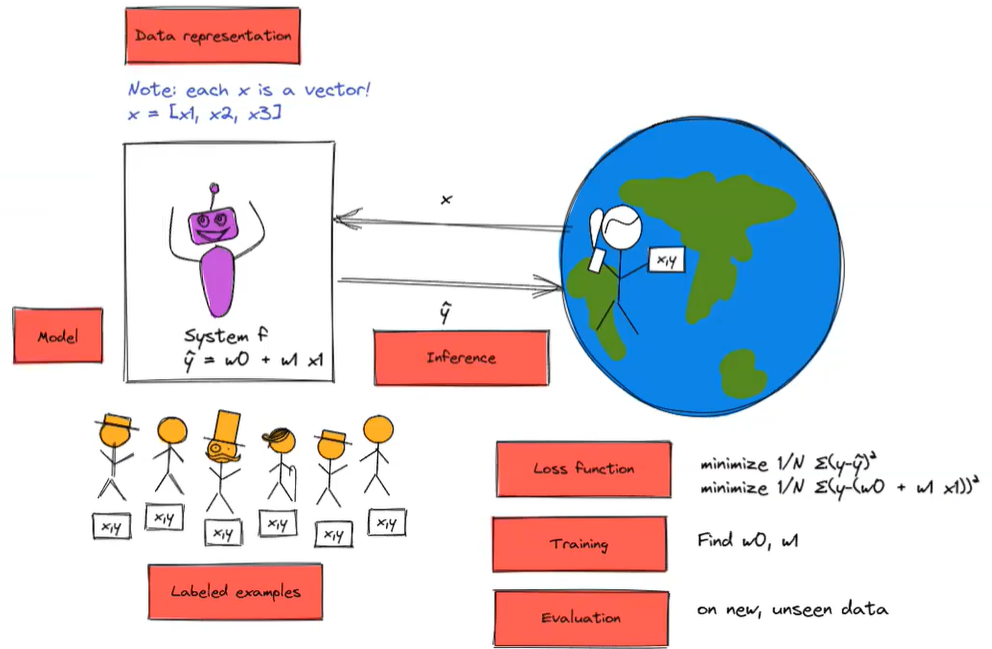

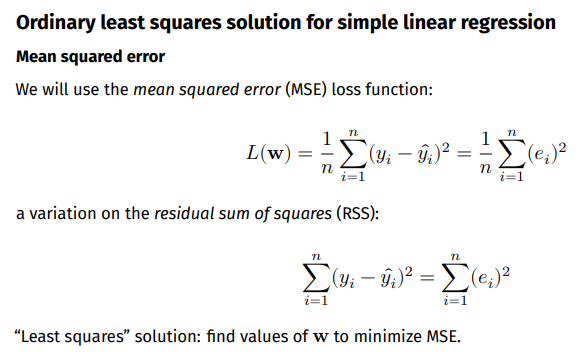

The $w0$ and $w1$ values are called the **model coefficients/ parameters**:

- These values are estimated (or "learned") during the model fitting process using the **least squares criterion**.
- Specifically, we are trying to find the line (mathematically) that minimizes the **sum of squared residuals** (or "sum of squared errors").
- Once we've learned these coefficients, we can use the model to predict the response.

###Eg. Predict current grade of student based on past grades in a subject

![lin_reg](data:application/octet-stream;base64,iVBORw0KGgoAAAANSUhEUgAAAlYAAAEnCAYAAABrMw3mAAAAAXNSR0IArs4c6QAAIABJREFUeF7snQV4FUf3xg8SnAABAgkuxaXoh7QUKQVKkVJcSnGX4u7FA8WhFCjuxT9KKS3SAqW4e3EP7vr/v9Nv05ubq8nevZJ3nocHSHbnzPxm7513z5w5E+Pdu3fvhIUESIAESIAESIAESCDKBGJQWEWZISsgARIgARIgARIgAUWAwooPAgmQAAmQAAmQAAnoRIDCSieQrIYESIAESIAESIAEKKz4DJAACZAACZAACZCATgQorHQCyWpIgARIgARIgARIgMKKzwAJkAAJkAAJkAAJ6ESAwkonkKyGBEiABEiABEiABCis+AyQAAmQAAmQAAmQgE4EKKx0AslqSIAESIAESIAESIDCis8ACZAACZAACZAACehEgMJKJ5CshgRIgARIgARIgAQorPgMeAWBt2/fyuvXryVOnDhe0V53NBJ8UGLHju0O87RJAiRAAiTAI234DHgDgdDQUBk2bJg8f/5cBg8eLH5+fhIzZkxJnDix+ptF5O+//5YBAwZItmzZpH379mECK1GiRBIjRgwiIgESIAESMIgAPVYGgaaZyBF49+6dzJkzRwkq85I/f34ZOXKk5MqVK3KV+8hdL1++lNGjR8vMmTMj9KhChQpKcKVNm9ZHestukAAJkIBnE6Cw8uzxifatu3z5snTo0EEOHDggadKkkbJly6q/jxw5Ihs2bFD/nj59uuTLl88pVvB+7dmzRzZv3iy///67nD9/XnLkyCEDBw6UEiVKOFWXnhfDO7d06VL5+eefw/pcrlw56dixo6RMmdKiqYMHD0qLFi3k1q1bkjlzZilfvrz4+/ur/m3btk0KFy4sEyZMoLjSc6BYFwmQAAlYIUBhxUfDown89NNP0qpVK0mYMKGMGDFCqlatqpa2EE80a9YsJRi++OIL6devn8SNG9duX+Dd2bhxo3z77bdKTJmX1q1bS7du3ZSN+/fvy7Vr19TyWrx48ezWHdUL/vzzT+nVq5fFdkEwTZkyJYJ3Dh6977//Xi2VQmSOGzdOihUrppry9OlTGTNmjMyePVt69Ogh7dq1i2oTeT8JkAAJkIAdAhRWfEQ8lgC8SkOGDJH9+/cr4QTPi6nAefTokfr5qVOnZOrUqcpbY6scP35cxo4dK1u2bJGPPvpI6tevLyVLllSxWhBq586dk1ixYsmqVatkwYIFSlgZ5cWCgPv6669l9+7d8tVXXykxmTp1arl48aISlJs2bVKxU126dFFt1Mrdu3fVfYg1g1crb9684YLXr1+/rn4eP358JUKTJUvmsePNhpEACZCALxCgsPKFUfTRPpw+fVratGkj//nPf1SckCWvEbw1Q4cOlUWLFimRZK28ePFCeXXmzZunvF6DBg2S5MmTh12OXYfwjsHDc/PmTfn444+V8IKYi+ouuydPnghEXaZMmSRFihQWm3j16lW15PngwQOZPHmy5MyZM+w6eLJq164tn376qYqlghDUyh9//KGWAeGNgrfNVHThmlevXqk4tK1btyrxmT17dh99WtgtEiABEvAMAhRWnjEOXt0KLEe9efPGpgAx9ciYdxbLfLlz55YMGTIoj0xwcLC6BLFGWMKCp6V69eoWGa1evVo6deqklsMQW2SrrF27Vi21JU2aVHmuihcvHrbkFxISokQXPFmamNNrx+HevXvDliubN29ucZceGMI7BQ8UgvFNReSOHTukYcOGUrNmTeXBAy8UMMeS5pIlS5QYgwC1VCZOnCjz589XS4LwaLGQAAmQAAm4jgCFlevYRpua586dqzxKECu1atUK6ze8L998840Kwu7Tp4/88MMPynNirUAwQCAgQF3zMMGLhN1u77//vsXbNI+VI8IKXql169aptmKZr1q1alK5cmW17Ldv3z758ssvldcHwsu8IF5p0qRJKgAcnizzFAYIOsdyHfoHL1ezZs3CvEf4WePGjZVnCaINubgcTYOgiSeIo86dO6vlQKSbQAFf/OzevXuqbenSpYvQbs1jBVFJYRVtPpLsKAmQgBsJUFi5Eb4vmNYE0M6dO5WwKlCgQFi34KmBWIFQwRLWBx98EKHLiG1CDqZdu3apJa5KlSopbw3EAjxRjx8/VqIBgdnmBYHow4cPVzvonNkZiN1zEBnwUGGZDqVv374qtslaAtILFy4oUYOAd3iJPvnkE3UfBBWWISHsINYg1FDPlStXVP0QlZZKlSpV1BIdBJatou2KxFLhqFGjlOjUCtrStm1btcRovkSoXQPx1b17d9VO7gz0hU8c+0ACJODpBCisPH2EPLx9CCDHch08K4hPSpIkiWqx6W41iKvevXtLggQJIvQGwunkyZOSKlUqlSIAXivENDkirLQYrCxZsqgAb9OYKXvYTNM44FoEvmOZEILJUkJNCEB4ziCGIPKmTZumRBn+f+jQIeX9gqCCZw1LiNoypmk7YAPLjwgohwDFsqAlJto9pjm8sPMRy4CmQswRYaXFYGEZEV5DI3Y32mPP35MACZCALxOgsPLl0TWgb5oAgiAy9ZrAK4Tdajdu3FCeLMRQQUBBiJ05c0YtvR09ejRCagGIDwg0BG9jxx/yMCFBKJKBmhYInfHjx6ulQ4iqevXqOZxhHCIQHi6kL0BqBYgh1LV9+3aVx6pJkyZ2xZXWFrQTQeeI7zL1dmHZEX2FcILwgjCCkIJ405byzIcHLBFPBe8UCu5HDBl2R6J9iP8yLQiyx44/eA0tLQVCtGLZE3Wae7sMeDRoggRIgASiJQEKq2g57Pp12pKwMvXuIBgdcUVaugBbluEJgkBp1KiRWt7CkhtiiyB+sAxn6klCWgLUjRxTWA7UAt4d6ZnmrcLSIwQH7r19+7byvGHpzNrSI+pGageIGYhEtBEisEiRIjbNasHrtpb/bOWwQuUQrtjN2LVr17BEoYj7gnBavnx5hAB/eLsQVwVPIZYnIRjtLTs6wo7XkAAJkAAJ2CZAYcUnJEoEtMn9v//9r0p7gBgpBIjjCBrEVmmxTxAXiPWBhweeF+xOQ7C1rSBuLaM4Goh6ChUqpJYY4e2CN+vhw4dKVJUuXTpCH+DlQeC2pfo1oaOlL8A1hw8fVuID91nLiaWdxwfPllZsLXNq11y6dEl5nCACGzRooJY8TYsWYI44LQS9w7O1Zs0atcwIDx6WV7VYLfwfP9d2AGoJVLG0CBsQe/CWIQkqNg7AFn5umr4hSgPOm0mABEiABGwSoLDiAxJlAhAa2E2nBYJrFcJTgmU6Le7KWUMQORBO2HUIkYYdh1hi/OWXX1RMFoRaxYoVIxzEDJEE4YUlOCwVwlNkWrScURBoECRYmjt27JiygYB5LNuZ5q4yzdaOZTfYLVq0qFri/PHHH5X4QUJPtM88j5QjfYawQl0Qj/DaBQYGhh1nA48UzvuDR00LuA8KCgrLSYWgdHil4BFEO3AtYs+QBBXLpxCLBQsWdHiZ1JH28hoSIAESIAHrBCis+HREmQCW/nBun/kxMbbilRw1ip12Wo4p7R4EimN5EVnRLQWaY/kQ96AgcSaWDE2FErxeEIPwTGFJEYIEXjQstWnB55otc9GD3YPwyiFAHUISdSAGDOINIkjLMeVo/7TrUBdyTWEnIYQfhBvEGnYBavm00G54A7H8iGSnWswVroeHEOIKBW1AsHrLli15PqCzA8HrSYAESCCKBCisogiQt4cngMkfXqLFixc7lQLBFkcsbSHdwZ07d1QSURxGbCt5JwLekVkdy2I9e/aMUrZxbXcj+oRYLwTJRzUTuyueGYhbbAqAQMMuSXjfLIlOV9hmnSRAAiRAAv8SoLDi06ArAS1vEuKWzNMD6GrIwMogWp49e6Y8QXplYzew+TRFAiRAAiRgIAEKKwNhRwdTWt4kxDg5kwIhOrBhH0mABEiABHyfAIWV74+xYT3Ujl/BDkEe+GsYdhoiARIgARLwIAIUVh40GN7eFC0/VL58+Zjl29sHk+0nARIgARKIFAEKq0hh402WCCBLOI5NMT1Lj6RIgARIgARIIDoRoLCKTqPtwr5qiUKxIw/5lpAAlIUESIAESIAEohsBCqvoNuIu6u+1a9fUmXlIT2DrSBgXmWe1JEACJEACJOARBCisPGIYvL8RyE6OgHWkJkDyzsgmyvR+EuwBCZAACZBAdCZAYRWdR599JwESIAESIAES0JUAhZWuOFkZCZAACZAACZBAdCZAYRWdR599JwESIAESIAES0JUAhZWuOFkZCZAACZAACZBAdCZAYRWdR599JwESIAESIAES0JUAhZWuOK1XVqdOHUmbNq2EhIQYZJFmSIAESIAESIAEjCZAYWUA8SdPnkiuXLkkSZIkcvjwYQMs0gQJkAAJkAAJkIA7CFBYGUC9d+/esnjxYmXpwoULBlikCRIgARIgARIgAXcQoLAygHrBggUFXitkJW/WrJn07NnTAKs0QQIkQAIkQAIkYDQBCisXE9+/f7/UqFFDAgICJDAwUB4+fCg7d+50sVVWTwIkQAIkQAIk4A4CFFYupv7VV1/J5cuX5e7du/LFF1/IzJkzZc+ePZIqVSoXW2b1JEACJEACJEACRhOgsHIx8ezZs0v37t1lypQp0qRJE1m0aJGUKFFCxo0b52LLrJ4ESIAESIAESMBoAhRWLiS+bNky6dOnj5w9e1btCixZsqRkyJBBli5dKkeOHHGhZVZNAiRAAiRAAiTgDgIUVi6kXqxYMUmdOrWsXr1a3n//fWnRooW0a9dOMmbMKBBdRYsWdaF1Vk0CJEACJEACJGA0AQorFxLPkiWLfP/991KmTJlwwqp8+fIqkH3hwoUutM6qSYAESIAESIAEjCZAYeUi4qNHj5b58+eHLfnlz59fWrduLW3atJH+/fsrj9WpU6dcZJ3VkgAJkAAJkAAJuIMAhZWLqCNAvUiRIjJhwgRlAcIKogriCiVr1qwyatQotVOQhQRIgARIgARIwDcIUFi5YByvXr2qdv7t2rVLgoODw4RV27ZtpVWrVur/NWvWlJcvX8ratWtd0AJWSQIkQAIkQAIk4A4CFFYuoI7cVadPnw6XCDRfvnzSvn17admypbI4a9YsGTlypJw5c8YFLWCVJEACJEACJEAC7iBAYeUC6kitULFixXC5qiCsOnTooHYGagXXYWmwY8eOLmgFqyQBEiABEiABEjCaAIWVzsR//fVXdR7g33//Ha7mvHnzSqdOnaR58+ZhP8dRNxcvXpR9+/bp3ApWRwIkQAIkQAIk4A4CFFY6U69Tp448fvxYNmzYEEFYff3119K0adOwnx8/flwqVaqkdgfGixdP55awOhIgARIgARIgAaMJUFjpTBy7/YYPHy61a9e2K6xwQaFChdSy4TfffKNzS1gdCZAACZAACZCA0QR8Vli9fftW8Cd27NiGMUUy0DFjxljMT5UnTx7p1q2bILDdtPTt21c2bdoke/fuNaydNEQCJEACJEACJOAaAj4prF69eiVjx45VCTpnz54tOFpGK0iFMHDgQHnw4IGEhIRI+vTpdSNbvHhxiR8/viDOyrwgUL106dIyderUcL9CO5DjauPGjZIzZ07d2sKKSIAESIAESIAEjCfgk8IKYqVz587y7NkzQQZ0U/GEc/sQRA4RM3HiRMmWLZsu1OEdy5w5s3z33XfyySefRKgTHqvu3btL48aNI/yucOHCKmHokiVLdGkLKyEBEiABEiABEnAPAZ8UVvBKIbUBUhz06dNH4sSJo+giISfin+bMmSO9evVSqQ/0WiocMGCArF+/Xvbv329xJHPnzq1sNmrUKMLvIfBmzJghx44dc89TQKskQAIkQAIkQAK6EPBJYXX+/HlBlvOSJUsqMePn56dgIWknjpVJmTJlBE9WVGnC6wRPFYSbpQJh1bt3b2nYsKHF38PbNW3aNKlQoUJUm8L7SYAESIAESIAE3EQg2girp0+fyogRI2TlypUqxgq79mLEiKELdniaPv30Uzl58qSKsYqMsKpSpYpKubB8+XJd2sRKfJPA4SuPZf/FR5ImaVzJly6RpPL/xxvLQgIkQAIk4BkEfFJY3bp1S5AzCkk6EWNVoEABFfv07bffCjxLOBg5bdq0uo3AnTt3lKdq3LhxVuuExwo7AOvXr2/xmhUrVsj9+/fDJRDVrYGsyCcIhGy6KCGbLoXrS5X8KaTPZ5kkQ3LmQfOJQWYnSIAEvJ6ATwqrd+/eqUBwLAOaF8RV9ejRIyzuyqgRxK7A/v37S7169YwySTs+RMCSqNK617B4ahld6z0f6i27QgIkQALeS8AnhRWG4/nz57JgwQKZNGmS8gShJEyYUHmtLO3ac/UQQlghwL1u3bquNsX6fYzA6RtPpfRo28cebe1RSLKlTuBjPWd3SIAESMD7CPissDIdCoisIUOGqMSdei8DOjrkEFaI7cKRNywk4AyB6VuvypC1523eMvyLrPJVySBnquW1JEACJEACLiAQLYTV5cuXVfqFDz74QDp27Gj4MiDGDXmzBg8eHOGoGxeMKav0MQKbj92VxrNsp+KY0TinIN6KhQRIgARIwL0EooWwWrp0qcrEPmrUKClbtqxbiENYwWtWq1Ytt9inUe8lcPPhSykw6E+bHTg+rLgkTWDc8U3eS5MtJwESIAHXEvB5YYU0C4htun37towcOVKCgtyzXAJhNXToUKlZs6ZrR5S1+ySBVnNPyLpDdyz2reVHaWRQtcw+2W92igRIgAS8jYDPC6uDBw+qDOvNmzdXf2LFiuWWMcqbN6989tlnKpcWCwk4S+Bi6HOZ8utlWbDrRrhbKaqcJcnrSYAESMC1BHxaWCHtwuTJk2Xx4sUyffp0dcSNu0qOHDmUqPr888/d1QTa9QEC2CG489wDSZ7IT0pkSaL+ZiEBEiABEvAcAj4trLREoTiMGWkX0qRJ4zbyFFb20U/99Yr8euKuujB10rhql1vhjP72b+QVJEACJEACJOAhBHxaWB0/flwt/+XPn19lYE+cOLHbsENYIXi+WrVqbmuDJxtGniZ4Y0xLgjixZHy9bNzt5skDx7aRAAmQAAmEI+DTwurBgwcyZswYyZYtm8p4rh3G7I5nIHv27KotVatWdYd5j7bZY/mZCLFDWoNxFt7S1nmZ/NKjR5CNIwESIAES0Aj4tLDypGGGsELKBxy2zBKeQHCXHTaRdK2QXrpWyEBsJOAQgRtPbknnLQPl8sNrMqZMfymRprBD9/EiEiABEtCDAIWVHhQdqAPCKiQkRO0MZPmXwM6zD6Tm1MMUVnwobBJ4ceiQxM2f3y6lRy8fS+ctA2TfjSPq2kRxEsr4soOkSND7du/lBSRAAiSgBwEKKz0oOlAHliPHjx8vlStXduDq6HMJhVX0GevI9vTR8uVy79tvJe2mTRIzUSKr1UBU9d8xWrZf3i1pEwdLDIkhFx9ekYB4SWV6hVGSLYC5viI7BryPBEjAcQIUVo6zitKVEFY4p7BSpUpRqscXb246+7j8dDTUatc2dH5fCqR338YDX2TuLX26O2qUPFq6VBLXri0BvXpZbfart6+l97bh8uvF36V0+hIy+INu4hfTT4buHC8bzm2RFAkCZNonI+W9ZJm8petsJwmQgJcSoLAyaOAorKyDPnzlsVQcd8DiBYyvMugB9UAztzp2lGe7dkmyrl3Fv25dmy38/vBimbp/jpRKV0yGfthDEsf5x7MFL1a3X4fIn9cPSAb/tDKj4ihJnTDQA3vLJpEACfgKAQorg0YSwgq5tCpUqGCQRe8yc/zaE1m575ZsOXFXrtx9IbmCE0rTD4OleoGU3tURtlYXAtfq1JE3V69K4KRJErdAAbt19t0+Um49DZWhH3aPIJw0cXXg1lGZ+PFQKRZcyG59vIAESIAEIkuAwiqy5Jy877333pMpU6bIJ5984uSdvJwEog+Bt6Ghcq1uXYnh5ydp1q4Via3PwdJv372VBy8eSZK4iSVmjJjRByh7SgIkYDgBCiuDkENYTZ06VcqXL2+QRZohAe8i8HDuXLk/bZr4vfeeBM2f712NZ2tJgARI4H8EKKwMehQgrKZNmyYff/yxQRZpxhUEcAjyzYcvVNWZUyaQzwtyqVIPzg9mz5b7U6ZInGzZJGjxYj2qZB0kQAIk4BYCFFYGYYewmjFjhpQtW9YgizSjN4FWc0/IukN3wlWbL20imVg/OzPDRwF26MCB8njdOvFv0kSSdegQ6ZqwMzBWjJhc6os0Qd5IAiSgBwEKKz0oOlBH3rx51bmFnTp1cuBqXuJpBCyJKq2NDYunltG13vO0JntFe240by4vjxyR5AMHSsJPP410m8/dvyCtfuopsWPGklmVxkmaxKnD6lp2cp2M+2uGFEiVR8aWGSAJ/RJE2g5vJAESIAF7BCis7BHS6fdZs2aVWbNmyUcffaRTjazGKALbTt2TejOO2jSH8ww/zJbUqCZ5nZ2NR0LlYuhzgYfv/fSJBAdsX6teXd48eCCpZ88Wv0xRyy+19dJO6fLrICmRpoiMKt03TDw9efVU2v3cRw7eOib5UuaUyZ8MF///pWLwOohsMAmQgFcQoLAyaJggrGbPni2lSpUyyCLN6EUgZNNFCdl0yWZ18FjBc8USnsDpG0+l46JTglxlWikR+56M2hUi8ZMnk+DVq3VBtuj4Khn951TpUqSVfJmnZlidp+6ek1Y/9ZCnr5/J4A+6S6XMZXSxx0pIgARIwBoBCiuDng0Iqzlz5siHH35okEWa0YuAI8fuzGmaSyrkSa6XSZ+oB6Kq5bwTgr+1UvHmXulzapEc9c8kiadMl3I5A3Tp64yDC2TagbnS4z9tpX6uz8PqnLD3e5lzZKl8kLZoOE+WLkZZCQmQAAlYIEBhZdBjAWE1d+5cKVmypEEWaUYvAo9fvJHi3/wloY9fWawyUdxYcmRoMYkbm/mRTAF9t+2qDFpzPuxHbc+vk0aXfpENqYvKsBwNpHaRVPJtvWy6DJMlYXXo1jHp9MsAef3uDQ9i1oUyKyEBEnCEAIWVI5R0uAbCat68eVKiRAkdamMVRhP4Zv3fMuXXKxbN8tgdy6NRc8ph2XnugfrliKOz5aM7h2V65soyL/2/udyujdPHg7vu7M8y8PexkiZxkHxbbrC8fPNKuv02RK4+uiEl0hSWcWUHSbzYcY1+bGiPBEggGhKgsDJo0LNkySILFiyQ4sWLG2SRZvQmgBxWq/ffChMLaZLGlbZl00qTD4L1NuUT9WnCava+EMn85Lr0yd1UdibPFda3lInjyKHB/9Glr/efP5A2P/eWE6FnwtUXM0YM6Vq0jTQwWR7UxSArIQESIAErBCisDHo0IKwWLlwoxYoVM8gizdgikCNHDnnx4oXEjBlT3r59G3ZprFix5M2bN1ZvfffuncSIEcPi703vjR07trx+/VpdZ/rzcePGyeef/xsD5MujNHD5Sak8rp0kevNMahbtL/fNduMhJg2xaXqV8/cvSt/to8KJq4B4SWV6hVGSLSCzXmZYDwmQAAnYJEBhZdADAmG1ePFiKVq0qEEWacYWgaNH/0mfcPfuXQkI+CeA+vHjx/Ly5cuw/9+7d0+SJUsWrhp4HdevXy9LliyJUL1pXdb+jZvy5Mnj84PzYv9+udGho1yOGyC13+9usb9rOuSXIpn8XcLiyO2T0ubnXirFApcBXYKYlZIACVghQGFl0KMBYYXJuEiRIgZZpBlXEAgJCZFFixbJvn37XFG9T9T5cMkSuTd2rMQvUULOdhwqM7Zdkc3H7ob1LV1APOlXJZNUyZ/CZf2dd3SFTNw3S+0SrJ2jisvssGISIAESMCdAYWXQM5E5c2ZZtmyZFC5c2CCLNOMKAhRWtqneHTFCHi1fLonr1JGAnj3DLoawOnf7mUoQWiJrElcMTVidj14+llabesrdZ/dkyifDJUvSjC61x8pJgARIwJQAhZVBzwOE1fLly6VQoUIGWaQZVxCoVauWnDx5Uo4cOeKK6r26zpvt2snzPXskoEcPSVyrltv6sv/mEZVtHbmrhpXqIXFjcTeg2waDhkkgGhKgsDJo0CGsVq5cKQUKFDDIIs24ggA9VpapXqtVS97cuCGBU6dK3Lx5XYHeoTrfyTsZ+sd4WX/uF/mmVC8pn5EnHTgEjheRAAnoRoDCSjeUtiuisDIItIvNUFiFB/z65k250aCBxIgbV9Js2OBi+varv/HktjT579cqZ9XMimMkRXx9Mrvbt8wrSIAESOAfAhRWBj0JEFarVq2S/PnzG2SRZlxBgMLqX6rPtm6V2717S5xs2ST13LmuwO10nVqi0KJBBWXCx4O5DOg0Qd5AAiQQVQIUVlEl6OD9uXLlkmHDhkmNGjUcvIOXeSIBCqt/RuXBzJlyf/p0SfDxx5Jy1CiPGaoRuyfJ0hNr5YvslaV/ic4e0y42hARIIPoQoLAyaKzhsVqzZo3kdWP8iUFd9WkzFFYid/r1k2fbtkniunUlabt2HjXeO6/ulTF/TpU2BRrLJ5k+8qi2sTEkQALRgwCFlUHjnClTJlm3bl20SA5pEFK3mInuwupGs2by8uhRST54sCSsWNEtY0CjJEACJODJBCisDBodCKsNGzYIlgRZvJdAdBZWV6tWlbePH0vQnDkSO0MG7x1EtpwESIAEXEiAwsqFcE2rdqWw2nQ0VE7deCrbT91TJotnTSJdK3Dic8XQRkdh9fL0abnZsqXESpZMgletcgVW1kkCJEACPkOAwsqgoYSw2rhxo+DwXz1LyKaLErLpUoQqGxZPLaNrvaenKdYlItEtQejjdevk7tChErdAAUk1YwafARIgARIgATsEKKwMekQgrH766SfJnj27bhY3HgmVZnOOW62vf5VM0qZMWt3ssSKR6OSxuvftt/Jw3jxJVK2aJB84kMNPAiRAAiTgAAEKKwcg6XEJhNWmTZskW7ZselSn6pj4y2UZ+d8LVusrkSWJrGiXTzd7rCj6CKvbXbrI0+3bJVmHDuLfuDGHngRIgARIwEECFFYOgorqZRDNncAQAAAgAElEQVRWmzdvlqxZs0a1qrD7a045LDvPPbBZ37VxH+pmjxVFD2F1vUEDefX335IyJETiFy/OYScBEiABEnCCAIWVE7CicmnGjBlly5YtkiVLlqhUE+5ee8Iqd5qEsrlrQd3ssSLfFlZvnz6Va0hg++6dBC9fLjH9/TnkJEACJEACThKgsHISWGQvh7D69ddfBYlC9SrWAte1+rtWSM/dgXrB/l89vhpj9fyvv+T2119L7LRpJWjJEp2psToSIAESiD4EKKwMGmsIq99++02wJKhn6bH8jCzYdSNClVXyp5AZjXPqaYp1ifd5rEIfv5If/rgWNnaFM/rLR9mThRvLhwsXyr3x4yX+Bx9I4LffcpxJgARIgASiQIDCKgrwnLkVwmrbtm2SwQWJFaf9dkW2HL+r4q2ypU4gEFXMY+XM6Dh+rTd5rE7feCot550Q/G1aTEX3jSZN5MWhQ5K4fn0J6NbNcRC8kgRIgARIwCIBCiuDHgwIq+3bt0v69OkNskgz1gg8f/5c1q9fLwsWLJADBw5IyZIlpXnz5lKmTBmJESOGTXDeIqxuPnwpdaYfiSCqtM4hx1n5eYPlxd69krhhQ0nWqRMfGBIgARIgAR0IUFjpANGRKiCsduzYIenSpXPkcl7jIgJ37tyRAQMGqOOF0qRJI4GBgUpcJUyYUCZPnixly5a1abl///7qzMeDBw+6qIX6VGsv/m7l/pGS9u0jSTVtmsTJnVsfo6yFBEiABEhAKKwMegggrP744w81mbO4h8CDBw+UqELaiy+//FJatGghAQEBKvatSZMmymvVq1cv8fPzs9pAb/FYWRNWQc/vyux9IfIsVlx5O2+FlMiaxD2DQaskQAIk4KMEKKwMGlgIq507d0pwcLBBFmnGlMC7d+9kyZIlSjhhAwGE1CeffCKXLl2SGTNmqFQYAwcOVD+3tRzozcKqzO1DMujEPDmdKK20KPi17OhVWLIExueDQgIkQAIkoCMBCisdYdqqKmfOnLJ48WJ5//33DbLoOWawa3H1/lthyUzdcY7hrVu35Ouvv5bQ0FAJCgpSqS9MS+3atZXoSp48uU1w3iKstp26J/VmHA3rS7MLG6XZhU3yS2ABGZCrsWRKEV/+6FPYcx4StoQESIAEfIQAhZVBAwmP1e7duyV16tQGWfQMM63mnpB1h+5EaEy+tIlkYv3sahejEeXPP/8UiKcePXpIq1at5MKFC8qDiFKwYEF1OHbs2LHtNsVbhBU6orEffHyelL+1T+ZkrCgzM1ZSfUQqDuwOZCEBEiABEtCXAIWVvjyt1gZhhck9VapUBll0v5kVe29Jx0WnrDYEB0TjoGgjCgLO27dvL23btpVu3bpJrFixImXWm4QVOnikZkOJf/G0DMreUH4NLCAQtO3KpaOoitTo8yYSIAESsE+Awso+I12ugLD666+/JGXKlLrU5w2V9F91Tmbt+Dc5pXmbjTwk+vz580pUYSlw+vTpUqhQoUgh9CZhdbVKFXn35Imknj9f9jxLJCkS+RnmIYwUXN5EAiRAAj5AgMLKoEFEYtB9+/ZJihTRZ/nF3lmGQG/UIdGmwevYmdm9e3epVKmSxIsXT5DXCukTfvzxR/n999/VUmHjxo0tPhneIKxenjghN1u3llgpUkjwypUGPeE0QwIkQAIkAAIUVgY9BxBWyJeE7f3RpViLr9L6j2Wpn7oUMAzH69ev1QaCsWPHyv379y3azZ8/v3Tp0kVKly7tlcLq8erVcnf4cIlbsKCkmj7dMLY0RAIkQAIk8A8BCiuDngQIK3hFkiULf06bQebdYgZB6xBX1kq/zzJJ27JpDW/bjRs3VHoFbCaAwMIybZ48eVQGdmwusBXE7skeq3shIYJz/xLXqCEB/foZzpUGSYAESIAEKKwMewYgrA4dOiRJkyY1zKYnGLKWqLLZh8Ey9PMsbmsiUkDsOH1PcEhxwnixpNVHaR1KltmyZUu1m/Do0X9TGbitEyaGr5QvL2/u3ZNknTuLf8OGntAktoEEdCWA5fxNmzbJyJEjpXLlytKpUyeJEyeOrjZYGQnoQYAeKz0oOlAHhNWRI0fE39/fgat96xJ4rjYfC5Vr916ojjUsESTVC7gviN/aEmXXCuntHl7tiR6r6/XqyatLlyRp69bi36iRbz087A0J/I8APMxYpr969ar6Cf7dpk0biis+IR5HgMLKoCGBsDp27JgkSpTIIIs0Y4kAPFU9lp+xCgeHEyOBqbXiScLq7aNHcq1mTZEYMST4xx8lZgJjcoLxySIBowns379f+vTpIy9evJD//Oc/KnUNdvo6clqC0W2lPRKgsDLoGaCwMgi0HTP2diraywqvh7A6feOprDt0O6ylhTP6y0fZnYu9e7Z7t9zu2lX8MmSQoEWLPAMuW0ECLiBw4sQJdWoClv0GDx4sBQoUkFOnTknPnj3l9OnT6m+c/WnrKCoXNItVRgMCb968kZUrV0rcuHGlatWqDj9jFFYGPRwQVviCSECvgkHELZsJ7rLDpn17ubWiKqysBfQ7sgypNfzhvHlyb+JEif/hhxI4frxbedI4CbiSAPLO9e7dW53pOXz4cHVKglbgtcIxVDdv3lRxV5j4WEhATwJIxTNkyBC5d++ejB49WhInTuxQ9RRWDmGK+kUQVnjLQt4kFvcRcKew2nrqntQ3Ob/PnMK39bJJ7SK2M/OHDhkiSKmAAPVkXbq4DyQtk4ABBHD01IABA+Srr76SMmXKRPAYaOIKB6rjRAU/Pz8DWkUT7iBw/Phx5bls0aKF1EQIhAFFE1YnT56USZMmCXIgOlIorByhpMM1EFZwW8OlyOI+AvaywU9tlMNmYH1UPFbWdkhqNMrlDJD5LXJbhXOzVSt5gVxofftKomrV3AeRlknAgwhg8kPhS6sHDYoLmrJ69Wq1E7R58+bKU2mEiKawcsFAmlaJ5JJbt25V6RIKFy7stDUIqzNnznAHi9Pk9L+h4rgDcvjK4wgV1/1PKhlXJ5tNg1ERVvbiu2DYWib6azVqyJvQUEn13XcSJ3t2/aGwRhIgAZcQuHbtmuzYsUOliODmpcgjnjhxouD716eF1dOnTwWuOQiO69evy+HDh6Vr164+++BgjRVq+eXLl8ol6OyZfxBW586ds5l8MvKPHO90hgCCx5f+dVMOXXokO889kFzBCaVGwUCHkpW6UlilC4gnf/YrEq4rry9flhuNG0uMRIkkzdq1znST15IACXgAAc3TghidOnXqeECLvK8Jmudo4cKF8umnnzoV7xSV3mp279y5I2PGjJEkSZI4VJ3TS4FI0oatr9idgYSXWkmYMKGg09ix4YtFE1aPHz92aq1VYwFh9ffff0vMmDF9EU+06VNUhJW9pcAahQJlcoN/vVFPfv5ZQgcMkDi5cknq2bOjDWN2lARcRQDz14IFCwTej2+++UYQm+Xqogmr/v37K2+LecHc0qNHDxU/lCtXLlc3xyPqh4NiwoQJsmHDBjUW+fLls9kubf7dtm2bocLq0aNHamxQXBq8riVpg6GGDRuq40BmzZole/fuVQFliKCHyPK1og0s+tm3b191mDLyqKCkS5dOKlasaNMblTVrVkEAnK3jUnyNmS/2p1atWiofGby1kSnWlgOzpU4g332ZU/A3yv2pU+XBrFmSsGJFSfHNN5ExxXtIgATMCGD7/OTJk2XcuHEqEHn69Ol2J/WoQtSEFZYCa9eurXY4PnnyRGLFiqXmDew0w2rIBx98IDjZIToUrHhBK+DsVoTWQGSlTWv9eDPMtW3btlU7641cCtTmfWgalwkreFygqm/duqV2alSoUEHt0sAZeIjURzDZ999/7zOqG2fKwSuH2ChMpH/88UeEw3sRc/XRRx+pHSnp06e3+pmAx+rixYvR4TPj032MisdKA2PuuSqfO0D6Vs4UJqpu9+olTzdvVpnUk7Ro4dM82TkSMJrA27dv1Zy1dOlSwQsvdhzqGQgNbwxevnDSxpUrV+T3339X/zcvuXPnVvm3Pv74Y5VFPnPmzCoJanQ5pgeccDwY8kSVLVtWPv/8c6uPgqmw6ty5s7Rv317XMbNmWBNWCP1xxmnk8FIgIECxLVq0SCVka9CgQZj35e7du0pwIbgbwqp8+fKR/qwgDgnqFS4/qES4RuvWravAYxkN7Vi+fLladsTDiqVHZOKFinU27slWIx88eCAYwF9//TXcZWhT/fr11dtF9uzZlU17Xih8kDNlykRhFemnwnNu1ENYab3ZefaBpAuIK4it0griqV6ePi0phg+XBGXKeE7H2RKPIoCAaHznYgXBvOA7CpM2XuYwYQcHBzvVdsTN4rvW08IW0C54eVyZCBTf+5h7Nm/erM4DRaZ35M8qXbq0wwzXrVunJn7zUqxYMZVrC3MWxkZb2YH3ql+/foJ4Hme8Ig43yIELb9++rZbkcDg92pM/f3757LPPpHr16pESehirs2fPyvr161WWfMzV8NghU35kAvg1YQVvn5E5yzRh9d577zm1E9FhYYVUATiXKUuWLDJixAhJnjx52HDBvTp79mxZtmyZ+p3prjmAgIcLAsleckzNI3bgwIEIj0K9evVUx/CWgQfdvEDtY9DgPdI+eBiM7777TjZu3KgeYgxs69atw9quuWQhkCB+sKQJUde4cWPp2LGj/PDDD+rQT7hrc+TIoUQl2oa+5s2b14HH9Z9LKKwcRuXxF+oprMw7e/Wzz+Td8+eSeuFCiZ3Kdj4rjwdl1kB46ZAcFRsHICRrFwm0ey6jt/VRz/YitmPJkiXqOwcJMPEi165dOzXhoSCYFpuF8DJrreA7D8teeCl1tGiCDV6T8ePHq5AHreAlc+jQoVKuXDnloTcyvQFWDPDyXLJkSRXfq80liJnCS/aMGTOU5wl/IL6cKagDYRpgvXbt2nCrEmDobGZ3CArcgxUMzB2Y/yCcrC1hRTYJpb35zVEGWhJWzHXmBatSWJ3SlunQVoglxKlhLsR4oF9ajjEs8UFYrlixQvbs2ROuOghLbQnWVtsQx4y2gFuyZMmkSpUq6jOApUA4MkaNGqVeFtAWPBcBAQFKqDoiuLWxRhuxrIgXEMzt1kJ5XC6sNBXuzNlMWuDXf//7X4ueLOwkRGAYYOfMmVN9CYwdO1Zq1KihXKKACMj4goGYwZcL7nn48KGKc6pUqZIaH7xZ4F78DY8Z6kJ7ESx4//599YaAQcLhnRgkKF58KeDtAA8JxBc8ZcjwC7WOMm/ePCXStII3l2HDhslPP/3ktLCCeocg5VKgox91z73OFcLqxZEjcqtdO9XpdNu3e27nI9kya0lZq+RPITMa54xkrb57GybM7t27q7hVvDDGjx9fvfEjJsheqAW+a/CCumvXLhW7g+9IZwQQJkusRjRq1Eh5xLR7TXdlYQUBk62RsbTa/IPlGMT2auLJdLUEYg8vzvaW9TC5YikQBXMD5oUOHTrIvn37FGPUj5dw/NveaoQjT6HGVHMOmLdPY4tlQ7zYQ0xoKzdoG4Rknjx5wkyh/fbmN2e8QloMWKlSpWTQoEFqrkKbIG6mTp0q8NZgzsTPMO4IOAebwMBAJa5MBTyeT4hvFIgysARjSxnL8azC4xoUFKRsopg++1qHEZdWrVo1FX+GOVnz6sGrCFFnaZegtsKG50RLHAt7EOEQZpjn0S5/f3+V1QA24FAxX4bVhBWudWb50WGPFYL84I1yZqkPShieH8QqQfhA8JgWbRCwOwPgILLgGYO4Mt9dCCgQNXhrw4fH9EOv1Qm1DDB4i8PbHFQs6ixRooRA5EFo4QtH8zjB9QmvFL4o8HDh7QzB+GvWrLH4doHr58+f77SwwiDj4aSwcuRryLOv0VtYPVqxQu6OGiXxihSRVFOnenbnI9E6ezsh7R16HQmTXn0LJlIs38GDgskeYQcQN/jewaRmbWeZ1mm8iOLeVKlSqUkDk54z4kCbrOABwlu8Vi5fvqzagxdUvAjD+2Cv4Dsbwcn4PscLLlY5MDljUoOX4Ntvv40wJ1irE3MF2jRz5kx5//33wy7T4nsx0cMOYqbsFdMt9LgHfKZMmaLmKPDCch3mD71CS7RlLHh3LCW2NE9CCYGF67TNUbgP3kOMKcovv/zi0PxmjwN+/+rVKyWa4KmDIDIdc/weqy3Pnj1T18GpgucDcWGIqYan6LfffpMmTZqEzZeIK4NTBN4gjDHmaey8tLSsrIkWLbYM8ySecczzsAFxD/tYpkR8M8YKwkoTn4jNwmcFzyV0hqko0sQyRCyeM4yltiKFDUjQEBB0mkZBHBzGH44X04LM/xBUWBK1tKPTGmOHhZX2xoC4I/xxxO2mPVCILzJfO8ZaNjxEOOYFHUqdOrXaGWErnYG9bavoJEQc2gcBhWA4vH3BjYkHB+obHzwMDEDDAwXPFApEH5YY8QHFICFfBQYSX05aiaywgrcrW7ZsFFaOfNI9/Bo9hdXd0aPl0ZIlkviLL1Q2dV8slb89KAcuPbLaNXqt/kUDIYIJFN+HeLHEhAUBA28VJgcsMeFvTFSYhCCg8MKIzTXwtsBjr03GWq2YtJB/x9Gkxtp3rPkLNEIw8JJq7aXW0gBDMODzAi+B5iGAcIFHDe2xt+HHtE5L370IQQEP/M7ck2Xrs6StPoCrdkwJJnAEUmNuwBKWFjqCSRu7vh2Z76zZdEZY4SV/2rRp6oQOiGoIFyzBapO+o/ObrR12pu3URB0Ek7UQF3jIsGoEsYe5HM8lnkGE0kDsIi7LdCULYgV1YbkQghoCC8t48GCZek+1OGZt9QhaAILqiy++UNpAW+7Fcw9xA7EGL5mpYwTPlyVnz88//6x0QNOmTdV8jiVDiEGsemFZVgtl0oQ5XhiwZI7nyTRXlTZ2yHjgEmEFFQ3hg85pH257E4HWKMDQVCbuMR2oQoUKqYcbDzvgA6a1M3m0zKu23tq0LwAMPAbE9IsGXzJ4OPA72MOHER96iCltl6P2c/OzgdBm9Bt/sBaPtwgULE3i/7becPDwIo6LHit7T4zn/B5vSPBcmm5OwISg7RSFhxVvPOYFb2iOlFsdO8qz//8ix3l//vXrO3JLhGv+vvNMrt9/GSEAPlKVueimqJ7N6KJmeWS1Whwrvtjx9o2XQ61gosckoX1HWguQNu0YvtewkQhv/o54cnCvJWGF71GIIHyPQfiZrzwYAdOSsNJS/+ClFS/FzgTpa3MJvB6mohMCC3MGlrswgUMYFC1aVM0bOAA6MgILy3oYNyznaTvLwBLeNwggLNdqcxFYai/5sAfvTatWrdQfCFu0F3/bm98cbafmNcK8bk1YQXTgew2CCd955hu6sIwGPqZx1+gHnCR4huFtxYYA7KCHcII4x/OsiTrkxYTTA3MpNIaptxSCHCtlsAlvFeZajDUcJtoYQlvAo6QVU/GpaQXM85i7IVCx2Q3FNOWDdq95XS4XVjCsPch42AAHH3Rba7mmMVZwN0KN4y0DXwpYy0U9+MADKlx2ePigXiGs8JZgXjSQiK+ylO8DLkvUixQJqBOCDm8fUMKwgwdVG3zTXX9Qw3gz0dQ03MIYCPN4Bm3pUlPImtjCYNsKaMcA4sPiqcJq26l7svfCQymeJankS5dIEsV1LvjTiC9Wo23gQ4zxMg+ExRcv/pjvTsLP8Dzgg2hvN9X1unXl9ZUrknLCBIlXqJDTXcNuwhnbrsjmY3fD7m1RKo3KHJ/KP47T9bnyhv8M+0su3/3nLDdLhR6rf6loSxv4cseOLHhU/vrrLxWfUqRIERWmoD1biL9CHBa+V/CsYjMNvjPxfezopGppPPBCgTd7LUgcXjR4IzCx4eeY1N2RDkB7YYZIRL+xRIN2IcbHmbhfrc/adzkEDWJr0E8sOZm+SEEYQNhAAOFFOzJ2YE9blsJSnrZyo4kteFDgWYF4MH/JxziabhrDCgs8NI7Mb45+pjVhBW/nnDlzwjZHmN6PXX0QTxh7CDywh3cPBXMqPFKmy82oE8+p5vnBdyO8qmAOwYpnFs84eEAX4OewjdhpCCssNcNrBSEHbyuWk7Hkh59hUwCeP4gkzO3wIhUvXlz9H6te2HwBTrCDgrkd98LjhiVKeKuaNWum0mDgHnzm4IHD5wshSSimS92asEL8Gfrv6LK6w0uBGmi41LBEBveftq0XggQNRSMQZQ8BpL0haWIMDxc8Rii4Dg3FmwagosFQ7RBWcC9CpFhaw9eEFQbZdGeI1jZNLMGzAHeqrTcr7Vo8BOZr81qcgbl61d7m8EHAAwDBBpclBJz5TknTBxMfUHDxRGHVau4JtVtLK8kT+Undoqmk72eZHP1s+uR1mNCcOUEdHzi8CUFkWytv792TazjSIlYsCV61SmLG+zfNgqMQ7z99Lbn6/evJML/P2lmDjtav93X2YqyWtM4rpbIl1dusV9aHFzpMvNobuTs6ge8qeO8x4ZgWfNc7ulLhinabeiFM649skk/zY2a0CVRbJsRnWZtEMSdhRQKB8nhhx+qDM0UTL9jZhvu1TQj4N4QFhLGW2gfCBf/WlsHwUo7xgIDEswGPiyPzm6PtM81ojnkQ8UfmRfOOYn6G59LerkttnsYOTfQFwfgoEK/4foQXSRM8eObh0YJtPGPwaKFg7kZQOXQD7OJ6MIEAw9yPEB6IIcy7+Dfuhb7QVqggwOEJg7MFzCDutASjpv2DgwZx2xCBCBfCfA4nDwQ34q0gInEf5m+X5LEybQwAYW0SO+qgGrUdK1COcMnhoTR9q4EYw4cSuwzwJoS3MQgpdBaKFAVvIRAyeGi07ZTmA4y3NKyXAjJ2WJi/mcEbhiB7PIB4C4FCtbUjBrbwRoAEbaYPC75cMHgYODxomh24KuGpw2BrBR8SvMlg/dha8VRhZS6qTNvPoGKRDz/8UAl9RwsCIC15WnH/sz/+kNvdu4tfpkwStHCho1VGuK7H8jOyYNcNq/d3rZDe49IYWHvOsCMQHiuWfwjAM4DvNnynYMkN8SzuKHjrx0RnKq4cyY7t6raavtRrtrB7D5Oro2e4affhux/LV1ipgNcIAgZCBy/12s5w8/4g7i0y46LtUIPny7TgxQ0eFOz6hJjGXGppqVXzIkKw4GXe0fnNkfHAnAnnBlIlWdpghjo00QkPEuZXhO/YKpoX0fTIO/PrMTfD24Rr0XcITAgjCCe0A6tZSC0CbxLGWNMTGCd4lOAlAz8sJ0KsoQ8oWPpGmAbuRZA/lhXhsYLuwLIk6gZP/B/iC6lDtLpNN1tg4xvsYHkZwhbaw56zxrSPTnusHBmsyF4DoYU3Bjxo1gp+DxFkzSVn+mYDwFDY2mQHBQzXLgQeIGLJ0Zl1edyDD4f2EGDAISSxVdSW+x0uTrjqPcljhckZk7S1UiJLElnRzvb5TZEdZ2+5Dy8OmOiwxGerwO2NSdA89kC75+GcOXJv8mRJULq0pAwJiVL37cUslcsZIPNb5I6SDVfcjOdtx+l7Evr4lSSMF0uafZiGnioz0KbB63hjx+SDHc34rtPiVVatWqUmBkzAzuSniuyYapMqxIe7lgEttR0THbwb+H7H5BuV5U+tfnzOsUSHZSOsyKDviAvCJA1hiTRAjgaFm7dZi1PDizxYwrmAF3rNM4VddxBgllJY4LlADBTim/BvbXOWXvMb+g2BAieEJY6mMdEQ/XCCaGk8cB+cLD/++KPKMA+PG5waEEBY+cHP4f2HWIXXB/ks4YSAl84dS8qOfA7QJ2gMLS0GcsbhWcBn0lLaCEt1epSwcqTTjlyDtxFsHcWHw1LBwwuPFyZNzU3pSL3aNXhI8FDYy5eiXa+pb08SVvaWaND2P/sVCZcV3BlGvnItDgfFsrG9goR48HCal9BBg+Tx2rXi37ixJOvUyV41dn9vT1hRENtF6NEXOOI5waQEkWOa28hVncKLKJZusIpghJBzpB+Y6OGhgACy5mVxpB6jr4EogmMAYioqQtDV85slLuapMyxdAwEK75AzWeqNHgOj7PmksAI8qH+ssW7fvl2d2QQvGCZJvHlAOTuqPPUYCKxjI/eKtwmrLd0LSs4g3ztQ25kxhXcSCWThMrdWkGF5x44dEX59s2VLeXHwoCRHMsXPPnPGrNVrrR3irN3QsHhqwTIui/cSgHDA5Imt9lgeRJwI3pYhpBBmgQBrexsk9Oi9Ft+D2CBr4Rl62HG2Dm2XGoKfEffiTDJMZ2156vXumt+wIgSHBWKn4TDAhgo8l1haQ/C4o8HdnspVr3b5rLDSC5Ae9SDoEevzniSsVu2/Le0WnLTavTRJ48qO3oUlnl9MPRB4dR344sAOV0sFb56I1UDsnWm59vnn8ubePUn1/fcSx4GkhY4CsrWEG5DQT9Z0yC9ZAq0vpTtqh9eRgLYjDctWzmSddjU5LeYIsa11sBmEhQQ8jACFlQEDgjVaBPx5krBCtyuOOyCHrzy2SOCbGlmkyQfOHd5qAEq3mECwKII2LXmtkK0fyRm18urCBbnRpInE8veX4DVrXNJea8u4DAZ3Ce5oWam23IZgYgRNO5pg1NWw4KlBsDPieiITSO7q9rF+EgABCisDngPkR0H8DbZuelLBgbjf77gabpcZcli1Kp3G43aWuZsbtlgjqNG0YDkGO0uwHIHyZONGQUxVnLx5JfX/dqm4qt3bT9+Xv/7+N/arSv6Uki11AleZY73RjIB2Bh/iUSOz685VuDw1mN5V/WW93kmAwsqAcUNMALL3epqw0rq+4/R9uRj6XFIm9pPSOZJJ3Nhc/jN/LLDct3z5crUrRyuYdLAFHAW7/h4vXy4JPvpIkv9PaBnwaNEECbiEgLbcZu3gYJcYdaBSLVGovTMTHaiKl5CAywhQWLkM7b8VI6stssYiBwmL9xJAnhVtORDbcRFXhd1Zt3v0kKdbtkjStm0lSbNm3ttBtpwE/kdg7ty5Dh36bCQwvNRgWR65iSydD2dkW2iLBGwRoLAy4PlA/iwkT/VUj5UBCHzCBAJlsUuwxq8AACAASURBVEsL8Sc4JBXBvde//FJenTkjKUeNkvilSvlEP9kJEsDLILJiI0cUvO2eUpArDrm8cHaddpKHp7SN7SABjYBPCyskXUPGd3iKECeAbcruKMhkjER/FFbuoK+fTbwxIxksSr26daXDkSPy7tUrCVq8WGKlYAZx/UizJhIgARLwXgI+LawcObnbiKHDETjI80FhZQRt19rQgth/T59eYgUFSfCyZTYNItP4D39cC7umcEZ/+Sj7P2dnsZAACZAACfgeAd2EFbbB4jgA7YR1T0BlesYRzoDCsTLuKJcvX1bnzlFYuYO+vjZ71a8vcQ4ckPblykng5Mk2K8euy5bzTgj+Ni04Hw+pEVhIgARIgAR8j0CUhRXiTXAIMzLzIss58p04ewafq7Bq50nhCBp3BjviIN9SpUpRWLlqoA2q9+7IkfJo2TJJXLu2BPTqZdPqzYcvpc70IxFElXYTD7k2aNBohgRIgAQMJhAlYYXTrnEo8bx588JOBK9du7YgI64nHDOwevVq6fS/89ncKayQGBTne9FjZfDTraO5Wx06yLPduyWge3clrOwVe2cxIufU1h62T4m3Z4O/JwESIAES8DwCkRJW8FIh23S/fv3UqdsoOH8PRx/Ur19fnQjuCQUZg0NCQiQwMFDcuRSIc7/KlClDYeWGh0KPGKdrtWvLm+vX1dJf3Pz5HeqFPWGFSla0zSclsiZxqD5eRAIkQAIk4B0EnBZW2BkFT9DQoUNVD5s3b67EVPLkyT2ux5qwypo1q0ydOlUQeOyOglgvnAxPj5Vt+ohF2nrqnvx8NFRdmDM4oTQqHhTpjOJRjXF6c+eOXK9XT2L4+UmatWtFYsd2+PFxRFjt6FWY5/o5TJQXkgAJkIB3EHBKWEFUzZo1SyZMmCAQK8hGjfxMOIjWkYIAd2SvXrhwoYrLwsHEOK0d4swVqRA0YVWhQgWVbsFd4g9B/eXKlaOwsvGQWBNBWDIbXiOr056dqMY4Pdu+XW737Cl+WbNK0Pz5jjze4a7Zduqe1Jtx1Op9mVLElz/6FHa6Xt5AAiRAAiTg2QQcFlZY/lu7dq307t1bHSiMjNP79++XX375Rf0fZ6YFBARYFVnIWI04JxygaV6Q6A1xWYhDgkh7+vSpbNiwQQXDIxFjtmzZpGLFipI+fXqLNN++fauOFtm5c6fKjI2cUfny5VNB9FgKhKjC0QymAhDnvq1fv14WLFggBw4cUOkQIPCwZOeoUHR0aM+ePSvly5cXLAmyWCZg60Do8rkDZG6z3E6hs+cxshXj9GD2bLk/ZYokKFdOUo4e7ZRd04tbzT0h6w7dsXg/D0yONFbeSAIkQAIeTcBhYYWUAR06dFAH0UIc5cqVSx0+C++TVtKkSaO8UDlz5lRpF3DwcFBQkBIqWuqDhw8fSt++faVSpUrqNmT4nTx5svobwit+/PjqKAWIKtSXKVMmJZYg7IYNGybvvfdeOKCmXjTs/kPBGW7IGowsvQisNw9cv3PnjrIB8QYbiMGCuMJ9aAuW7fQsyNANrxmFlWWqG4+ESrM5/5y5Z61AWEFgOVrsCSvUYynGKXTAAHm8fr34N20qydq3d9Sc1esW7LqhDrrWUi7kS5tI2pVLJ0i5wEICJEACJOB7BBwWVtoOuz59+ijPDs5K2717txIt8BYhCaalUr16dSXA9uzZo+7D+Wo4jiBevHjhLoeX6sqVK8ojBoHUpUsXJXBix44tK1euDPs/MqknSfJvwC8EGOrE0mS3bt1UED3qQR04VwqCCUuXaAfKgwcPlKjavHmzfPnll9KiRQvlafvtt9/U8Q1oI5Y4/fz8dBttZH6Hx43CyjLS6VuvypC1523yHlA1s7QuncbhMXFEWJnHON1o3lxeHjkiyQcNkoT/E/4OG7Rz4c6zDyRFIr9Ix4vp1Q7WQwIkQAIk4FoCDgsrLV7JUtoCiCIst8E71L59e6lbt64cOXJEcJAnxBdOIk+RIoVKfWDtVHLEX8ET9vPPPyvhAw8PPF3az+fMmaNIwKNUpUoV9W94zyDatm7dKuPGjZNixYqpn8OLNW3aNBk7dqz6vyaWINKWLFmihBM8YRBSn3zyiSDPFA723LJli1qSxM/1XA48efKk8tBRWFl+mCE6ak49bPNJd3YHnbMxTteqVZM3oaEStGCBxM6Y0bWfOtZOAiRAAiTgswQcFlZY8oO3qm3btsozBI+VacHhtMhhBe8Rfg+Pj+bl6ty5s7oU3iZrwurmzZvSsWNHdRYbhJXm0ULcFATZrVu3VB2lS5eW8ePHKy+TdmQNrh0zZozyZGHJcNeuXWHeqxcvXgj+QBhCLMFbhvxbWKLEUqFpQfshuvQOcodHr3LlyhRWVj5GT1++kTKj98vlu88tXpEuIJ782a+I0x9CR2KcXp49KzfhgU2aVIJXr3baBm8gARIgARIgAVMCDgsrxAm1adNGrl+/rmKt4NWBoIG3Cst88BDBSzVy5EipWrWqiouCkIKggTcI9yOQHPFVLVu2jDAKmrCCCELQOXYJbty4Ud2PAPZ27dopO/CKYQkPS4a4FqILtnBdsmTJlPcK+bX8/f2VADt8+LAKtIenC7FUEE/4f6tWrdQuPQg3lIIFC0qOHDnU0qPeBTsgkeOLHivrZBGL1GP5GYsXRCXQ21aM05P16yV0yBCJkz+/pJ45U+9h9/r64Encde6+6keG5PHl41wBkjSB/p8PrwfFDpAACZCACQGHhRU8QZs2bVJLb5biqbCzr2nTplKrVi0luEyD3ZFDCjvwIKwgbAYPHiwJEiQINxAQR9OnT1dxUaYFgfDwcmGnHzxNEFRYLoQHqGfPnkq0wZsG+/BYIaYK9yDQHbsV0VaILwTTf/DBB9K1a1erXjdXPRnw3KEPEJ4s1glsOXFX1h28I8v+uikpE8eRghkSS9syaaVIJv8oYzOPcbo3YYI8nDtXElWtqmKqWMITaDzrmGw+djcCFmSLx45KFhIgARIgAcsEHBZW2u3Xrl1TweTwHqFkzJhRpTZAoLnpEhp25UEkNW7cWC0hYtcflvoQg2We+kCr+/79+yoY/scff1Q/QlwSPGNp06YNaz28PkhOitgt1IX8UBBqf/zxh9rV9/nnn6uYKsRQaQXLlEuXLlWxX1hmhECDiIPwMqJAUFWrVk3tjGRxP4Hb3brJ099+U7v+/Js0cX+DPKwFtgL/savxpy4FPKzFbA4JkAAJeA4Bp4WVI03Xgsqx8w6HM2vpC7B0h9isqC63IW/Vs2fPlNfLmSBzeN204HWkWejevbsSb/Cwoc0HDx5Uou73339XS4UQhXqUQ4cOKcFHYaUHzajVcb1hQ3l1/rykHDNG4pcsGbXKfPDu56/eSp7+uwVxb9ZK1wrppWuFDD7Ye3aJBEiABKJOwCXCCgIKS3FYDsROv+Dg4Ki3VKcasGNw8eLFascgPGSWSv78+VV6BwTK61Eg2GrUqEFhpQfMSNbx9vlzufb55yJv3kjwsmUS00POs4xkd1x2myM7NCmsXIafFZMACfgAAZcIK3B59eqVSpWA5TlPLDdu3FDpFbCkCIGFJc08efKoDOypU6eOslfNtM+I+/riiy8orNz0IDzft09ud+oksdOkkaClS93UCu8wS2HlHePEVpIACXguAZcJK8/tsvEt27dvnwrq51Kg8ewfLl4s90JCJH6JEhI4caLxDfBCizWnHJad5x5YbfmCFnmkbM5kXtgzNpkESIAEXE+Awsr1jGXv3r1qNySFlQGwTUzcHT5cHq1YIYnr1ZOA7t2NNe7F1mx5rXAUD9JfsJAACZAACVgmQGFlwJPx119/qR2J586dM8AaTYDAzXbt5PmePZK8Vy9J9MUXhOIkAaRaWLD7eriUC23LppV+n/2729bJKnk5CZAACUQLAhRWBgwzUlMgxQSFlQGwReRazZry5tYtCZw6VeLmyWOMUR+18vedZ/Lo+RvJkDyeJInP5KA+OszsFgmQgI4EKKx0hGmtKgTIN2jQgMLKxaxf37wpNxo0kBjx4kma9etdbI3VkwAJkAAJkEBEAhRWBjwVFFauh3x/4kRBoHqcbNkk9dy5rjdICyRAAiRAAiRggQCFlQGPBc4jbNSoET1WLmL9YOZMuT99usTJmVOCFixwkRVWSwIkQAIkQAL2CVBY2WcU5Stw3A6yuJ89ezbKdbGC8ATu9O0rTzZulCTNmknSdu2IhwRIgARIgATcSoDCygD8O3bsUGceUljpC/tG06by8vhxST54sCSsUEHfylkbCZAACZAACUSCAIVVJKA5e8v27duladOmFFbOgrNx/dWqVeXd48cqnip2unQ61syqSIAESIAESCDyBCisIs/O4Tu3bdsmzZo1o7BymJj1C1+eOiU3W7aUWMmTS/CPP+pQI6sgARIgARIgAf0IUFjpx9JqTRMnTpTp06fL8ePHDbDmuyYer1kjd7/5RuIWKCCpZszw3Y6yZyRAAiRAAl5LgMLKgKH79ddfpVWrVnLmzBkDrPmmiXvjx8vD+fMlUfXqknzAAN/sJHtFAiRAAiTg9QQorAwYQgqrqEG+1aWLPNu+XZJ17Cj+X34Ztcp4NwmQAAmQAAm4kACFlQvhalX/8ssv0qZNG3qsIsH6ev368uriRUkZEiLxixWLRA28hQRIgARIgASMI0BhZQDrzZs3S9u2bSmsnGD99ulTuVajhsi7dxK8YoXETJzYibt5KQmQAAmQAAm4hwCFlQHcf/75Z2nfvr2cPn3aAGveb+L5nj1y6+uvxS99eglavNj7O8QekAAJkAAJRBsCFFYGDPWmTZukQ4cOFFYOsH64cKEgUD3+Bx9I4LffOnAHLyEBEiABEiABzyFAYWXAWGzcuFE6depEYWWH9d1hw+TRjz+Kf4MGkqxrVwNGhiZIgARIgARIQF8CFFb68rRYm9HCatX+23L+9lPZdfaBak/xrEmka4UMBvQ08iZutmkjLw4elICePVVKBRYSIAESIAES8EYCFFYGjNqGDRukS5cucurUKZdbC9l0UUI2XYpgp2Hx1DK61nsut++MgZ3/E34ZezaVN3fuSECfPjzzzxmAvJYESIAESMDjCFBYGTAk69evl65du7pcWG08EirN5ljP7t6/SiZpUyatAT22baLH8jOyYNcNCXoeKrP3jZN38eNLzAUrJV/aRG5vGxtAAiRAAiRAAlEhQGEVFXoO3muUsLLmrdKaWSJLElnRLp+DrXbNZQUG/Sk3H76UsrcPysAT8+VUonTSsmBnZeynLgXcIq5O33gq6w7dDutw4Yz+8lH2ZK4BwFpJgARIgAR8mgCFlQHDu3btWunRo4ecPHnSpdZqTjksO8/9E1dlrVwb96FL22Cr8u+2XZVBa85L8wsbpemFn+SXwEIyINe/mdThTYNXzciy7tAdaTX3RASTXSuk9/i4NCM50RYJkAAJkIBjBCisHOMUpavWrFkjPXv2dLuwypY6gWztUShKfYnKzRB+FddNlI9vHZDZGSvI9xkrhauuQPrEsqHz+1Ex4dS9W0/dk/ozjlq959t62aR2kVRO1cmLSYAESIAEojcBCisDxn/16tXSq1cvlwsre0uB7vbCbKtYW4LvXJBBOb+U31Lmj0A+UdxYcnpECQNG5B8T9niVyxkg81vkNqw9NEQCJEACJOD9BCisDBjDlStXSt++fV0urNAVLTDcvFtV8qeQGY1zGtBbyyauVqkij+49kgb5vpbr8QIsXlQ0k7+s7hBRcLmq0Z6+dOqqfrNeEiABEiAB1xGgsHId27CaIaz69esnJ05EjOVxhflpv12RLcfvqnir3GkSSsU8yd0WL/Ty+HFBjqpYKVLItZA5Unf6UXn68o3Fbk9tlEOqF0jpCiQW67QnrNIFxJM/+xUxrD00RAIkQAIk4P0EKKwMGMMVK1ZI//79DRNWBnTJIROPf/xR7o4cKXELFZJU06apexAsPmDVObUz0LS4Y5nS3lJgjUKBMrlBdof6yotIgARIgARIAAQorAx4DpYtWyYDBw6MVsLqXkiI4Ny/xDVqSEC/fuEom6c3KJ4lqZTImsSAkYhowprXCoH+332ZU/C3JxZk14c4Re6vfOkSCeLTWEiABEiABNxPgMLKgDFYunSpDB48WI4ft56804BmGGbiVufO8uz33yXZ11+rc/88vZh7rsrnDpC+lTN5pKiCKO246JQcvvI4DCuWLDuUSyfIrs9CAiRAAiTgXgIUVgbwX7JkiQwZMiRaCKvr9erJq0uXJHDCBIlXuLABdPUzgSN20gXEFQgVTywQVS3nnRD8balgByN2MrKQAAmQAAm4jwCFlQHsFy9eLEOHDvVpYfX24UO5WrmyxEiYUIJXr5aY8TxTnBgw3C4zoSVYtWYAObeQe4uFBEiABEjAfQQorAxgv2jRIhk2bJjPCqtnu3bJ7W7dxC9NGglatswAotHThL1djKDizsz60XNU2GsSIAESCE+AwsqAJ2LhwoUyfPhwOXbsmAHWjDXxcO5cuTdpksQvVUoCx40z1ng0s2ZPWKXyjyMHBv0nmlFhd0mABEjAswhQWBkwHgsWLJARI0b4nLAKHTxYHq9ZI/6NGqlAdRbXEhi67m9BjjJrpUKe5DKnaS7XNoK1kwAJkAAJ2CRAYWXAAzJ//nwZOXKkTwmrm61ayYsDBySgb19JVK2aARRpwl7w+poO+aVIJn+CIgESIAEScCMBCisD4M+dO1fGjBkjR49aP/DXgGboZuJajRryJjRUUs2cKXGyMVhaN7AOVARx9c2Gv2XzsbthV2MJcMjnWQTHFrGQAAmQAAm4lwCFlQH8fUVYvb50SW589ZXESJRI0qxdawA5mrBGYOORUDl/+5kUSJ/YbclVOTokQAIkQAIRCVBYGfBU/PDDDzJ27Fiv9lg92bRJQgcOlDi5cknq2bMNoEYTJEACJEACJOB9BCisDBizzp07y08//SQnT540wJr+Ju5PmSIPZs2ShJ9+KimGDdPfAGuM1gQW7Lohq/ffUoeGozT7MFiGfp4lWjNh50mABLyXAIWVAWM3e/ZsGT9+vBw5csQAa/qauN2rlzzdvFmStm4tSVq00Ldy1hbtCbSae0IdzG1ecAbixPrZPfJYoWg/aARAAiRgkwCFlQEPyPfffy8TJkzwOmF1o3FjeXn6tKQcMULily5tACmaiE4E4KnqsfyM1S63KZNW+lfJFJ2QsK8kQAI+QIDCyoBBnDlzpkyaNEkOHz5sgDV9TFz97DN59/y5pP7/rPGxAwP1qZS1kIAJAWveKu2SElmSyIp2+ciMBEiABLyKAIWVAcPlTcLqxZEjcqt9e4kVGCjBy5cbQIcmoisBe5nkwYVH9ETXp4P9JgHvJUBhZcDYzZgxQ6ZMmeLxHqtHy5fL3dGjJV7RopJqyhQDyNBEdCbQeNaxcPm4zFnkCk4ov3QrGJ0Rse8kQAJeSIDCyoBBmz59ukybNk0OHTpkgLXImYCgerRkiSSuVUsCeveOXCW8iwScILDz7AOpOdX68ni/zzJJ27JpnaiRl5IACZCA+wlQWBkwBp4urG517CjPdu2SZF27in/dugYQoQkS+IdAyKaLErLpUgQcdf+TSsbVYVZ/PickQALeR4DCyoAxmzp1qnz33Xdy8OBBA6w5Z+J6nTry+upVCZw4UeIW5LKLc/R4tR4EsDvw8JVHcv7WM1VdwxJBUr1ASj2qZh0kQAIkYDgBCisDkCO+CgHsniSs3t69K9fgnYodW9KuXi0SJ44BJGiCBEiABEiABHybAIWVAeM7efJkmTVrlhw4cMAAa/ZNPPv9d7ndo4f4Zc4sQQsW2L+BV5AACZAACZAACThEgMLKIUxRuwg5rJB93ROE1cM5c+Te5MmSoEwZSTl2bNQ6xrtJgARIgARIgATCEaCwMuCBmDhxosyZM8ftwgqHKD9et078v/pKknXsaEDPaYIESIAESIAEohcBCisDxhvH2cydO1f2799vgDXLJm60aCEvDx+W5AMGSMLKld3WDhomARIgARIgAV8mQGFlwOjWrVtXjh49qv64o1yrXl3e3L8vqWfPVnFVLCRAAiRAAiRAAq4hQGHlGq7hah0/frzMnz/fcI/Vs+3b5c7AgRIrSRIJxs4/FhIgARIgARIgAZcSoLByKd5/Kh83bpwsXLhQ9u3bZ4C1f0w8+e9/JXTIEImTI4ek/uEHw+y609Dfd57J9fsvJV1AXEkXEM+dTaFtEiABEiCBaEqAwsqAgQ8JCZFFixYZJqzuTZok2P2X6LPPJPmQIQb00L0mcDTKjG1Xwp0716JUGnUcSip/5udy7+jQOgmQAAlELwIUVgaM99ixY2XJkiWyd+9el1u73b27PP31V0narp0kadrU5fbcbeD+09eSq98uq824Nu5DdzeR9kmABEiABKIRAQorAwZ7zJgxsnTpUpcLq+uNGsmrs2cl5ahREr9UqUj3bOORUDl+7bHsOvtA1VE8axLpWiFDpOtz5Y09lp8RHIlirXStkN5j2+5KLqybBEiABEjAPQQorAzgPnr0aFm+fLn89ddfrrH2+rVcrVpV3r16JcFLlkjM5MkjbcfaobgNi6eW0bXei3S9rroxuMsOm1WXyxkg81vkdpV51ksCJEACJEAC4QhQWBnwQLhSWL04cEBudewosYKCJHjZsij1ZtX+29JuwUmrdfSvkknalEkbJRt632xPWJXIkkRWtMunt1nWRwIkQAIkQAIWCVBYGfBgjBw5UlauXKm7x+rRkiVyNyRE4hcrJoGTJkW5J9a8VVrFnihSak45LDvP/bNkaal4qqctyoPFCkiABEiABDySAIWVAcMyYsQIWbVqlezZs0c3a3dHjpRHy5ZJ4jp1JKBnT13qtSdSYMTTgsERX4U4K0slIKGfrOmQX7IExteFDyshARIgARIgAXsEKKzsEdLh93oLq5vt28vzP/+UgO7dJXHt2jq08J8q7Amr3GkSyuauBXWzp1dF1jxtMxrnlCr5U+hlhvWQAAmQAAmQgF0CFFZ2EUX9gqpVq8r58+d1OdLmSqVK8u7RIwmcMkXi5s8f9caZ1GBvKdCTd9htP31f/vr73yXBKvlTSrbUCXTlw8pIgARIgARIwB4BCit7hHT4/bBhw2TdunXy559/Rrq217dvy4369SVGnDiSBsfT+PlFui5bN1pLXwDPDzxALCRAAiRAAiRAAtYJUFgZ8HQMHTpU1q9fH2lh9WzrVrndu7f4vfeeBM2b5/IWT/vtimw5flcFhcPrA1HlqXmsXA6DBkiABEiABEjACQIUVk7AiuylEFYbNmyQ3bt3O13Fg++/l/vTpkmCcuUk5ejRTt/PG0iABEiABEiABIwjQGFlAOshQ4bIxo0bZdcu60evWGrGnf795cmGDeLftKkka9/egJbSBAmQAAmQAAmQQFQIUFhFhZ6D9w4ePFh++uknp4TVjWbN5OXRo5J88GBJWLGig5Z4GQmQAAmQAAmQgDsJUFgZQH/QoEGyadMmh4XVtWrV5M3DhxL0ww8SO4NnntFnADaaIAGvIDB8+HDp06ePV7SVjSQBEnA9AQor1zOWgQMHyubNm2Xnzp02rb08c0ZutmghsZIlk+BVqwxoGU2QAAlEhQDiJ1esWCEPHjyQrFmzSp06daRFixZRqZL3kgAJeDkBCisDBnDAgAGyZcsW+eOPP6xae7JunYQOHSpx339fUn33nQGtogkSIAG9COBUhSlTpqidv2/evJG8efNK+fLlpU2bNnqZYD0kQAJeQoDCyoCBsiesrjdqJC+PHZNEVatK8kGDDGgRTZAACbiKwKRJk9SL1LFjxyRWrFhSvHhxad++vRQqVMhVJlkvCZCABxGgsDJgMPr16ye//fabRY/V7a5d5enWrRK/RAldDlI2oDs0QQIk4CCBGTNmyLJly+TcuXOSNGlSKVq0qPTq1UsyZ87sYA28jARIwNsIUFgZMGLVq1dXR9ocPnw4nLXrDRrIq7//lpRjxyphxUICJOC7BNq1ayf79u2T69evS3BwsOCoq969e/tuh9kzEoimBCisDBj4vn37yrZt2+T3339X1t4+fy7XPv9c5M0bCV6+XGImSWJAK2iCBEjAEwicPHlSpk+frrzYCHrPkiWL1KtXT5o3b+4JzWMbSIAEokiAwiqKAB25HVuxd+zYof4837tXbnfuLLHTppWgJUscuZ3XkAAJ+CiBtWvXysqVK1XQ++vXryVfvnzStGlT+eyzz3y0x+wWCfg+AQorA8YY7n7sCFzfurXcGzdO4pcsKYETJhhgmSZIgATcSeDt27dKMOFv7BbEH+3ft2/flmTJkoX9fM6cOSoly+nTp8XPz0/y588vpUqVUoHvLCRAAt5DgMLKgLFCsCq+MFdXqiTi5ycB3boZYNW3TWiTlfmEpf0fcSzJkydXk5j2M9N/m05w2s/N/9auwc8RGwNvgunPTK/Hz9+9exdmy96/tXsxiWIpyNy2dr/2c9P/W/q39jP8vX//fjUpW7vO9FpH/x0aGqpEgPn1+L/2B23Fv1G067R/m16Hfz9//lzixIkTdq+l60x/Zv577f/4G3ZjxIgRoS7Ta7R22foZ2vPy5cuwPmifINN7zT9V+J2/v788fPjQ6Q9czJgxI9hCJaZ9SZAggZw4ccLpunkDCZCA+whQWLmQ/ePHj6VZs2ZqRxC+eJHbRpt8tInnwoULkj59+rBJwXTi0iYN80kJ/3/27JnEjRs37IsZ9VqbxMx/DlGCbeBavZYmMFs/036HOlCX6WTl6L9Nr0ucOLE8evQobCRsTWSODBcmJrQNYse04OfW/m/6O0v/1n7myN+m15j/2/z/mMjjxYunmoXfWfqj/Q4TsbXrTH9348YNSZMmTYS6cI1Wv7P/hlBNmzataPfZ+tv0d9b+ffXqVfXc4/faH23c8Lfpz+39+/79+5IiRQo15po97d/4v72fa9ecPXtWcuTIoeqwdD9+Hjt27LC2wLiFBwAAEX9JREFUadfgc44df6a/0/7tyPOqXYPviqNHjwrGL0OGDFKrVi3p0KGDM1XwWhIgAQ8gQGHlwkF4+vSpipfQhFWRIkXCvvi1yePQoUNSsGBBNeGZT3aWJi/tZ7du3VI7i8wnIWuTkumkBe9DYGCgxQlHu87SBGU6wWFSOXjwoMrNYz4R2ZqYLE1YN2/elHTp0oWrB9eZX2v6fxcOG6smAcMILF68WObNmycIaE+UKJFUqFBBsNkF3kEWEiAB7yRAYeWd48ZWkwAJeCmBRYsWqbNDd+/erTzYhQsXlrZt28qHH37opT1is0mABMKthryL6roLeZIACZAACdgkgCXfwYMHy8aNGwWebCyr1q9fX3m0WUiABHyLAD1WvjWe7A0JkIAHEZg5c6ZguQ8JgrGZ4tNPP1WHsiMGi4UESMA3CVBY+ea4slckQAJuIoBkwFOnTpUjR46oDRQlSpSQzp07q52aLCRAAr5PgMLK98eYPSQBEnAxAeSkGjp0qMqmjl2COXPmlLJly0o3plZxMXlWTwKeR4DCyvPGhC0iARLwEgJTpkyRJUuWyKVLlyQoKEjlOvvuu++8pPVsJgmQgCsIUFi5girrJAESiDYE2rRpIz169JBMmTJFmz6zoyRAAtYJUFjx6SABEiABNxHYs2ePCm7HkiGSupoWJN9Frrj169fLtWvXBCc4ZM6c2U0tpVkSIAFHCVBYOUpKp+uQtwZZxpE1Xcu4rVPVrMZBApikMJF98cUX6g8LCbiLAJYSR48eLZUrV5YRI0ZIkiRJVG4rHMo8bdo0QSA8xFS9evWkdu3aKsM7CwmQgGcToLAyeHxWr14tnTp1UgerdunSRWUXZzGWwN69e5Wg6tq1q3Ts2NFY47RGAiYEcIwORP6BAwekRYsW6g8OY0Y29lSpUknjxo2lWrVqzMTOp4YEvIgAhZWBg4Wt1yEhIYK3VE7qBoI3M6WJ2+bNm6vlFT8/P/c1hpajPQFTcaXBaNSokbRu3VolEmUhARLwLgIUVgaO1+XLl9Whqng7pbAyELyZqYkTJyqB26BBAxkwYECUl2SxtDhu3DgpU6aMSgBpftiz+3pKy95AALFUkydPlvHjx6vm4jBmeLESJEjgDc1nG0mABMwIUFgZ9EjgyxMxE2PHjlUWJ0yYINWrVzfIOs1oBJ4/fy5DhgyRhQsXqqSN+BNVIXThwgUllK9fv64EVrFixQicBBwigO8FPIujRo2SJ0+eqHv+r707CbHqiMIAfMkiEDRCJIoEHMABcUCNJiImGnCIggqKooiI2SQLVy4kaAy4SERwI7hRUCHoRo0KSkScEKcERMEQxxBFMKBinDYibsJXUHJtXr93O3Z3+ukpaGy7761b9Z/z+vz1n1N1FbGHH1WCLy4KBLokAkGsOsks6nrU8/Tp06e4cOFCIlazZs0qTp48mQrZP/vss1cCvAJWZ+P07t07Vq7taKMysfr+++8L6cD2aPq9fv160a1bt2LQoEHt0WWH9WGs3llnnCNHjnzlOd5p9/fff6cUVDOlSBEUnxennTusc+rUqcWAAQM6DMP26PjOnTuJQO3duzfVUVGpjP/HH38sHj9+XHzxxRcpVd2vX7/2eFz0EQgEAp2EQBCrTgD6wYMHxapVq9KTqFTeZI9YOUzQ98iT/3/wwQcvR2ObtUJWaQG1Ft6Vffny5fSqDGRsyJAh6QWuUk/eO+bFrg4m3L17d/qj/Mknn6T7vU7jnXfeSf0KqP6YI3J2F3Xv3r2mWqMvgff+/fsp+E6ePLl49913X0FKP9IXruvZs2exdOnStHOp6k5H87l27Vpx+vTpNL4ZM2a8Uk9y69atYsOGDWmuxmoMy5cvf3mN+58+fZpIAPzMpbVnC7rUAKTH9xSro0ePFt7jNnr06DSvRvi2xU2QYs+BWSYx77//fgqUVd8RZzxSx0eOHEkHT5q/OeZWBZ/W/IVvKd6vlQo9fPhw8c033xSbN28uZs6c2XDa/MABmZcuXSomTpxYqA2Cc26Z8PClHj16pB1uZTu9ePGiQObK99R6qPQ5fzh79mzqw6Jk2bJlCef9+/enL/6UGxsr/C43fm2sO3bsKB4+fJjmZ7Hz0UcfNZxne19w5cqVROr577x584rVq1cXvXr1Sn548eLF9MJmfzfsGLToihYIBALNg0AQqw62lT/mtlEfP368UNujCWqIFDIhAAgImzZtenmOjWCh3kKQQ16GDh1aHDhwIJGzcePGFbNnz06vzkA6kAOpp61btxbr1q1L27apENJTBw8eLL766qtE3hAYz/KHXBCz48jLYAXscirsjz/+SD+nsHmu1b++Bw8enAIiFeO3335LOxo//PDDYtGiRYUgIVgJAgsXLmyIKLJh3FKjSJOdkUiHQxY1gdZcbTlfsGBBusZ5P4p81UR9/vnniWDCRvNyWwTJK0XKZwEJUqdOnUq4wFhAhgEyePv27WQP97quHr4IQ6P26NGj4p9//ikGDhxYnDt3rli5cmWan+/Xr1+fMPfvnDlzGnWVxsN2FDUkWTMvc//yyy8TKaiHz/Tp09P9rfkLu3777bfJlmyG9GlexeIZasY2btyY1NXWmjH++uuvSWXhU7khM0gC8o7YUWT4fm5sqc5w8eLF6flS4/v27Su2b9/+inrGX5E1i4d79+4VK1asKJ48eZIWEvo+duxYIq19+/ZN33uFjLFYSNSqTcqLG36kT778008/pev5RGfXM+V6S4sSdo7DRRt+LOKCQKBpEAhi1YGmygHb6hNZEVQFAStVQXb+/PmJpFAI1FmMGTMmjeb3339PKpUg5dobN26k4xmGDx9erF27NhENwUhdD3Lx6aefppW3AKlWI5MFqoa0I1Xghx9+eLmdG5Fas2ZNeo77BSWN+uAoCOqO68eOHZtIF5JFkTImZ+moSzI3z+rfv39SEQQ+CgJVqV5zn+3kMEH4zAvpyCk6q3WBDzFBtDwT8UK2/I7ygXAhlgIiQvbnn38WTr/++OOP08+yspNxRHaMH8n1tWvXrvTMTKyuXr1aF19EtlGz05BNEOa//vorkee5c+cmxck745DCESNGVAri5gjPM2fOJJ+QDtI/koiosOeSJUtq4oN8SOPxh9b8xXz4m4Mp2T+nzIzVs/hYIwJ48+bNZD8EhR8gBgisn8NAvVlWZPgMW7733nvFoUOHEuG0QECEfA7M10KC8qiZn5+zs/HxL2StXJfIjoid1FlWadmYSsv/yy0vVMzXIgfxvHv3bupTQyKdH9XZzeeMb1dVeTt7fPG8QCAQ+G8IBLH6b7hVuisrOwIG8kM1sQqnQiBHFAVqCDIjLSEQUT1y2lAQcJ2gk9UZqosgIDUiQLhGSkyQs5pveS4TNYFCIMjq18o8EwnBHrERxKWoBDBKAjKD2PiZP/6eQZGSHjJ2wVejokhT6U9qkvrQqL5IQKSKIGuOnTCusvqBfCBLxqr2RAAuNyk8eBlTDv7SO8aELBnjpEmTCkdbCJiuh51xlTcQsAmVBKlshC9lrlFDfBAGShoFD66aYI9U+B01sGXKt1a/yAJyiXBkFRARQGjhTaHUZy18Momo5y/mk59B5aOc5i3/1M7sJ/XmTMXcsmVLmg/VR6PaIcCwRer5JCWRvcuKEKXVooF9pPAQwfLuzOyXo0aNSiSPuomQwbbWyeMWBNu2bUvEVoMdpTOn+Mr+zkfYHPHjy9mPXncDQyP/iN8HAoHA24NAEKsOsrVCZukWBAg5QqCoDzn9grwgQQJRTlUJcg4GzGlDpCITI8GU0iCYUkTGjx+fFBEpvXoHXubf7dy5M6XQBBNqgHSYYCcQ5+CYSR2lRF2HAEwVoEJIQVHdKFmUByobhUNqRQBUJ1L1dRvSboiQsUtFCsLnz59PJE6wptA5DqEWcaAyIYD+dT+CIJUiXYS0Ua1yeot6pQna0kc53YfESlNRlXKdTT18q7gIdYUyA2c4In+Z+MIR8UL6WiMH5WfkvvwMHohPVvSQCGRUP7XwqeIv+qVsIc+IBhLIJ6R9kcwqaSn4IzKZHLfEKCtaLck+Eo0I83V+pw+ELKcec+rc50ANGALJntTKRthJZeqPIipd+vXXX6caRTahVlHW4PPLL7+kei/1juxete6tih/ENYFAIBAIBLHqAB/IwZ7Mr+C2TDisnqWtrPLzKj2nrHL9U3kVnQOU2ikBsNbKOpMnaTjpwfJp7uplKFIa0nHixIn0Sh3PpuJIxwiyud5KLYo0kRSiprCcwoC8ICIIQ0uFoa0QKu72qg5BENHzDMQI0VNrhjAgVpkMlvs3fjjAA0kVJG0CkFqEO7UFKfQvRQpho5yoqaIamYM5C9IUJCqQudXDt8r8EGhEAEm2Ow2JyuqZ+/PvESUEt17LB5i6hu9QHGEmDchvqFaITS18qvhLfjZibP4IbVu3+CPcFgdSwfpAUMqqVFYmqU/8jxKprojNvfsOMacsUaKyzdgx19IhPlJkVFB2VKvGfjltnefAd+FMGZsyZcrLjRywQdbYmr9bSDQiZlXsHNcEAoFAINAIgSBWjRBq4++tmqkxyIJ/W+44yruBkJqcFrKKF+QQCsoPpSPv5KN+UL4oFQKFwuOWLfcpsKidos7kVi7gFtik2RCTYcOGpUuoQwKbAKiYN++Sy/eXlRg7DfOOOsoGFa49UijPnj1LKR/qHUXs559/TsRPOqtlfRPlRtrHDkhqC7ykUKmCyIeibfdKvSqsR5oyYRXIkSwEIKe+kAJBuB6+VVwAIRXE1fhIiyIe7JjrZxANc0MM7JxrRKyQBYREPRgF01yRPz+T3mwNnyr+kp9NrdQ/kovoIN5V7dlyY4A+KWnq8hyUigBKZbIhBZQNkLdp06alNB3/4+PGgFxRvqQ7YcZO2RfgieRLRZfrEMvEiv8i2PzfHCwsLGDUM9qpCnMLDl/IYMsdrlXsG9cEAoFAIFAVgSBWVZGqeJ3gTgGQLquVYhCQqCfPnz9PAbhKIENucl0TVcTqX6BWzCwoKs4WGJG48q64ikNOwU1NUpmQ5XupJ9IyedciRUQKCTERAKUr80tjqUmCFjWlLWfvSAVRwtRGIUnmJpUKn0bb8GvNEbaCa64RE6SNq7W+GuGLBFNOOqvAuZw2lJZDJhG07CuN8OnM+Sg0VzuI/FAHKXPIP6LcFh+o56v8gwqIINUiRfBANqlhOaUs7Y6k2aXqs0g5pnw5L0oKELm26QH5cg+FtMrxElU/U3FdIBAIvL0IBLFqEttTIqgLe/bsSTVPCNSECRMSGVFvVW9r/OtMEUlSA0VtycREIKOu+SrXkFGwfEkPVSGMeVw5ffXdd981TJO9zlzq3ft/4VtrTG2px2ptTl1pPh1ls7b0m8m/+isKmsWP9GX2WUX7oWS1BdG4NhAIBFpDIIhV+MYrCFAfBB6rfbu7pP6s+NvzZcX50Ew1UgqzHVip7qzlWUZvq2moLxQyNUHUyGiBQCAQCAQCzYNAEKvmsVWnjFSti11Yzl6SXpQiUZfV6HyqtgzO4aXqvChVaqCoB1Sa8plKbenvTbu2LYXub9rcYz6BQCAQCDQ7AkGsmt2C7Tx+u/QUTquryq+BcY5QldPHqw4ln1tli79zvTQFzf/HCdhVx9yZ1+UjE+ySc4hlpKg6E/14ViAQCAQCr4dAEKvXw++NvFs9iu3t0lEKep0F1BFn/agDQtoUPjtjqOo5WG8k6KVJ2UjgAE4pWbsvqxxQ+qZjEvMLBAKBQKBZEAhi1SyWinG+VQjU26n5VgERkw0EAoFAoMkQCGLVZAaL4QYCgUAgEAgEAoFA10UgiFXXtU2MLBAIBAKBQCAQCASaDIEgVk1msBhuIBAIBAKBQCAQCHRdBIJYdV3bxMgCgUAgEAgEAoFAoMkQCGLVZAaL4QYCgUAgEAgEAoFA10UgiFXXtU2MLBAIBAKBQCAQCASaDIEgVk1msBhuIBAIBAKBQCAQCHRdBIJYdV3bxMgCgUAgEAgEAoFAoMkQ+Bd9WNnFh/1vogAAAABJRU5ErkJggg==)

To some extent, a student’s average grades on previous coursework “explains” their grade in DS.

• The predicted value for each student, ̂y is along the diagonal line.

Draw a vertical line from each student’s point (𝑦) to the corresponding point on the line ( ̂y ). This is the residual  e = 𝑦 − ̂𝑦.

• Some students fall right on the line - these are examples that are explained “well” by the model.Some students are far from the line.

• The difference between the “true” value 𝑦 and the predicted value ̂𝑦 may be due to all kinds of differences between the “well-explained example” and the “not-well-explained-example” - not everything about DS course grade can be explained by performance in previous coursework!
This is what the residual captures.


##Multiple Linear Regression

Here, we will generalize this to $n$ independent variables as follows:

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n + \epsilon$

- $y$ is the response.
- $\beta_0$ is the intercept.
- $\beta_1$ is the coefficient for $x_1$ (the first feature).
- $\beta_n$ is the coefficient for $x_n$ (the nth feature).
- $\epsilon$ is the _error_ term

A practical example of this applied to BikeShare data might be:

$total\_rides = 20 + -2 \cdot temp + -3 \cdot windspeed\ +\ ...\ +\ 0.1 \cdot registered$

This equation is still called **linear** because the highest degree of the independent variables (e.g. $x_i$) is 1. Note that because the $\beta$ values are constants, they will not be independent variables in the final model, as seen above.

---




##Case : Build a model to predict the monthly salary of candidates

In [1]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 101)

###Data Description

Column | Description
:---|:---
`id` | Record index
`timestamp` | Datetime (YYYY:MM:DD HH:MM:SS) when data was collected
`country` | Current country of employment
`employment_status` | Whether a candidate is Full time, Part time, Independent or freelancer or company owner
`job_title` | Current job title of the candidate
`job_years` | Total job experience (in Years)
`is_manager` | Whether the candidate holds a managerial position or not (Yes or No)
`hours_per_week` | No. of hours per day committed to the current job
`telecommute_days_per_week` | No. of telecommuting days per week (working from home)
`education` | The highest degree in education the candidate has received
`is_education_computer_related` | Is the education related to the field of computer science (Yes or No)
`certifications` | Does the candidate have any relevant certifications (Yes or No)
`salary` | Monthly Salary (in US $$)

In [2]:
# Dataset is already loaded below
data = pd.read_csv("/Users/macbookair/Desktop/NYU❤️/Spring 2024/Data Structure Bootcamp/employee.csv")

In [4]:
# Dimensions of training data
data.shape

(4277, 13)

In [5]:
# Print first few rows of data
data.head()

,id,timestamp,country,employment_status,job_title,job_years,is_manager,hours_per_week,telecommute_days_per_week,education,is_education_computer_related,certifications,salary
0,1,12/11/2018 10:52:26,Slovenia,Full time,Developer,4.78393,Yes,40.0,0.0,Bachelors (4 years),Yes,No,7187.743094
1,2,1/5/2017 16:57:50,United States,Full time,DBA,5.00000,No,40.0,5.0,Bachelors (4 years),Yes,No,10000.000000
2,3,12/18/2017 8:13:15,Sweden,Full time,DBA,1.00000,No,40.0,0.0,Masters,Yes,Yes,7000.000000
3,4,12/27/2018 4:56:52,United States,Full time,DBA,1.00000,No,40.0,2.0,Bachelors (4 years),No,No,8333.000000
4,5,12/11/2018 14:07:58,United States,Full time,Developer,3.00000,No,40.0,2.0,Masters,Yes,Yes,7137.000000


In [6]:
# drop id, timestamp and country columns
data = data.drop(columns=['id', 'timestamp','country'])

In [7]:
# Explore columns
data.columns

Index(['employment_status', 'job_title', 'job_years', 'is_manager',
       'hours_per_week', 'telecommute_days_per_week', 'education',
       'is_education_computer_related', 'certifications', 'salary'],
      dtype='object')

In [8]:
# replace NANs in hours_per_week with median value of the column
data.loc[data['hours_per_week'].isna(), 'hours_per_week'] = data['hours_per_week'].median()
data.loc[data['telecommute_days_per_week'].isna(), 'telecommute_days_per_week'] = data['telecommute_days_per_week'].median()

In [9]:
#Handling null values in categorical columns
data = data.dropna()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4261 entries, 0 to 4276
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   employment_status              4261 non-null   object 
 1   job_title                      4261 non-null   object 
 2   job_years                      4261 non-null   float64
 3   is_manager                     4261 non-null   object 
 4   hours_per_week                 4261 non-null   float64
 5   telecommute_days_per_week      4261 non-null   float64
 6   education                      4261 non-null   object 
 7   is_education_computer_related  4261 non-null   object 
 8   certifications                 4261 non-null   object 
 9   salary                         4261 non-null   float64
dtypes: float64(4), object(6)
memory usage: 366.2+ KB


###Data Visualization :

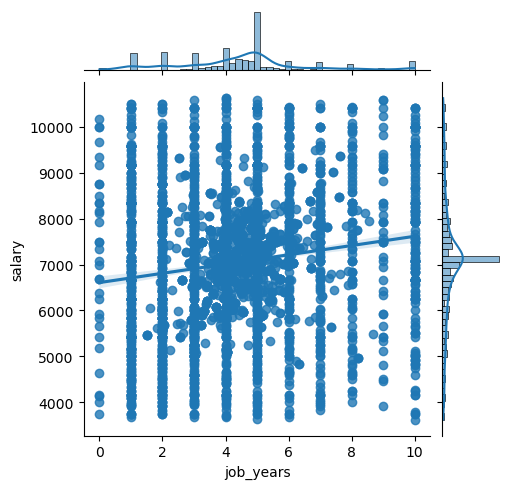

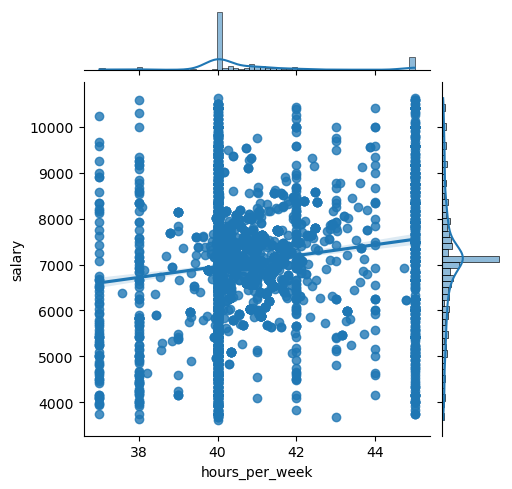

In [11]:
# joint plots for numeric variables

cols = ["job_years", "hours_per_week"]
for c in cols:
    sns.jointplot(x=c, y="salary", data=data, kind = 'reg', height = 5)
plt.show()

From the plots above we can clearly see that job_years has a relation with salary. The more job_years means more monthly earning(salary). Similar trend is visible for hours_per_week variable in relation to the target variable (salary)

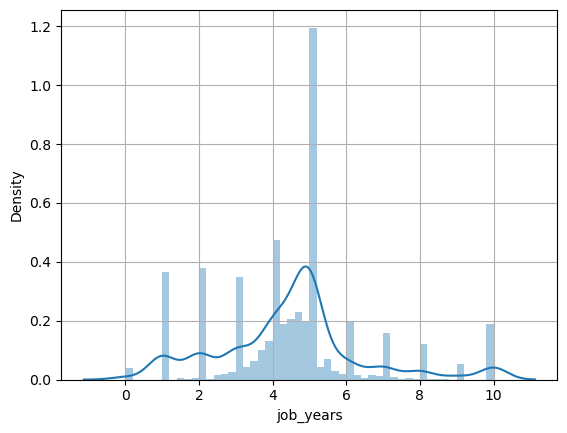

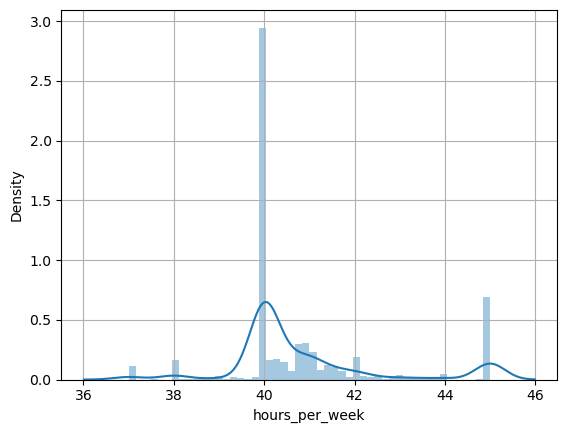

In [12]:
cols = ["job_years", "hours_per_week"]
for c in cols:
    sns.distplot(data[c])
    plt.grid()
    plt.show()

The distributions plotted above are interesting. For job_years, we see a slightly skewed distribution which shows that majority of professionals in our data have less than 10 years of total job experience. For hours_per_week we see a somewhat bimodal distribution ( 2 peaks) showing that most people work from 40 to 45 hours per week.

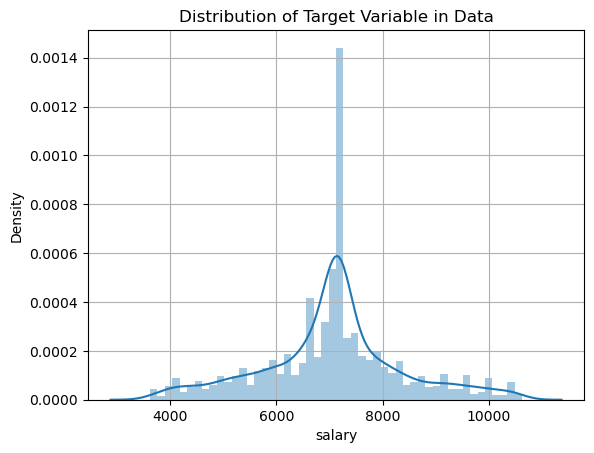

max: 10625.0
min: 3622.0


In [13]:
# distribution of target variable
sns.distplot(data['salary'])
plt.grid()
plt.title('Distribution of Target Variable in Data')
plt.show()
print('max:', np.max(data['salary']))
print('min:', np.min(data['salary']))

## Feature Encoding and Normalization

Before training the model, we should perform one-hot encoding for all categorical/discrete variables, normalize continuous variables and then combine all data to form the training set.

In [14]:
# create another copy of dataset and append encoded features to it
data_train = data.copy()
data_train.head()

,employment_status,job_title,job_years,is_manager,hours_per_week,telecommute_days_per_week,education,is_education_computer_related,certifications,salary
0,Full time,Developer,4.78393,Yes,40.0,0.0,Bachelors (4 years),Yes,No,7187.743094
1,Full time,DBA,5.00000,No,40.0,5.0,Bachelors (4 years),Yes,No,10000.000000
2,Full time,DBA,1.00000,No,40.0,0.0,Masters,Yes,Yes,7000.000000
3,Full time,DBA,1.00000,No,40.0,2.0,Bachelors (4 years),No,No,8333.000000
4,Full time,Developer,3.00000,No,40.0,2.0,Masters,Yes,Yes,7137.000000


In [15]:
# select categorical features
cat_cols = [c for c in data_train.columns if data_train[c].dtype == 'object'
            and c not in ['is_manager', 'certifications']]
cat_data = data_train[cat_cols]
cat_cols

['employment_status',
 'job_title',
 'education',
 'is_education_computer_related']

In [16]:
#Encoding binary variables
binary_cols = ['is_manager', 'certifications']
for c in binary_cols:
    data_train[c] = data_train[c].replace(to_replace=['Yes'], value=1)
    data_train[c] = data_train[c].replace(to_replace=['No'], value=0)

In [17]:
final_data = pd.get_dummies(data_train, columns=cat_cols, drop_first= True,dtype=int)
final_data.shape

(4261, 25)

In [18]:
final_data.columns

Index(['job_years', 'is_manager', 'hours_per_week',
       'telecommute_days_per_week', 'certifications', 'salary',
       'employment_status_Independent or freelancer or company owner',
       'employment_status_Part time', 'job_title_Analytics consultant',
       'job_title_Architect', 'job_title_DBA', 'job_title_Data Scientist',
       'job_title_Developer', 'job_title_Engineer', 'job_title_Manager',
       'job_title_Other', 'job_title_Principal database engineer',
       'job_title_Sales', 'job_title_Sr Consultant ',
       'education_Bachelors (4 years)', 'education_Doctorate/PhD',
       'education_Masters', 'education_None (no degree completed)',
       'is_education_computer_related_Unknown',
       'is_education_computer_related_Yes'],
      dtype='object')

In [19]:
final_data

,job_years,is_manager,hours_per_week,telecommute_days_per_week,certifications,salary,employment_status_Independent or freelancer or company owner,employment_status_Part time,job_title_Analytics consultant,job_title_Architect,job_title_DBA,job_title_Data Scientist,job_title_Developer,job_title_Engineer,job_title_Manager,job_title_Other,job_title_Principal database engineer,job_title_Sales,job_title_Sr Consultant,education_Bachelors (4 years),education_Doctorate/PhD,education_Masters,education_None (no degree completed),is_education_computer_related_Unknown,is_education_computer_related_Yes
0,4.783930,1,40.0,0.0,0,7187.743094,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
1,5.000000,0,40.0,5.0,0,10000.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1.000000,0,40.0,0.0,1,7000.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,1.000000,0,40.0,2.0,0,8333.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,3.000000,0,40.0,2.0,1,7137.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,2.000000,1,40.0,0.0,0,4917.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4273,4.140793,1,40.0,0.0,0,7033.845701,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4274,5.000000,0,40.0,0.0,0,7166.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4275,4.000000,1,40.0,2.0,0,9583.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1


## Train Test Split

In [20]:
y = final_data['salary']
X = final_data.drop(columns=['salary'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Training Set Dimensions:", X_train.shape)
print("Validation Set Dimensions:", X_test.shape)

Training Set Dimensions: (3408, 24)
Validation Set Dimensions: (853, 24)


## Pre-processing data

### Standardization (Z-score normalization):

$$ x_{\text{std}} = \frac{x - \mu}{\sigma} $$

- **Purpose:** Standardization transforms the data to have a mean of 0 and a standard deviation of 1.
- **Properties:**
  - Centers the data around 0.
  - Rescales the data to have unit variance.
  - Does not bound the data within a specific range.
  - Preserves the shape of the distribution.
- **Use Cases:**
  - Algorithms that assume zero-centered data or require features to have a similar scale (e.g., gradient descent-based algorithms, support vector machines).
  - When the distribution of the features is Gaussian-like.

### Normalization (Min-Max scaling):

 $$ x_{\text{norm}} = \frac{x - \min(x)}{\max(x) - \min(x)} $$

- **Purpose:** Normalization scales the data to a fixed range, typically [0, 1] or [-1, 1].
- **Properties:**
  - Scales the data to a specified range.
  - Shifts the data to start at 0.
  - Does not affect the shape of the distribution.
  - Preserves the relative relationships between data points.
- **Use Cases:**
  - Neural networks, especially those with activation functions sensitive to input magnitudes (e.g., sigmoid or tanh functions).
  - When the distribution of the features is unknown or non-Gaussian.

**Choosing Between Standardization and Normalization:**
- Use standardization when the distribution of your features is approximately Gaussian-like and you want to center the data and rescale it to have unit variance.
- Use normalization when the scale of your features is important, or when you need to bound the features within a specific range.
- It's often beneficial to try both preprocessing techniques and evaluate their effects on model performance to determine which one works best for your specific dataset and model.


In [23]:
# select numerical features
num_cols = ['job_years','hours_per_week','telecommute_days_per_week']
num_cols


['job_years', 'hours_per_week', 'telecommute_days_per_week']

In [24]:
# Apply standard scaling on numeric data
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])

In [25]:
X_train

,job_years,is_manager,hours_per_week,telecommute_days_per_week,certifications,employment_status_Independent or freelancer or company owner,employment_status_Part time,job_title_Analytics consultant,job_title_Architect,job_title_DBA,job_title_Data Scientist,job_title_Developer,job_title_Engineer,job_title_Manager,job_title_Other,job_title_Principal database engineer,job_title_Sales,job_title_Sr Consultant,education_Bachelors (4 years),education_Doctorate/PhD,education_Masters,education_None (no degree completed),is_education_computer_related_Unknown,is_education_computer_related_Yes
2109,0.258470,0,-0.482977,-0.628078,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
3533,-1.758433,1,-0.482977,2.424531,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
870,-0.398095,1,0.717744,-0.017556,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
2501,1.266922,0,1.217863,-0.628078,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
393,-0.749982,0,2.351757,-0.628078,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574,0.214465,1,0.295360,-0.628078,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2190,0.077367,0,0.148680,-0.628078,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
300,0.142900,0,-0.023507,-0.628078,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
1728,0.258470,1,-0.482977,0.592966,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0


In [26]:
#Fitting a Linear Regression Model
reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [27]:
reg.coef_

array([  186.0939512 ,    60.29367745,   205.42994633,   232.55854449,
          64.36305116,   -77.82696304,   144.09591498, -2253.73085423,
        1059.22971638,   853.19542696,   642.8448516 ,   545.11785601,
         916.38288988,   875.48986589,    23.90121984,   977.51346608,
         698.03633725,  3534.91207264,   360.58597618,   124.07404804,
         214.92330753,   156.92781622,  -257.4262668 ,  -201.85813957])

In [28]:
reg.intercept_

6162.578742840402

Just to recall

$\hat{y} = \alpha + \beta_1 * X_1 + \beta_2 * X_2 +...$

Our Final model is given by -

$\hat{y} = 6145.79 + 1.887 * X_1 + 7.22 * X_2 +...$


In [29]:
# Normalized MSE (Dividing by mean)
mean_squared_error(y_train,reg.predict(X_train))/np.mean(y_train)

208.87273718674598

In [30]:
# Predict on the test data
y_pred = reg.predict(X_test)

In [31]:
#Evaluate the model on test data
mse = mean_squared_error(y_pred, y_test)/np.mean(y_test)
print("Mean Squared Error:", mse)


Mean Squared Error: 12859.307984774356


*A lower MSE indicates that the model's predictions are closer to the actual values on average, while a higher MSE suggests larger errors between predictions and actual values.
❗Pre-processing on Test data not done.

###Applications of Linear Regression:


*    Predicting house prices based on features like area, number of bedrooms, etc.
*     Forecasting sales based on advertising expenditure.
*Predicting student's performance based on study hours, previous grades, etc.

###Limitations of Linear Regression:

* Assumes a linear relationship between variables.
* Sensitive to outliers.
* Cannot capture complex relationships between variables.

##HW

1.Preprocess Test data and get predictions

In [32]:
# Apply standard scaling on numeric data
scaler = StandardScaler()
scaler.fit(X_test[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [33]:
X_test

,job_years,is_manager,hours_per_week,telecommute_days_per_week,certifications,employment_status_Independent or freelancer or company owner,employment_status_Part time,job_title_Analytics consultant,job_title_Architect,job_title_DBA,job_title_Data Scientist,job_title_Developer,job_title_Engineer,job_title_Manager,job_title_Other,job_title_Principal database engineer,job_title_Sales,job_title_Sr Consultant,education_Bachelors (4 years),education_Doctorate/PhD,education_Masters,education_None (no degree completed),is_education_computer_related_Unknown,is_education_computer_related_Yes
1573,0.094217,0,0.139741,-0.619693,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
202,-1.705971,1,2.407299,-0.619693,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
1350,-1.705971,0,-0.510403,-0.619693,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
420,0.039526,1,0.872430,-0.619693,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
3212,-0.693691,0,-1.277176,0.560214,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1427,-0.350146,0,-0.257017,-0.619693,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2692,0.271806,0,-0.510403,-0.619693,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1443,1.755139,1,2.407299,-0.619693,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3140,-1.211527,1,2.407299,-0.619693,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
#Fitting a Linear Regression Model
reg_test=LinearRegression()
reg_test.fit(X_test, y_test)

LinearRegression()

In [36]:
reg_test.coef_

array([ 1.87703015e+02,  3.47205919e+01,  1.82782638e+02,  1.79595648e+02,
        1.02375904e+02,  1.97746427e+02, -8.57854691e+01, -1.13686838e-13,
        1.28736737e+03,  8.77867397e+02,  6.95302866e+02,  5.70356889e+02,
        1.42881699e+03,  6.59461219e+02,  2.94169050e+02, -3.41060513e-13,
       -6.82121026e-13, -9.09494702e-13,  3.61473939e+02, -4.87287815e+02,
        2.10486186e+02,  5.09226763e+02, -5.35823757e+02, -6.66955345e+01])

In [37]:
reg_test.intercept_

6019.670074187289

In [44]:
# Normalized MSE (Dividing by mean)
mse=mean_squared_error(y_test,reg.predict(X_test))/np.mean(y_test)
mse

205.1397812379769

In [43]:
# Mean Absolute Value
mae = mean_absolute_error(y_test, y_pred)
mae

9455.117170115718